<div align="center">
    <h1>Titania Concentration Time Series Analysis </h1>
</div>

    
</div>

# Dataset Definition

This dataset records hourly responses from a gas multisensor device deployed in a significantly polluted area of an Italian city, covering the period from March 2004 to February 2005. It includes concentrations of various pollutants measured by a certified analyzer and sensor responses. Data fields include concentrations of carbon monoxide (CO), non-methane hydrocarbons (NMHC), benzene, total nitrogen oxides (NOx), and nitrogen dioxide (NO2), as well as temperature, relative humidity, and absolute humidity. The data were taken from a location at road level within the city and represent the longest freely available recordings of on-field deployed air quality chemical sensor device responses. The dataset provides ground truth hourly averaged concentrations alongside sensor readings, and includes evidence of cross-sensitivities and sensor drifts.

**Source URL:**  
[Air Quality Dataset](https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set)

# Project Objectives

1. **Analyze Sensor Response Trends, Seasonality, and Cyclicality**
- This project investigates the PT08.S2 sensor responses over time to identify patterns in Non Methane Hydrocarbons (NMHC) concentration.
- Identifying peak times in sensor readings and understanding seasonal variations.
- Analyzing how sensor response fluctuates throughout the day, week, and year to pinpoint high-response periods and potential factors driving these patterns.

2. **Examine the Impact of Environmental Conditions on Sensor Response**
- The study explores how different environmental conditions such as temperature, humidity, and atmospheric pressure influence PT08.S2 sensor readings.
- Understanding the correlation between these environmental variables and the sensor's NMHC readings.
- Providing insights into how adverse weather conditions might affect the reliability and accuracy of the sensor responses.

3. **Investigate the Influence of External Events on Sensor Data**
- This analysis looks into how occurrences such as local industrial activities, traffic fluctuations, and other localized events might impact the sensor data.
- Analyzing changes in NMHC concentrations during such events.
- Understanding the direct and indirect effects of these events on air quality as detected by the sensor.


4. **Develop Predictive Models for Sensor Response Based on Historical Data**
- The project develops forecasting models for predicting future sensor responses using historical data.
- Creating models that can anticipate future NMHC concentrations based on past sensor data, taking into account trends, seasonality, cyclicality, and environmental conditions.
- These models will help in proactive air quality management and planning, providing a valuable tool for environmental scientists and policy makers.

# Research Questions

1. What are the trends, seasonality, and cyclicity in PT08.S2 sensor responses over the year??

2. How do different environmental conditions affect PT08.S2 sensor responses?

3. What is the impact of external events on PT08.S2 sensor readings?

4. How can future PT08.S2 sensor responses be predicted based on historical data?

# Preliminary Data Analysis

## Time Series Forecasting with Various Models

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

### Parsing and Indexing Date-Time Data

In [ ]:
# Read the CSV file 'AirQuality.csv' into a DataFrame.
df = pd.read_csv("/content/AirQuality.csv")

In [ ]:
df

Datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     2004-03-10 18:00:00     2.6         1360       150      11.9   
1     2004-03-10 19:00:00     2.0         1292       112       9.4   
2     2004-03-10 20:00:00     2.2         1402        88       9.0   
3     2004-03-10 21:00:00     2.2         1376        80       9.2   
4     2004-03-10 22:00:00     1.6         1272        51       6.5   
...                   ...     ...          ...       ...       ...   
9352  2005-04-04 10:00:00     3.1         1314      -200      13.5   
9353  2005-04-04 11:00:00     2.4         1163      -200      11.4   
9354  2005-04-04 12:00:00     2.4         1142      -200      12.4   
9355  2005-04-04 13:00:00     2.1         1003      -200       9.5   
9356  2005-04-04 14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
0            1268  13.6  48.9  0.7578  
1             972  13.3  47.7  0.7255  
2            1074  11.9  54.0  0.7502  
3            1203  11.0  60.0  0.7867  
4            1110  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028  

[9357 rows x 14 columns]

This script processes hourly recorded data from a CSV file named 'HourlyData.csv' using the pandas library in Python. It specifically performs the following operations:

- Sets date_format to specify how datetime information is formatted in the dataset ('%Y-%m-%d %H:%M:%S'), representing year-month-day hour:minute
- Utilizes pd.read_csv to load the data, specifying the column separator (sep=',') and the decimal point character (decimal='.').
- Combines 'Date' and 'Time' columns into a single 'datetime' column using parse_dates, converting these strings to datetime objects for easier manipulation.
- Employs a lambda function as a date_parser to interpret the datetime strings according to the date_format.
- Sets this 'datetime' column as the DataFrame's index with index_col, which is useful for time series analysis as it allows for easy slicing based on time.
- Adjusts the DataFrame's frequency to hourly ('H') with df.asfreq('H').

### Removing Uncertainty Columns

In [ ]:
# Identify columns that contain the word 'Uncertainty' in their name.
uncertainty_columns = df.filter(like='Uncertainty').columns

# Drop the identified uncertainty columns from the DataFrame.
df = df.drop(columns=uncertainty_columns)

In [ ]:
df

Datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     2004-03-10 18:00:00     2.6         1360       150      11.9   
1     2004-03-10 19:00:00     2.0         1292       112       9.4   
2     2004-03-10 20:00:00     2.2         1402        88       9.0   
3     2004-03-10 21:00:00     2.2         1376        80       9.2   
4     2004-03-10 22:00:00     1.6         1272        51       6.5   
...                   ...     ...          ...       ...       ...   
9352  2005-04-04 10:00:00     3.1         1314      -200      13.5   
9353  2005-04-04 11:00:00     2.4         1163      -200      11.4   
9354  2005-04-04 12:00:00     2.4         1142      -200      12.4   
9355  2005-04-04 13:00:00     2.1         1003      -200       9.5   
9356  2005-04-04 14:00:00     2.2         1071      -200      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1               955      103          1174       92          1559   
2               939      131          1140      114          1555   
3               948      172          1092      122          1584   
4               836      131          1205      116          1490   
...             ...      ...           ...      ...           ...   
9352           1101      472           539      190          1374   
9353           1027      353           604      179          1264   
9354           1063      293           603      175          1241   
9355            961      235           702      156          1041   
9356           1047      265           654      168          1129   

      PT08.S5(O3)     T    RH      AH  
0            1268  13.6  48.9  0.7578  
1             972  13.3  47.7  0.7255  
2            1074  11.9  54.0  0.7502  
3            1203  11.0  60.0  0.7867  
4            1110  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352         1729  21.9  29.3  0.7568  
9353         1269  24.3  23.7  0.7119  
9354         1092  26.9  18.3  0.6406  
9355          770  28.3  13.5  0.5139  
9356          816  28.5  13.1  0.5028  

[9357 rows x 14 columns]

- The uncertainty comlums are removed here.

### Display concise summary information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Datetime       9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   int64  
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   int64  
 6   NOx(GT)        9357 non-null   int64  
 7   PT08.S3(NOx)   9357 non-null   int64  
 8   NO2(GT)        9357 non-null   int64  
 9   PT08.S4(NO2)   9357 non-null   int64  
 10  PT08.S5(O3)    9357 non-null   int64  
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 1023.5+ KB


- This includes the index dtype and column dtypes, non-null values, and memory usage.

### Generate a statistical summary of the numerical columns in the DataFrame

In [ ]:
df.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

- The data information is described.

### Count the number of missing values in each column of the DataFrame

In [ ]:
df.isnull().sum()

Datetime         0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### Handling Missing Data Through Interpolation and Analysis

In [ ]:
# Filter rows containing all NaN (missing) values
all_nan_rows = df[df.isna().all(axis=1)]
print("Number of rows where all columns are NaN:", len(all_nan_rows))
print(all_nan_rows)

# Interpolate missing values using linear interpolation and modify DataFrame in place
df.interpolate(method='linear', inplace=True)

# Retrieve the dimensions of the DataFrame (number of rows, number of columns)
print(df.shape)

Number of rows where all columns are NaN: 0
Empty DataFrame
Columns: [Datetime, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []
(9357, 14)


- The NaN values are printed here.

### Return the index label of the minimum and maximum value for each column in the DataFrame

In [ ]:
df.min()

Datetime         2004-03-10 18:00:00
CO(GT)                        -200.0
PT08.S1(CO)                     -200
NMHC(GT)                        -200
C6H6(GT)                      -200.0
PT08.S2(NMHC)                   -200
NOx(GT)                         -200
PT08.S3(NOx)                    -200
NO2(GT)                         -200
PT08.S4(NO2)                    -200
PT08.S5(O3)                     -200
T                             -200.0
RH                            -200.0
AH                            -200.0
dtype: object

- The minimum value for each column is printed here.

In [ ]:
df.max()

Datetime         2005-04-04 14:00:00
CO(GT)                          11.9
PT08.S1(CO)                     2040
NMHC(GT)                        1189
C6H6(GT)                        63.7
PT08.S2(NMHC)                   2214
NOx(GT)                         1479
PT08.S3(NOx)                    2683
NO2(GT)                          340
PT08.S4(NO2)                    2775
PT08.S5(O3)                     2523
T                               44.6
RH                              88.7
AH                             2.231
dtype: object

- The maximum value for each column is printed here.

### Titania Concentration Over Time

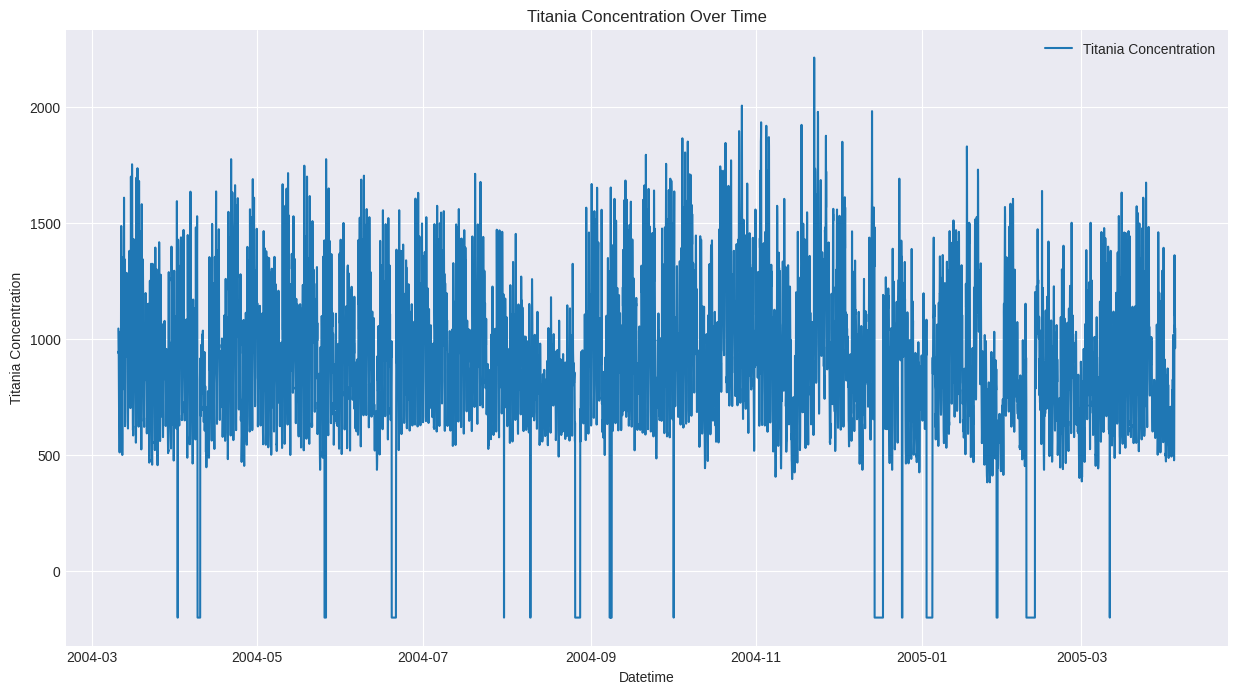

In [ ]:
# Plot the 'PT08.S2(NMHC)' column from the DataFrame
# Set the figure size to (15, 8) for better visualization
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(df['PT08.S2(NMHC)'], label='Titania Concentration')
plt.xlabel('Datetime')
plt.ylabel('Titania Concentration')
plt.title('Titania Concentration Over Time')
plt.legend()
plt.grid(True)
plt.show()


- The analysis plots Titania concentration over time, covering approximately one year from March 2004 to March 2005.
- The x-axis represents the datetime, while the y-axis indicates the Titania concentration measured by the PT08.S2 sensor.
- The data contains many data points, making it challenging to discern a clear trend directly from the visual.
- The concentration levels display characteristics similar to white noise, suggesting numerous random fluctuations without evident patterns.
- Several pronounced spikes in concentration are observed throughout the year, which could be related to specific environmental events or changes in local conditions.
- Despite the fluctuations, there appears to be a consistent baseline level of Titania concentration, indicating a minimum level maintained throughout the observed period.

### Titania Concentration for the Last 200 Records

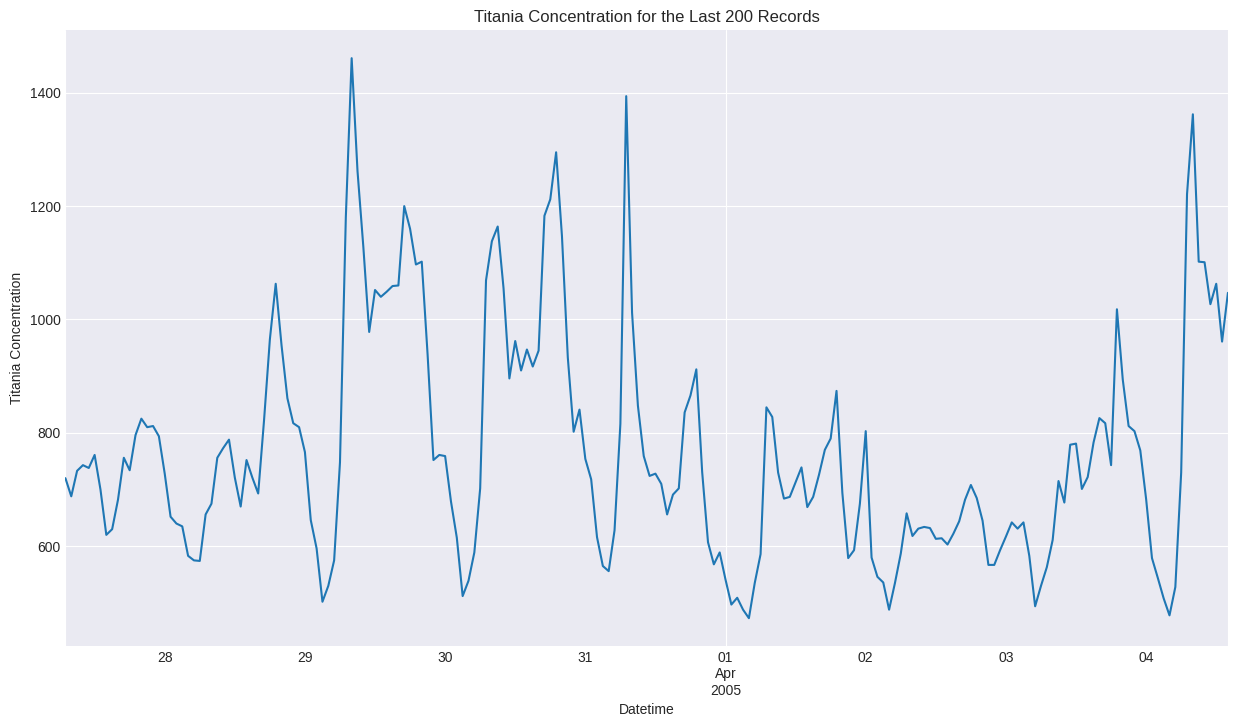

In [ ]:
# Plot the 'PT08.S2(NMHC)' column from the last 200 rows of the DataFrame
# Set the figure size to (15, 8) for better visualization
df['PT08.S2(NMHC)'][-200:].plot(figsize=(15, 8));

plt.title('Titania Concentration for the Last 200 Records')
plt.xlabel('Datetime')
plt.ylabel('Titania Concentration')
plt.grid(True)
plt.show()

- The analysis displays the Titania concentration from the PT08.S2 (NMHC) sensor over the last 200 records.
- The x-axis indicates the datetime, capturing a detailed view from late March to early April 2005, while the y-axis measures the Titania concentration.
- The analysis goal was to reduce the datapoints to make it clear and gain more detailed insights about the short-term trends, seasonality, and cyclicity.
- The data shows short-term peaks as well as small trends and seasonality.
- The plot reveals several peaks and troughs in Titania levels, suggesting transient spikes which might be influenced by specific short-term environmental events or conditions.
- The data shows variability with Titania concentration ranging from around 600 to over 1200, indicating significant fluctuations over short periods.

### Titania Concentration with 1-Month Moving Average for the Last Month

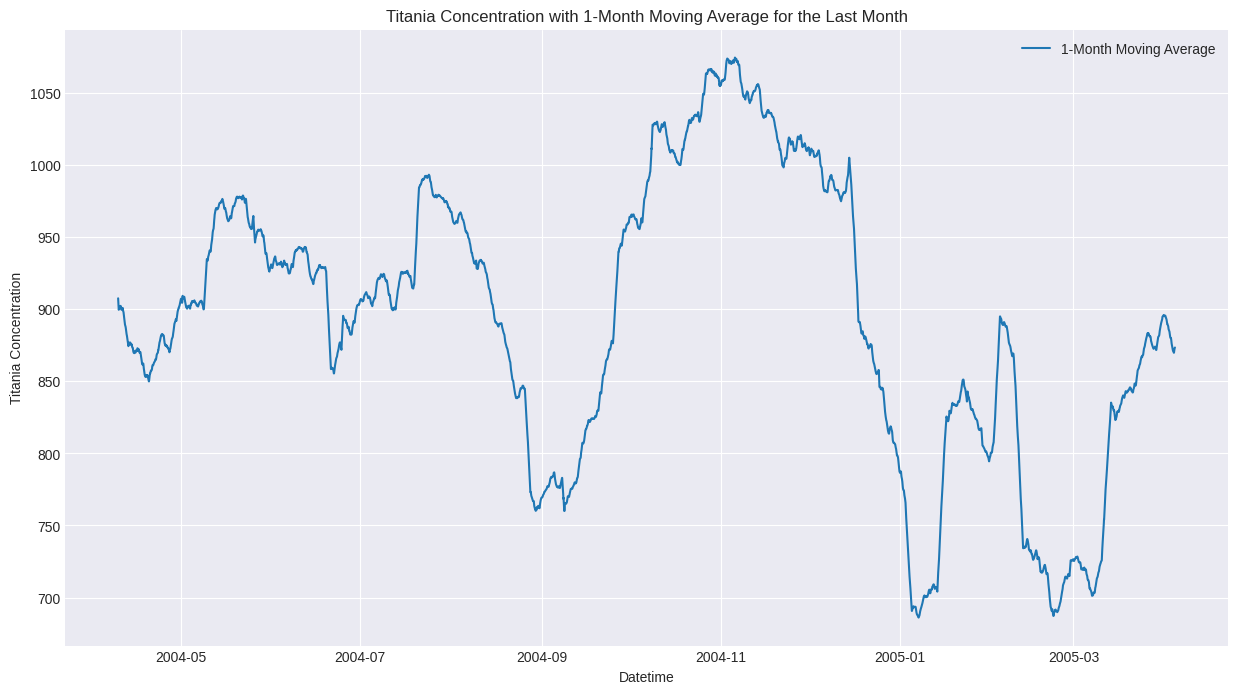

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(15, 8))

# Calculate the 1-month rolling mean (assuming hourly data and 30 days in a month)
rolling_mean = df['PT08.S2(NMHC)'].rolling(window=24*30).mean()

# Plot the 1-month moving average
plt.plot(rolling_mean.index, rolling_mean, label='1-Month Moving Average')

# Add labels and title to the plot
plt.xlabel('Datetime')
plt.ylabel('Titania Concentration')
plt.title('Titania Concentration with 1-Month Moving Average for the Last Month')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

- The analysis plots the 1-month moving average of Titania Concentration data.
- A moving average is a statistic that captures the average change in a data series over time.
- X-axis represents the date Datetime and Y-axis represents the Titania Concentration.
- The primary goal of applying a 1-month moving average was to smooth out short-term fluctuations and highlight long-term trends and cyclic patterns in the Titania concentration data.
- The smoothed data shows distinct upward and downward trends throughout the observed period. For instance, a notable decline in Titania concentration is observed around late 2004, followed by a rise towards early 2005.
- The reduced noise in the moving average plot allows for clearer observation of seasonality, with apparent cyclical trends that might correspond to changes in environmental factors or human activities that influence Titania levels.


In [ ]:
# Identifying the Index of the Lowest Value in a Rolling Mean Series
print("Index of the lowest value:", rolling_mean.idxmin())

Index of the lowest value: 2005-01-07 07:00:00


### Expanding Average of Titania Concentration (1 week)

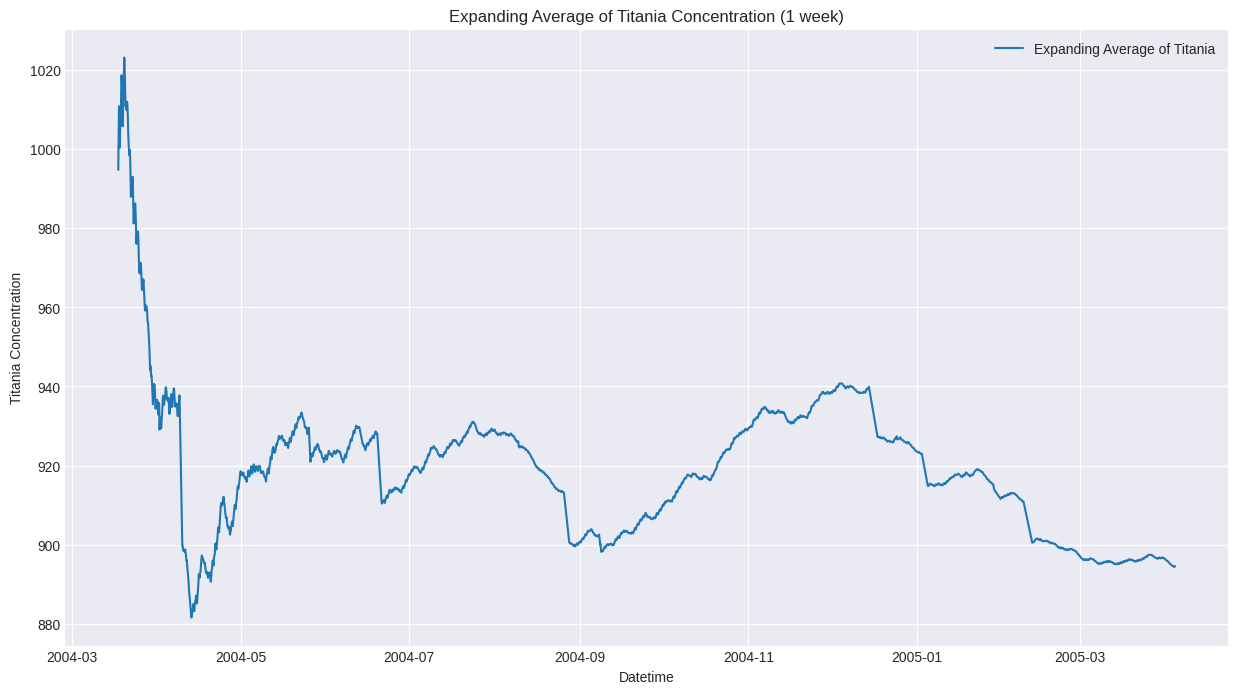

In [ ]:
# Calculate the 1-week expanding mean (assuming hourly data and 1 week = 7 days * 24 hours)
expanding_mean = df['PT08.S2(NMHC)'].expanding(24*7).mean()
# Plot the expanding mean
plt.figure(figsize=(15, 8))
plt.plot(expanding_mean.index, expanding_mean, label='Expanding Average of Titania')
plt.xlabel('Datetime')
plt.ylabel('Titania Concentration')
plt.title('Expanding Average of Titania Concentration (1 week)')
plt.legend()
plt.grid(True)
plt.show()

- The analysis plots the 1-month moving average of Titania Concentration data.
- A moving average is a statistic that captures the average change in a data series over time.
- X-axis represents the Datetime and Y-axis represents the Titania Concentration.
- The analysis goal was to make the data smooth, seasonal and cyclic patterns, trends more clear.
- The data shows a significant initial decline in Titania concentration from March to May 2004, which could be indicative of a seasonal reduction or possibly the effect of an external intervention or environmental change. After this sharp decrease, the concentration stabilizes and begins a gradual recovery, exhibiting slight fluctuations but generally maintaining an upward trend through the summer months.

### Average Titania Concentration by Day of the Week

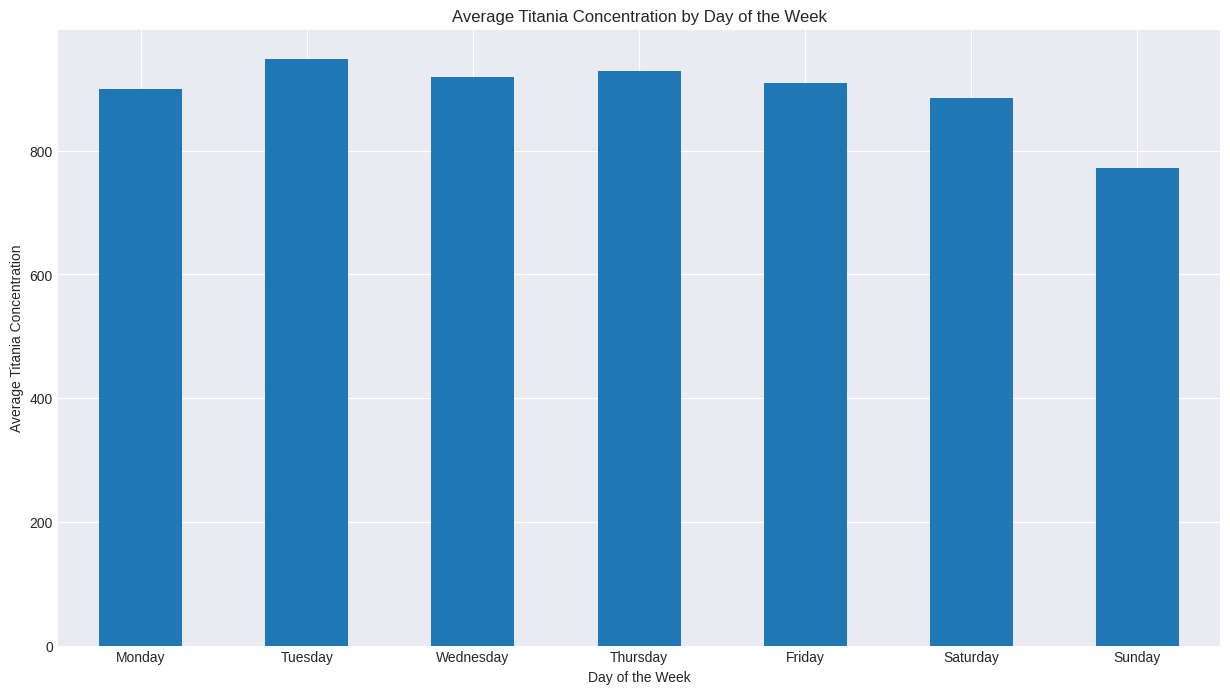

In [ ]:
df['DayOfWeek'] = df.index.dayofweek
plt.figure(figsize=(15, 8))
ax = df.groupby('DayOfWeek')['PT08.S2(NMHC)'].mean().plot(kind='bar')
plt.title('Average Titania Concentration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Titania Concentration')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.grid(True)
plt.show()

- X-axis represents hour of the day and Y-axis represents the average Titania Concentration.
- The bar graph presents a consistent pattern across the weekdays (Monday through Friday) with slightly higher concentrations typically seen on these days compared to the weekend.
- During weekdays, the concentration remains relatively high, with the highest averages often occurring in the middle of the week, particularly noticeable on Wednesday and Thursday.
- A noticeable decrease in average Titania concentrations is observed during the weekends, especially on Sundays. Saturday also shows a reduction but not as pronounced as Sunday.

### Average Titania Concentration by Hour of the Day

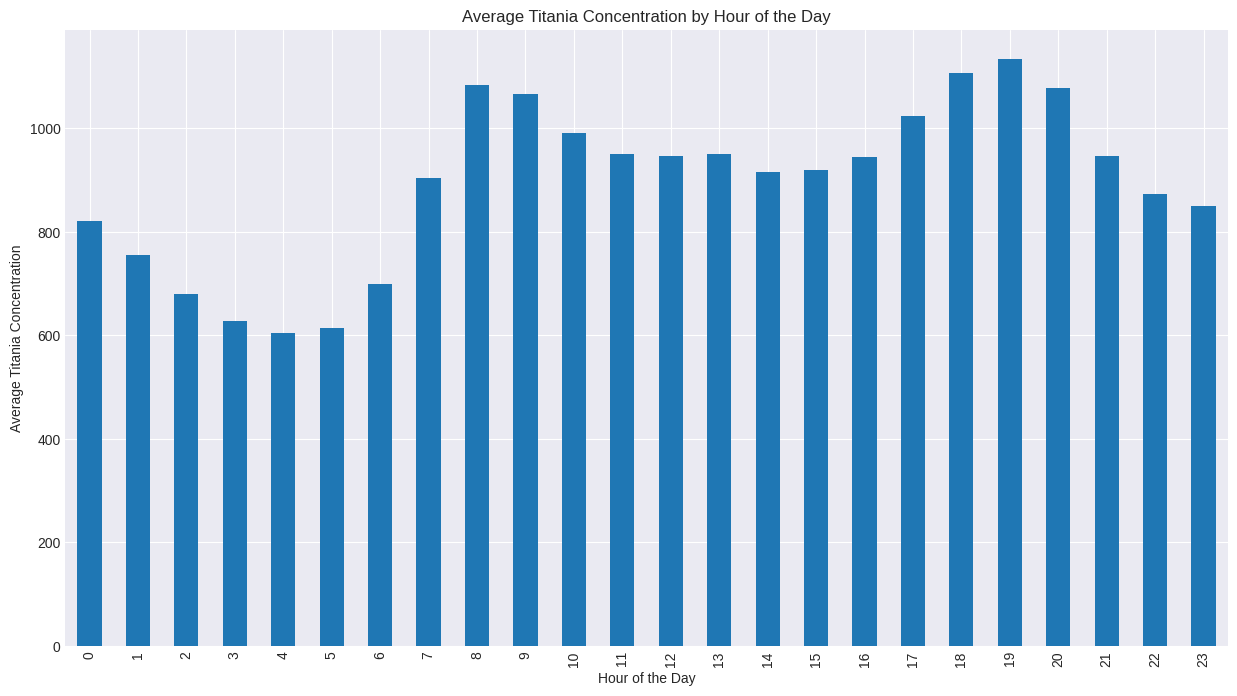

In [ ]:
# Plot Titania Concentration by hour of the day
df['HourOfDay'] = df.index.hour
plt.figure(figsize=(15, 8))
df.groupby('HourOfDay')['PT08.S2(NMHC)'].mean().plot(kind='bar')
plt.title('Average Titania Concentration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Titania Concentration')
plt.grid(True)
plt.show()

- X-axis represents hour of the day and Y-axis represents the average Titania Concentration.
- The analysis goal was to understand the daily seasonal patterns of Titania Concentration.
- The bar graph shows a clear pattern of fluctuation in Titania concentration throughout the day. There is a noticeable increase in concentrations during specific hours, particularly in the late morning and evening.
- There is a significant peak around 8 AM, suggesting a higher concentration of Titania during this hour.
- The concentration dips during the middle of the day, particularly noticeable around 1 PM to 3 PM. This could be due to a decrease in activities that emit Titania or possibly atmospheric conditions that disperse pollutants more effectively during these hours.
- Starting from around 5 PM, there is another increase, peaking again around 8 PM.
- After the evening peak, the concentration generally decreases but remains relatively higher than the early morning hours until it reaches a lower point again around 6 AM.

### Boxplot of Titania Concentration by Day of the Week

<Figure size 1500x800 with 0 Axes>

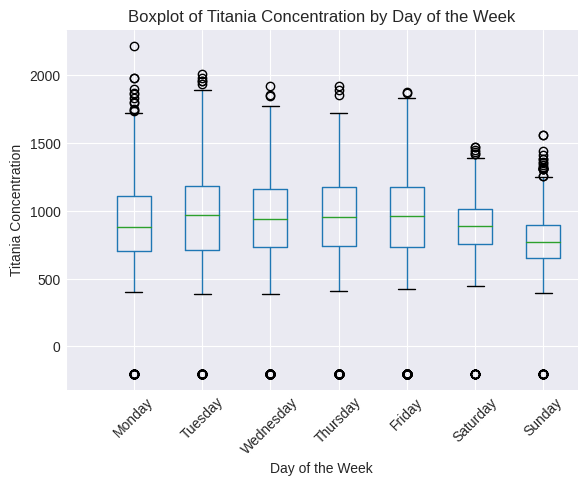

In [ ]:
plt.figure(figsize=(15, 8))
df.boxplot(column='PT08.S2(NMHC)', by='DayOfWeek')
plt.title('Boxplot of Titania Concentration by Day of the Week')
plt.suptitle('')  # Suppress the automatic title to match the other plots
plt.xlabel('Day of the Week')
plt.ylabel('Titania Concentration')
plt.xticks(ticks=range(8), labels=['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(True)
plt.show()

- The analysis plots the boxplots of Titania Concentration by day of the week.
- X-axis represents day of the week and Y-axis represents the Titania Concentration.
- The boxplots show the distribution of data and it indicates the median, quartiles, and outliers.
- The concentration levels during weekdays show relatively consistent median values but with varying spreads. Wednesday and Thursday exhibit higher medians and greater variability, suggesting higher average concentrations and more frequent high-concentration occurrences on these days.
- The weekends show notably lower median values, especially on Sunday, with narrower interquartile ranges, indicating less variability in Titania concentrations. This pattern suggests a drop in activities that contribute to Titania emissions during weekends.

### Boxplot of Titania Concentration by hour of the day

<Figure size 1500x800 with 0 Axes>

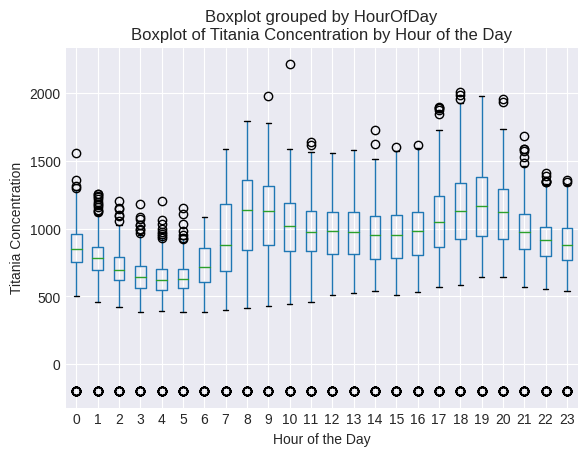

In [ ]:
plt.figure(figsize=(15, 8))
df.boxplot(column='PT08.S2(NMHC)', by='HourOfDay')
plt.title('Boxplot of Titania Concentration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Titania Concentration')
plt.grid(True)
plt.show()

- The analysis plots the boxplots of Titania Concentration by hour of the day.
- X-axis represents hour of the day and Y-axis represents the Titania Concentration.
- The boxplots show the distribution of data and it indicates the median, quartiles, and outliers.
- Certain hours, particularly during the evening (around 18 to 23 hours), show significant variability in Titania concentrations as indicated by longer boxes and whiskers.
- The median concentration tends to be higher in the late evening hours, which could correspond to periods of high traffic or industrial activity.
- Early morning hours (from 0 to 5 AM) tend to show less variability and lower concentrations, likely due to reduced human and industrial activities.
- The presence of numerous outliers, particularly during daytime and evening hours, suggests sporadic events that significantly increase Titania levels, possibly linked to specific industrial operations or unusual traffic patterns.

### Seasonal Plot by Day of the Week

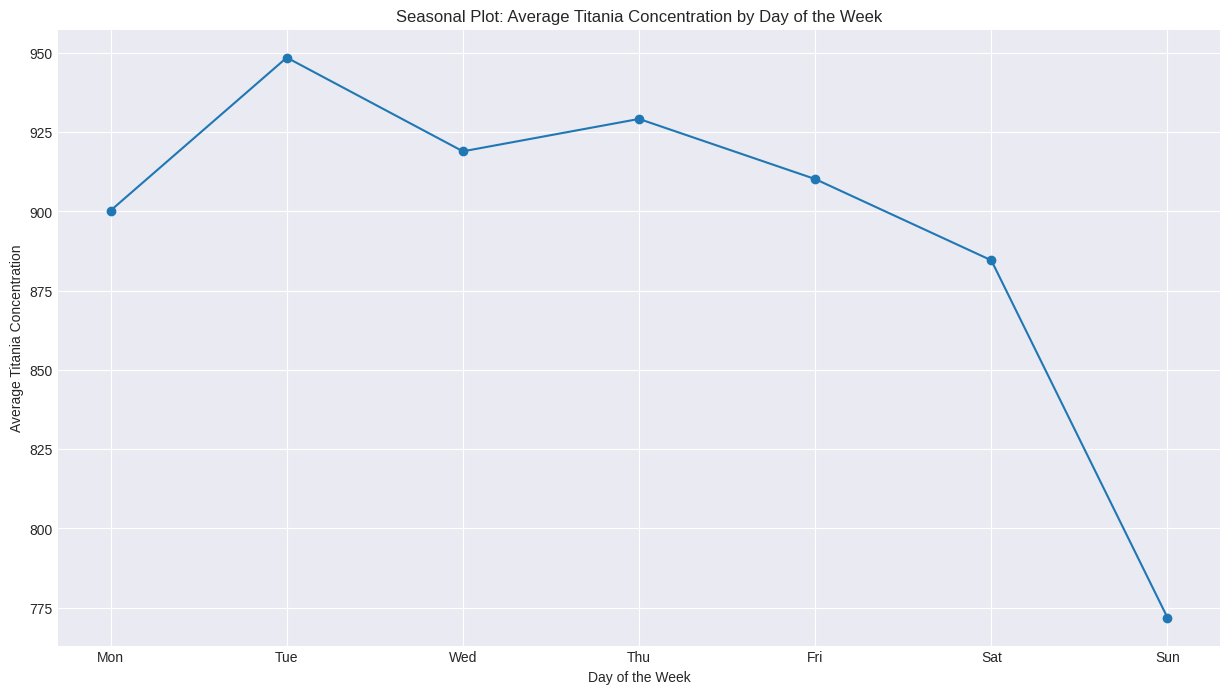

In [ ]:
plt.style.use('seaborn-darkgrid')

df['DayOfWeek'] = df.index.dayofweek
df['Week'] = df.index.isocalendar().week

# Calculate average Titania Concentration for each day of the week across all weeks
avg_titania_by_day = df.groupby('DayOfWeek')['PT08.S2(NMHC)'].mean()

plt.figure(figsize=(15, 8))
plt.plot(avg_titania_by_day.index, avg_titania_by_day, marker='o')
plt.title('Seasonal Plot: Average Titania Concentration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Titania Concentration')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

- The line graph starts with Monday and ends on Sunday, plotting the average Titania concentration for each day.
- X-axis represents the days of the week from Monday to Sunday and Y-axis represents the average Titania concentration.
- The concentration peaks around Tuesday, indicating the highest average concentration of the week.
- After reaching the peak on Tuesday, there is a slight decline in concentration on Wednesday and Thursday, suggesting a gradual reduction in activities or conditions that contribute to Titania emissions.
- A notable decrease in concentration is observed from Friday, with a sharp decline continuing into Saturday and reaching the lowest point on Sunday. This substantial drop could reflect reduced industrial activities, lower traffic volumes, or other factors typically diminished during the weekend.

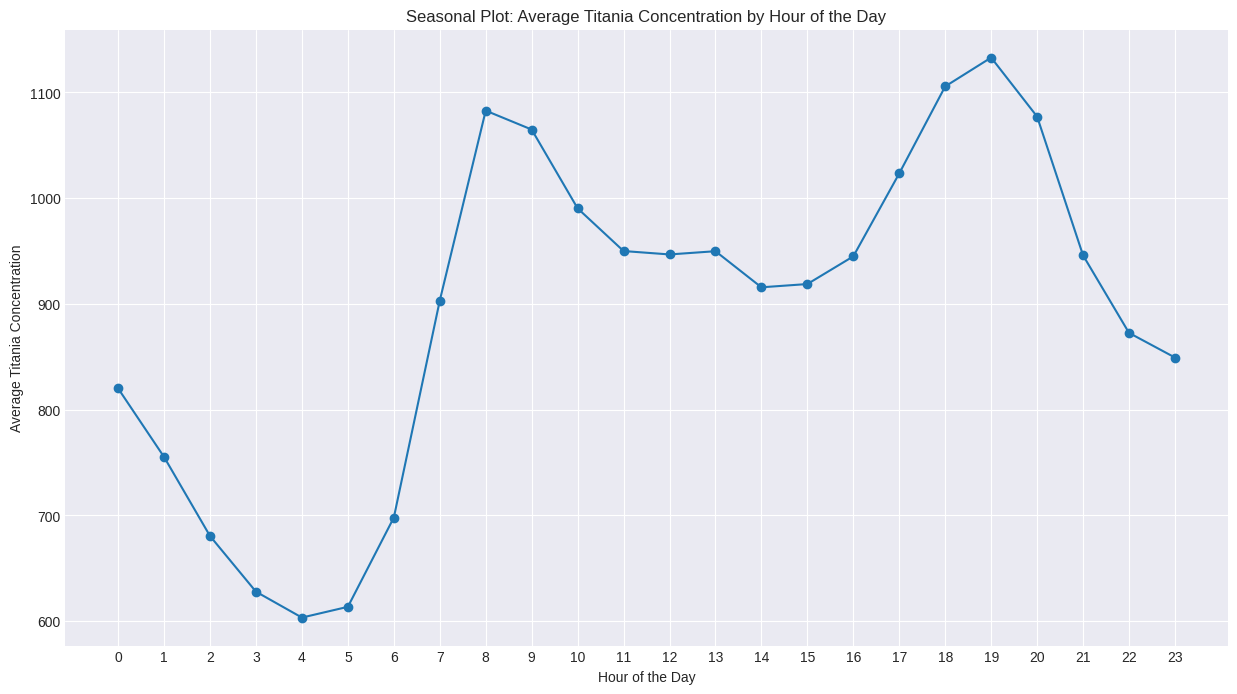

In [ ]:
# Seasonal Plot by Hour of the Day (Aggregated)
df['HourOfDay'] = df.index.hour
df['Day'] = df.index.date

# Calculate average Titania Concentration for each hour of the day across all days
avg_titania_by_hour = df.groupby('HourOfDay')['PT08.S2(NMHC)'].mean()

plt.figure(figsize=(15, 8))
plt.plot(avg_titania_by_hour.index, avg_titania_by_hour, marker='o')
plt.title('Seasonal Plot: Average Titania Concentration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Titania Concentration')
plt.xticks(range(24))
plt.grid(True)
plt.show()

- The line graph illustrates the variation in average Titania concentration throughout a typical day.
- X-axis represents the hour of the day, from 0 (midnight) to 23 (11 PM) and Y-axis represents the average Titania concentration.
- The concentration is at its lowest around the early morning hours, specifically at 6 AM, indicating minimal Titania emissions likely due to reduced human and industrial activities during these hours.
- There is a sharp increase from the early morning to the late morning hours, peaking between 7 AM and 8 AM. This sharp rise could be attributed to increased vehicle traffic and industrial activities as the day begins.
- Following the morning peak, the concentration levels off during the midday hours, maintaining relatively high levels but with slight fluctuations. This plateau suggests a sustained level of activity throughout the day.
- A second, more pronounced peak occurs in the late evening, around 9 PM. This could reflect evening commuting patterns and possibly late shifts in industrial operations.
- Post evening peak, the concentration begins to decline significantly, reaching lower levels towards midnight. The downward trend continues into the early hours of the night, likely due to the cessation of daytime activities.

### Compute the correlation matrix for the DataFrame

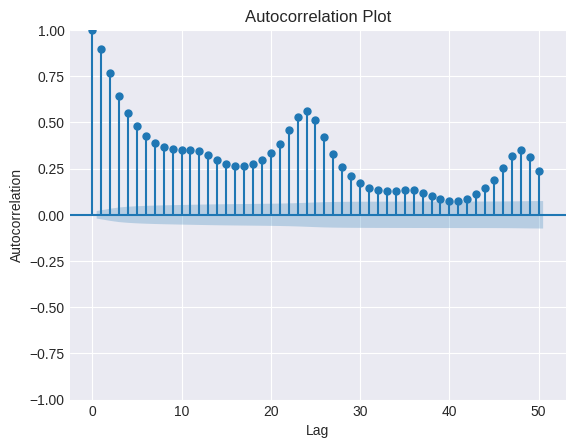

In [ ]:
# Create autocorrelation plot
plot_acf(df['PT08.S2(NMHC)'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

<Figure size 2000x1000 with 0 Axes>

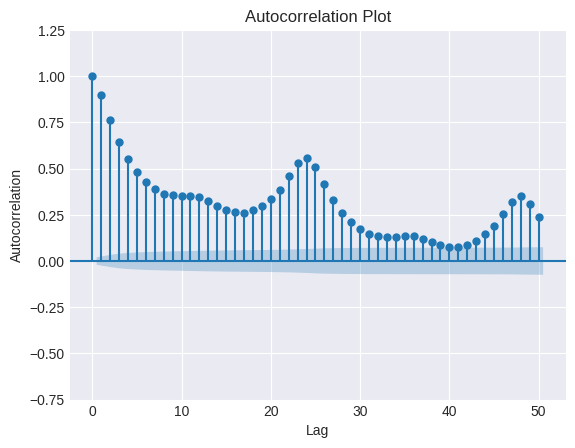

In [ ]:
plt.figure(figsize=(20, 10))

# Create the autocorrelation plot
plot_acf(df['PT08.S2(NMHC)'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.ylim(-0.75, 1.25)  # Set the y-axis limits
plt.show()

- The analysis plots and autocorrelation plots of Titania concentration.
- X-axis represents lag and Y-axis represents autocorrelation.
- The autocorrelation starts very high at lag 0, then sharply drops, indicating that immediate past values have a significant but rapidly diminishing influence on future values.
- The plot shows a cyclical pattern in autocorrelation, with peaks and troughs appearing at regular intervals.
- The regular peaks in the autocorrelation plot suggest potential seasonal cycles in the Titania concentrations.

### Perform classical decomposition of the 'PT08.S2(NMHC)' column

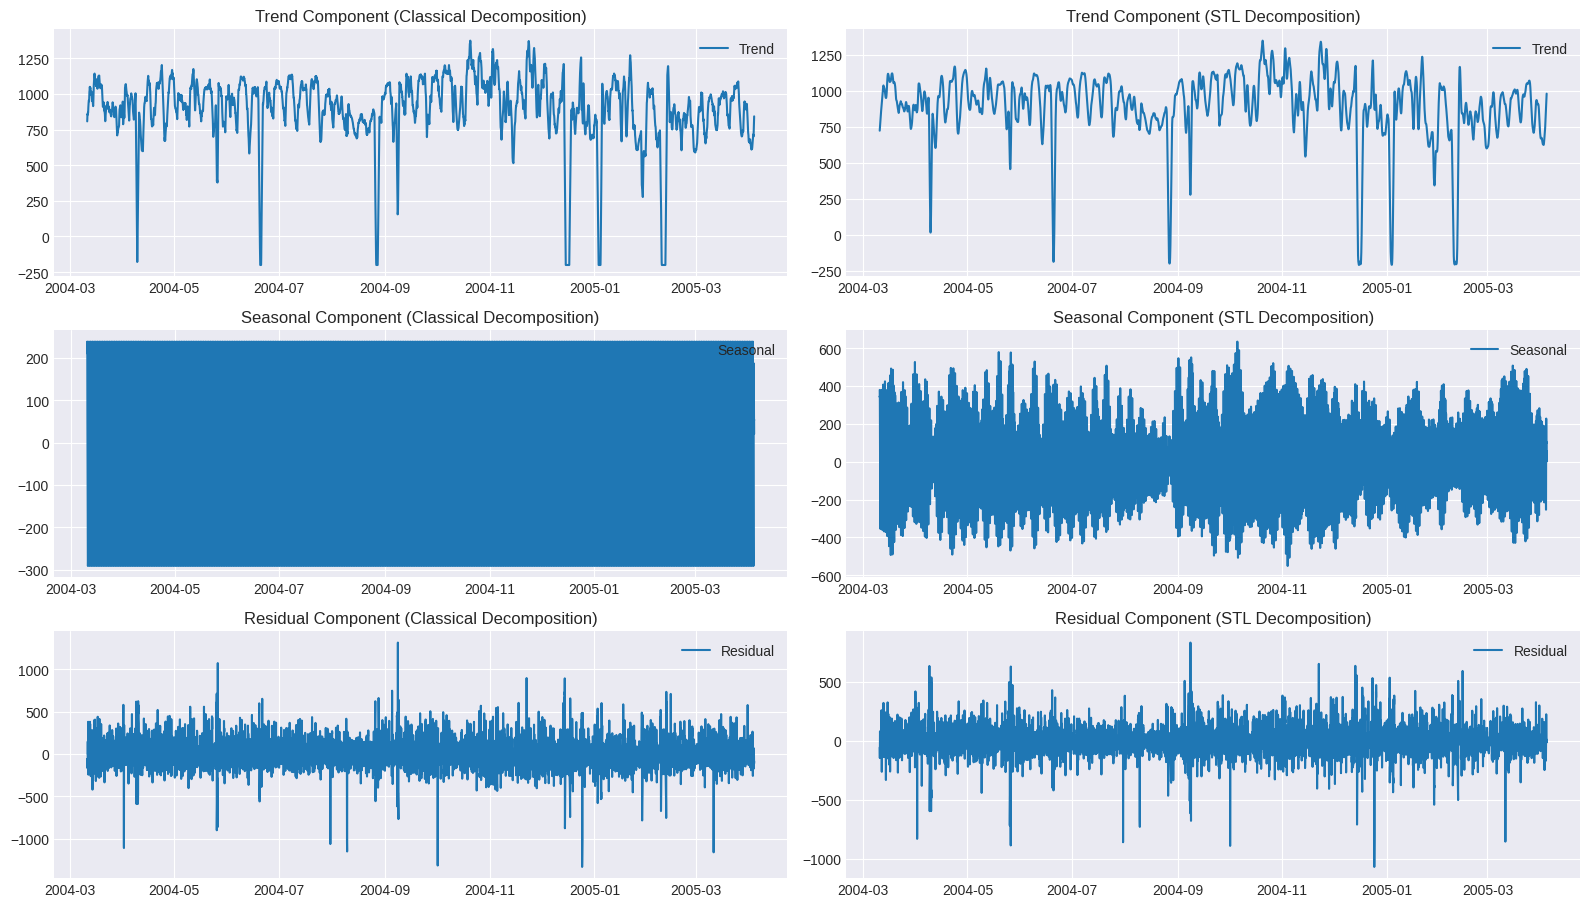

In [ ]:
# Assuming hourly data with daily seasonality
classical_decomposition = seasonal_decompose(df['PT08.S2(NMHC)'], model='additive', period=24)

# Extract components: trend, seasonal, and residual
classical_trend = classical_decomposition.trend
classical_seasonal = classical_decomposition.seasonal
classical_residual = classical_decomposition.resid

# Perform Seasonal-Trend decomposition using Loess (STL) on the 'Titania Concentration' column
stl = STL(df['PT08.S2(NMHC)'])

# Fit the STL decomposition model
stl_result = stl.fit()

# Extract components: trend, seasonal, and residual
stl_trend = stl_result.trend
stl_seasonal = stl_result.seasonal
stl_residual = stl_result.resid

# Plotting
plt.figure(figsize=(16, 12))

# Classical Decomposition Components
plt.subplot(4, 2, 1)
plt.plot(df.index, classical_trend, label='Trend')
plt.title('Trend Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2
            , 3)
plt.plot(df.index, classical_seasonal, label='Seasonal')
plt.title('Seasonal Component (Classical Decomposition)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(df.index, classical_residual, label='Residual')
plt.title('Residual Component (Classical Decomposition)')
plt.legend()

# STL Decomposition Components
plt.subplot(4, 2, 2)
plt.plot(df.index, stl_trend, label='Trend')
plt.title('Trend Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(df.index, stl_seasonal, label='Seasonal')
plt.title('Seasonal Component (STL Decomposition)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(df.index, stl_residual, label='Residual')
plt.title('Residual Component (STL Decomposition)')
plt.legend()

plt.tight_layout()
plt.show()

- The analysis describes the results of two types of time series decomposition applied to the PT08.S2 (NMHC) data, specifically focusing on Classical Decomposition and Seasonal-Trend Loess (STL) Decomposition.

1. **Classical Decomposition**:
   - The trend component in the Classical Decomposition displays a relatively smooth curve, highlighting underlying trends without the short-term fluctuations. The trend shows periodic peaks and troughs, indicating cyclical patterns over time.
   - The seasonal component appears constant throughout the series, suggesting that the model has detected a fixed seasonal effect across the entire data set.
   - Residuals from the Classical Decomposition show considerable variation, with numerous spikes and dips.

2. **STL Decomposition**:
   - The STL trend component shows the smoothed data but with more responsiveness to changes in the data trend. STL is known for its robustness in handling data with non-linear trends.
   - The seasonal component from STL is more detailed and varied compared to Classical Decomposition. It fluctuates significantly over time, which might indicate varying seasonal patterns that the STL is able to capture.
   - The residuals in STL appear more contained with fewer extreme values than in the Classical Decomposition. This indicates that STL is potentially more effective at capturing the complexity of the data, leaving less unexplained noise.

### Plot the seasonal component (STL Decomposition) for the last one week

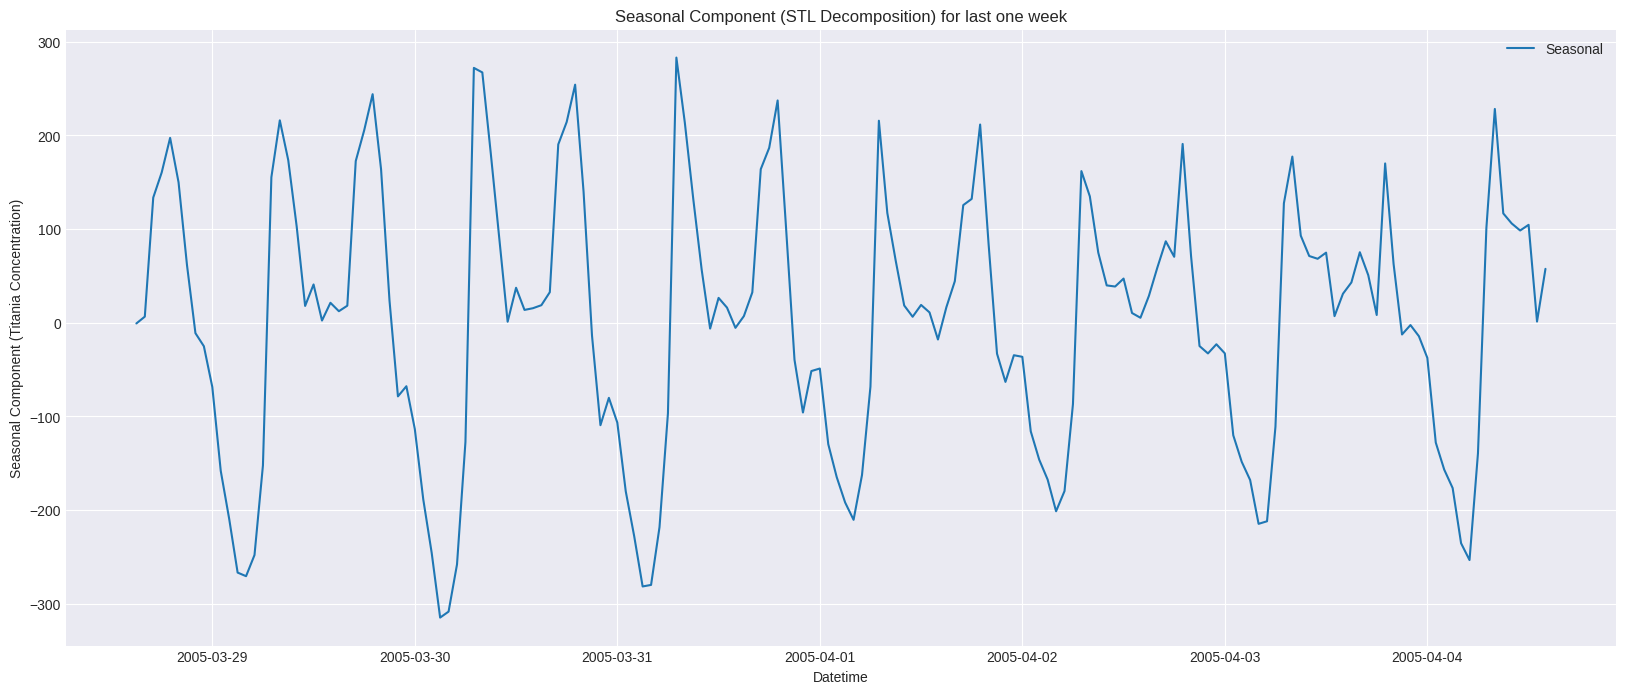

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df.index[-24*7:], stl_seasonal[-24*7:], label='Seasonal')
plt.title('Seasonal Component (STL Decomposition) for last one week')
plt.xlabel('Datetime')
plt.ylabel('Seasonal Component (Titania Concentration)')
plt.legend()
plt.show()

- The graph shown represents the Seasonal Component extracted from STL Decomposition of Titania Concentration data for the last week available in the dataset.
- The line graph depicts sharp rises and falls within each day, indicating daily cyclic behavior.
- X-axis represents represents the date and time and Y-axis represents the seasonal variation in Titania concentration.
- There is a clear daily cyclic pattern, with concentrations peaking and troughing at consistent times each day.
- The variation between the peaks and troughs is notable, suggesting significant changes in Titania concentrations within a single day.
- Towards the end of the week, particularly the last two days shown in the graph, there is a noticeable shift in the amplitude of the seasonal component, which could indicate changes in activity patterns or environmental conditions.

### Plot the seasonal component (STL Decomposition) for the last one day

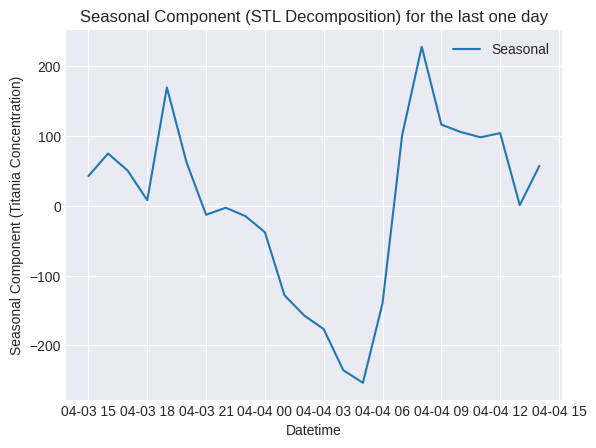

In [ ]:
plt.plot(df.index[-24:], stl_seasonal[-24:], label='Seasonal')
plt.title('Seasonal Component (STL Decomposition) for the last one day')
plt.xlabel('Datetime')
plt.ylabel('Seasonal Component (Titania Concentration)')
plt.legend()
plt.show()

- The graph represents the Seasonal Component from an STL (Seasonal-Trend Loess) Decomposition of Titania Concentration data for a single day.
- The line graph shows significant variations in Titania concentration throughout the day, highlighting the times when concentrations are typically higher or lower.
- X-axis represents represents the date and time and Y-axis represents the seasonal component of Titania concentration.
- There is a notable peak in the early morning hours, which might correspond to increased vehicle traffic or the beginning of industrial activities.
- Following the morning peak, there is a sharp decline, which then rises again, peaking in the early afternoon. This could be related to specific daily activities that influence Titania emissions.
- After the afternoon peak, there is a gradual decline with minor fluctuations, ending in a sharp drop in the late evening hours, possibly due to reduced human activity and cooler temperatures which might influence atmospheric chemistry and dispersion.

In [ ]:
def check_stationarity(data):
    # Perform ADF test
    adf_result = adfuller(data)
    adf_statistic = adf_result[0]
    adf_p_value = adf_result[1]

    # Print ADF results
    print("ADF Test:")
    print("ADF Statistic:", adf_statistic)
    print("p-value:", adf_p_value)
    if adf_p_value < 0.05:
        print("ADF Test Result: Data is stationary\n")
    else:
        print("ADF Test Result: Data is non-stationary\n")

    # Perform KPSS test
    kpss_result = kpss(data, regression='c', nlags="auto")
    kpss_statistic = kpss_result[0]
    kpss_p_value = kpss_result[1]

    # Print KPSS results
    print("KPSS Test:")
    print("KPSS Statistic:", kpss_statistic)
    print("p-value:", kpss_p_value)
    if kpss_p_value < 0.05:
        print("KPSS Test Result: Data is non-stationary\n")
    else:
        print("KPSS Test Result: Data is stationary\n")

# Example usage with your data
check_stationarity(df['PT08.S2(NMHC)'])

ADF Test:
ADF Statistic: -10.58964268680069
p-value: 6.578483079049477e-19
ADF Test Result: Data is stationary

KPSS Test:
KPSS Statistic: 0.736161335720713
p-value: 0.010258060389026094
KPSS Test Result: Data is non-stationary



- The ADF and KPSS test is to determine if a time series is stationary or not.
- If the ADF test p-value < 0.05, the data is stationry.
- If the KPSS test p-value >= 0.05, the data is stationry.
- If the ADF test p-value >= 0.05, the data is non-stationry.
- If the KPSS test p-value < 0.05, the data is non-stationry.
- p-value is the probability value for the test.

### Compute seasonal differencing of 1 day (24 hours) for the 'PT08.S2(NMHC)' column

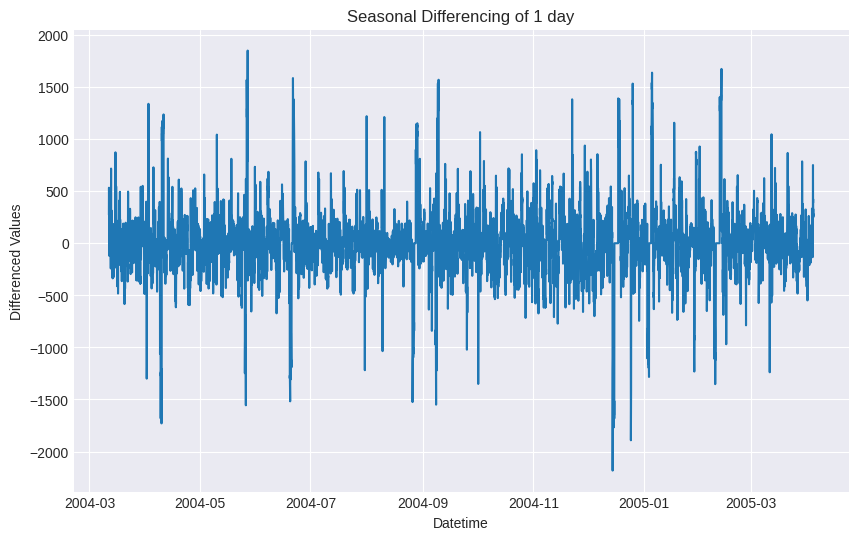

In [ ]:
seasonal_diff = df['PT08.S2(NMHC)'].diff(24)

# Plot the differenced column
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff)
plt.title('Seasonal Differencing of 1 day')
plt.xlabel('Datetime')
plt.ylabel('Differenced Values')
plt.grid(True)
plt.show()

- The graph displays the results of computing the first-order seasonal differencing over a 24-hour period for the PT08.S2 (NMHC) data.
- Seasonal differencing is a technique used in time series analysis to stabilize the mean of a series by removing changes at the seasonal period, making it easier to identify and model the underlying trends.
- X-axis represents represents the date and time and Y-axis represents the values obtained after differencing the data points 24 hours apart, effectively highlighting the day-to-day changes in Titania concentration.
- The plot shows high variability in the differenced values, with several spikes and drops. These peaks and troughs indicate significant day-to-day changes in Titania concentrations.
- There are several extreme values both in the positive and negative directions, suggesting days where the concentration changes sharply compared to the previous day.


In [ ]:
second_diff = seasonal_diff.diff().dropna()
print("Checking stationarity of second order differenced data:")
check_stationarity(second_diff)

Checking stationarity of second order differenced data:
ADF Test:
ADF Statistic: -25.91919077119472
p-value: 0.0
ADF Test Result: Data is stationary

KPSS Test:
KPSS Statistic: 0.008478022558769466
p-value: 0.1
KPSS Test Result: Data is stationary



- ADF test results with a p-value of 0.0 suggest that the null hypothesis of the data being non-stationary can be rejected with strong confidence.
- KPSS test results with a p-value of 0.1 indicate that the null hypothesis of stationarity cannot be rejected. This suggests that the series does not exhibit a trend.
- Both tests agree that the data is stationary after second-order differencing. This is important for many time series modeling techniques that assume stationarity, such as ARIMA models.

In [ ]:
# Compute the absolute minimum value of the seasonal differenced data
add_value = round(abs(seasonal_diff.min()))

# Print the value to be subtracted after developing the model
print(f"This value has to be subtracted after developing our model = {add_value}")

# Add the absolute minimum value to the seasonal differenced data
seasonal_diff += add_value

This value has to be subtracted after developing our model = 2183


In [ ]:
class TSMean:
    def __init__(self, series):
        """
        Initialize TSMean with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the mean of the series
        self.mean = series.mean()

    def forecast(self, steps):
        """
        Generate forecasts using the mean value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the mean value repeated for the specified number of steps
        return [self.mean] * steps

class TSNaive:
    def __init__(self, series):
        """
        Initialize TSNaive with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Store the last observed value of the series
        self.last_value = series.iloc[-1]

    def fit(self):
        """
        Fit the model (no action needed for naive method).

        Returns:
        self: Returns self.
        """
        return self

    def forecast(self, steps):
        """
        Generate forecasts using the last observed value.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Return a list containing the last observed value repeated for the specified number of steps
        return [self.last_value] * steps
class TSNaiveSeasonal:
    def __init__(self, series, period):
        """
        Initialize TSNaiveSeasonal with the given time series and seasonal period.

        Parameters:
        series (pandas Series): Time series data.
        period (int): Seasonal period of the time series.
        """
        # Store the seasonal period and values of the series
        self.period = period
        self.values = series.values

    def forecast(self, steps):
        """
        Generate seasonal naive forecasts.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by repeating the last observed value from the corresponding season
        seasonal_forecast = []
        for i in range(steps):
            index = len(self.values) - (i % self.period) - 1
            seasonal_forecast.append(self.values[index])
        return seasonal_forecast[::-1]

class TSDrift:
    def __init__(self, series):
        """
        Initialize TSDrift with the given time series.

        Parameters:
        series (pandas Series): Time series data.
        """
        # Calculate the linear regression parameters
        self.x_start = 0
        self.x_end = len(series) - 1
        self.y_start = series.iloc[0]
        self.y_end = series.iloc[-1]
        self.slope = (self.y_end - self.y_start) / (self.x_end - self.x_start)
        self.intercept = self.y_start - self.slope * self.x_start
    def forecast(self, steps):
        """
        Generate forecasts using the linear regression (drift) method.

        Parameters:
        steps (int): Number of steps to forecast.

        Returns:
        list: List of forecasted values.
        """
        # Generate forecasts by extending the linear regression line into the future
        forecast_values = [self.intercept + self.slope * (self.x_end + i) for i in range(1, steps + 1)]
        return forecast_values


The used models are as follows:
1. **TSMean Model**
- This model is used to provide a simple forecast based on the mean of the series.
2. **TSNaive Model**
- This model is used to implement the naive forecasting method, where the forecast for all future points is taken as the last observed data point.
3. **TSNaiveSeasonal Model**
- This model is used to forecast future values based on seasonal patterns observed in the data.
4. **TSDrift Model**
- This model is used to provide forecasting using a linear trend (drift) method, which is suitable for data with a clear linear trend.

### Representing last 24 observations (24 hours) of the Titania Concentration data

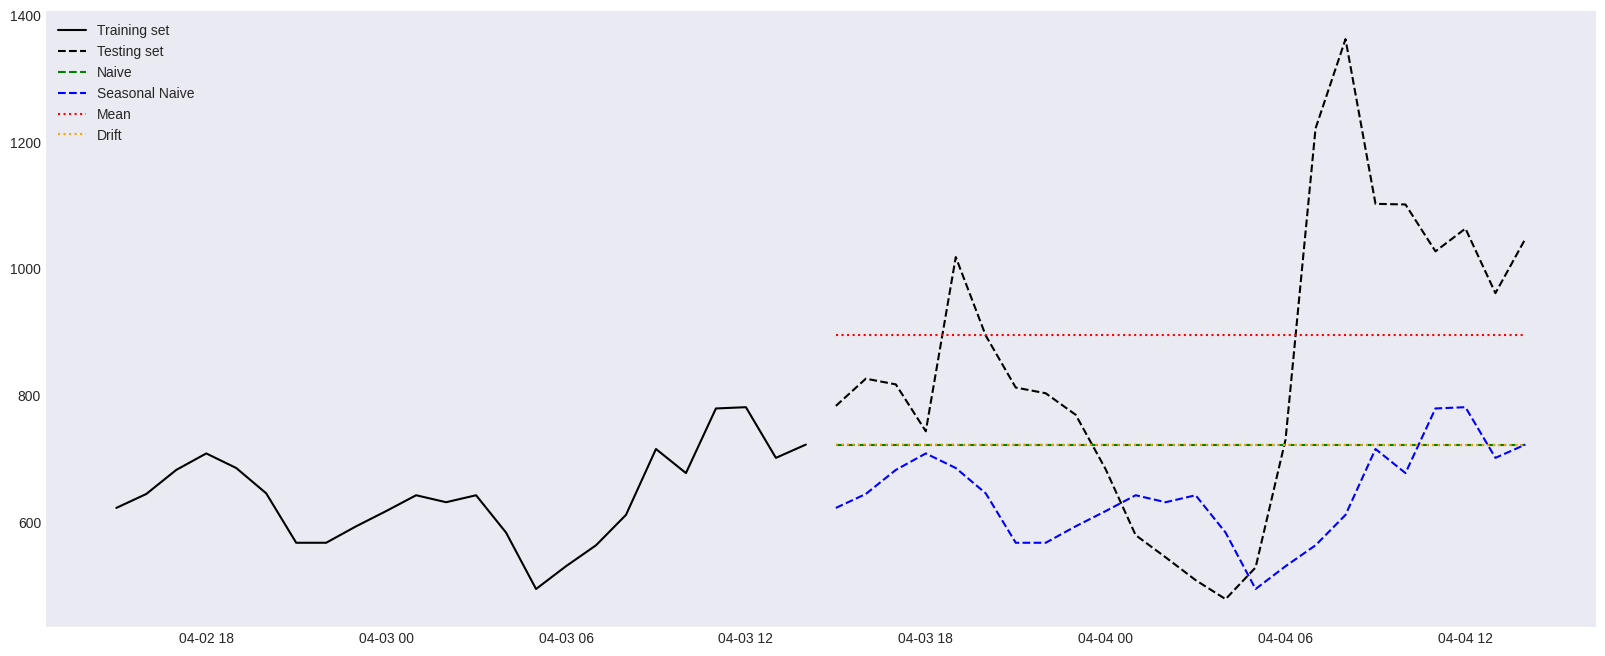

In [ ]:
Train = df['PT08.S2(NMHC)'][:-24]
Test = df['PT08.S2(NMHC)'][-24:]

# Initialize the models
m = TSMean(Train)
n = TSNaive(Train).fit()
s = TSNaiveSeasonal(Train,24)
dr = TSDrift(Train)

# Calculate forecasted values
forecast_naive = n.forecast(24)
forecast_seasonal = s.forecast(24)
forecast_mean = m.forecast(24)
forecast_drift = dr.forecast(24)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(Train[-24:], 'k', label='Training set')
ax.plot(Test, 'k', linestyle='--', label='Testing set')
ax.plot(Test.index, forecast_naive, color='green', label='Naive', linestyle='--')
ax.plot(Test.index, forecast_seasonal, color='blue', label='Seasonal Naive', linestyle='--')
ax.plot(Test.index, forecast_mean, color='red', label='Mean', linestyle='dotted')
ax.plot(Test.index, forecast_drift, color='orange', label='Drift', linestyle=':')
ax.legend(loc='upper left')
ax.grid()
plt.show()

- The graph displays the performance of various time series forecasting models on the last 24 hours of data from the PT08.S2 (NMHC) sensor, used for monitoring Titania concentrations.

1. **Graph Components**:
- Training Set (Black Solid Line): Represents historical data used to train the models. The last 24 hours of this set are displayed for reference.
- Testing Set (Black Dashed Line): Actual recorded data from the sensor for the last 24 hours. This set is used to evaluate the performance of the forecasting models.
- Naive Forecast (Green Dashed Line): Forecasts based on the naive approach, using the last observed value as the prediction for all future points.
- Seasonal Naive Forecast (Blue Dashed Line): Uses the value from the same hour of the previous day to make predictions, assuming a daily seasonal pattern.
- Mean Forecast (Red Dotted Line): Utilizes the mean of the historical data as the constant prediction for all future points.
- Drift Forecast (Orange Dotted Line): Applies a linear trend (drift) calculated from the historical data to predict future values.

2. **Analysis of Forecast Performance**:
- Adaptability: The naive and seasonal naive methods capture some of the cyclical behavior due to their reliance on recent data points, making them somewhat effective during stable conditions but less so during sudden changes.
- Stability: The mean forecast provides a stable but unresponsive prediction, as it does not adapt to changes or trends in the data.
- Trend Sensitivity: The drift model attempts to account for trends in the data, which can be useful if there is a consistent upward or downward trend. However, it can overestimate or underestimate in the presence of volatility or when the trend reverses.


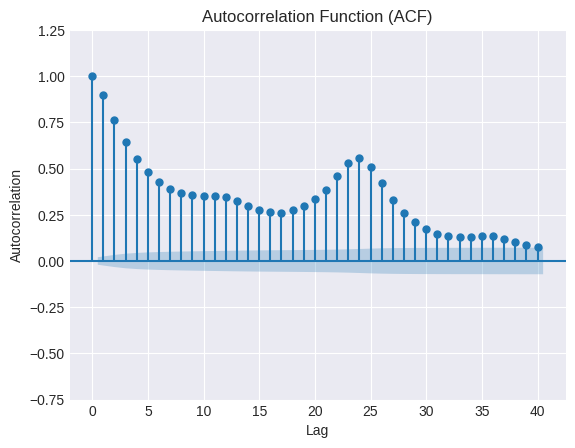

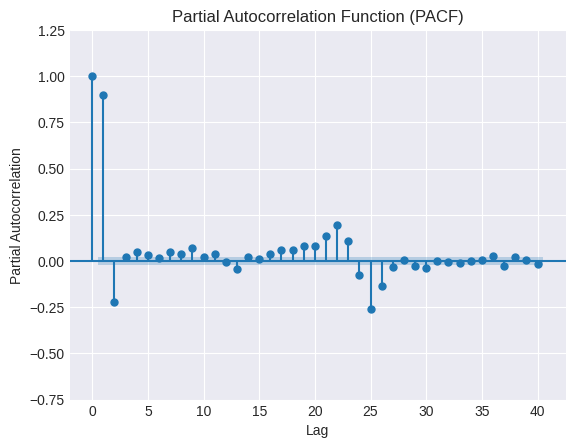

In [ ]:
# Plot ACF
plot_acf(Train, lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.ylim(-0.75, 1.25)  # Set the y-axis limits
plt.show()

# Plot PACF
plot_pacf(Train, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.ylim(-0.75, 1.25)  # Set the y-axis limits
plt.show()

- The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide key insights into the data's properties, especially for time series forecasting.
- The X-axis shows the Lag, and the Y-axis shows the Autocorrelation and Partial Autoorrelation.

1. **ACF Plot**:
- The ACF plot shows significant autocorrelation for the first few lags and this slowly tapers off as the lags increase. This suggests a strong dependency between current and past values that gradually decreases with time.
- The autocorrelation values are particularly high at lower lags, indicating that the data points are highly influenced by their immediate predecessors.
- The slow decay of the autocorrelation function indicates a possible long memory in the series, meaning past values have a prolonged effect on future values. This is typical of data with a trend or moving average components.

2. **PACF Plot**:
- The PACF plot shows a sharp drop after the first lag and cuts off significantly, which generally suggests an autoregressive term in the data. The first lag being significantly high followed by a cutoff supports the inclusion of one AR term in ARIMA modeling.
- Beyond the first few lags, the PACF values hover around zero, which implies that any correlation with more distant lags is already explained by the model's first lag.
- This behavior indicates that the series could potentially be modeled well using an AR(1) process, where only the first lag is significantly correlated with the current value after accounting for intermediate values.

In [ ]:
# Print information about the data
print('Observations: {}'.format(len(df)))
print('Training Observations: {}'.format(len(Train)))
print('Testing Observations: {}'.format(len(Test)))

Observations: 9357
Training Observations: 9333
Testing Observations: 24


In [ ]:
# Calculate RMSE, MAE, MAPE for each model
def calculate_metrics(true_values, forecasted_values):
    rmse = np.sqrt(mean_squared_error(true_values, forecasted_values))
    mae = mean_absolute_error(true_values, forecasted_values)
    mape = np.mean(np.abs((true_values - forecasted_values) / true_values)) * 100
    return [rmse, mae, mape]

In [ ]:
naive_metrics = calculate_metrics(Test, forecast_naive)
seasonal_metrics = calculate_metrics(Test, forecast_seasonal)
mean_metrics = calculate_metrics(Test, forecast_mean)
drift_metrics = calculate_metrics(Test, forecast_drift)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Naive', 'Seasonal Naive', 'Mean', 'Drift'],
    'RMSE': [naive_metrics[0], seasonal_metrics[0], mean_metrics[0], drift_metrics[0]],
    'MAE': [naive_metrics[1], seasonal_metrics[1], mean_metrics[1], drift_metrics[1]],
    'MAPE (%)': [naive_metrics[2], seasonal_metrics[2], mean_metrics[2], drift_metrics[2]]
})
results.set_index('Model', inplace=True)
results

RMSE         MAE   MAPE (%)
Model                                            
Naive           264.059100  212.291667  24.126050
Seasonal Naive  297.550836  240.666667  25.707996
Mean            235.279813  198.885849  27.362735
Drift           264.354027  212.508662  24.138800

- The results show the performance metrics of four forecasting models: Naive, Seasonal Naive, Mean, and Drift. These metrics include Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).
- The Naive model uses the last observed data point to forecast future values, resulting in moderate errors as indicated by the metrics.
- The Seasonal Naive model forecasts based on the last observed value from the same season or cycle, which in this case didn't perform as well as the naive model, showing higher errors.
- The Mean model forecasts using the mean of the historical data, offering the lowest RMSE among the models, indicating a better fit in terms of squared errors, but a higher MAPE suggests that relative errors are substantial.
- The Drift model uses a linear trend fitted to the historical data to forecast, resulting in similar error metrics to the naive model.

## AR Model

In [ ]:
# Train autoregression model
model = AutoReg(Train, lags=25)  # Create an autoregression model with 25 lags
model_fit = model.fit()  # Fit the autoregression model to the training data
print('Coefficients:', model_fit.params)  # Print the coefficients of the fitted model


Coefficients: const                47.650764
PT08.S2(NMHC).L1      1.003801
PT08.S2(NMHC).L2     -0.148621
PT08.S2(NMHC).L3     -0.013180
PT08.S2(NMHC).L4      0.006792
PT08.S2(NMHC).L5      0.017281
PT08.S2(NMHC).L6     -0.012834
PT08.S2(NMHC).L7      0.018682
PT08.S2(NMHC).L8     -0.030044
PT08.S2(NMHC).L9      0.048560
PT08.S2(NMHC).L10    -0.031873
PT08.S2(NMHC).L11     0.022729
PT08.S2(NMHC).L12     0.032425
PT08.S2(NMHC).L13    -0.049082
PT08.S2(NMHC).L14     0.019102
PT08.S2(NMHC).L15    -0.018595
PT08.S2(NMHC).L16    -0.000757
PT08.S2(NMHC).L17     0.000462
PT08.S2(NMHC).L18    -0.009702
PT08.S2(NMHC).L19     0.023090
PT08.S2(NMHC).L20    -0.011101
PT08.S2(NMHC).L21    -0.044842
PT08.S2(NMHC).L22     0.062292
PT08.S2(NMHC).L23     0.131909
PT08.S2(NMHC).L24     0.189707
PT08.S2(NMHC).L25    -0.259526
dtype: float64


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:          PT08.S2(NMHC)   No. Observations:                 9333
Model:                    AutoReg(25)   Log Likelihood              -58769.545
Method:               Conditional MLE   S.D. of innovations            133.611
Date:                Mon, 15 Jul 2024   AIC                         117593.089
Time:                        05:56:56   BIC                         117785.832
Sample:                    03-11-2004   HQIC                        117658.565
                         - 04-03-2005                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                47.6508      5.379      8.859      0.000      37.109      58.193
PT08.S2(NMHC).L1      1.0038      0.010    100.307      0.000       0.984       1.023
PT08.S2(NMHC).L2     -0.1486      0.014    -10.393      0.000      -0.177      -0.121
PT08.S2(NMHC).L3     -0.0132      0.014     -0.921      0.357      -0.041       0.015
PT08.S2(NMHC).L4      0.0068      0.014      0.475      0.635      -0.021       0.035
PT08.S2(NMHC).L5      0.0173      0.014      1.209      0.227      -0.011       0.045
PT08.S2(NMHC).L6     -0.0128      0.014     -0.898      0.369      -0.041       0.015
PT08.S2(NMHC).L7      0.0187      0.014      1.307      0.191      -0.009       0.047
PT08.S2(NMHC).L8     -0.0300      0.014     -2.101      0.036      -0.058      -0.002
PT08.S2(NMHC).L9      0.0486      0.014      3.396      0.001       0.021       0.077
PT08.S2(NMHC).L10    -0.0319      0.014     -2.227      0.026      -0.060      -0.004
PT08.S2(NMHC).L11     0.0227      0.014      1.588      0.112      -0.005       0.051
PT08.S2(NMHC).L12     0.0324      0.014      2.266      0.023       0.004       0.060
PT08.S2(NMHC).L13    -0.0491      0.014     -3.431      0.001      -0.077      -0.021
PT08.S2(NMHC).L14     0.0191      0.014      1.335      0.182      -0.009       0.047
PT08.S2(NMHC).L15    -0.0186      0.014     -1.299      0.194      -0.047       0.009
PT08.S2(NMHC).L16    -0.0008      0.014     -0.053      0.958      -0.029       0.027
PT08.S2(NMHC).L17     0.0005      0.014      0.032      0.974      -0.028       0.028
PT08.S2(NMHC).L18    -0.0097      0.014     -0.679      0.497      -0.038       0.018
PT08.S2(NMHC).L19     0.0231      0.014      1.615      0.106      -0.005       0.051
PT08.S2(NMHC).L20    -0.0111      0.014     -0.776      0.437      -0.039       0.017
PT08.S2(NMHC).L21    -0.0448      0.014     -3.137      0.002      -0.073      -0.017
PT08.S2(NMHC).L22     0.0623      0.014      4.355      0.000       0.034       0.090
PT08.S2(NMHC).L23     0.1319      0.014      9.213      0.000       0.104       0.160
PT08.S2(NMHC).L24     0.1897      0.014     13.267      0.000       0.162       0.218
PT08.S2(NMHC).L25    -0.2595      0.010    -25.939      0.000      -0.279      -0.240
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0742           -0.0000j            1.0742           -0.5000
AR.2            -1.0373           -0.2824j            1.0751           -0.4577
AR.3            -1.0373           +0.2824j            1.0751            0.4577
AR.4            -0.9259           -0.5265j            1.0652           -0.4177
AR.5            -0.9259           +0.5265j            1.0652            0.4177
AR.6            -0.7663           -0

predicted=732.899125, expected=783.000000
predicted=745.384995, expected=826.000000
predicted=758.787013, expected=817.000000
predicted=773.926677, expected=743.000000
predicted=758.798459, expected=1018.000000
predicted=737.835625, expected=894.000000
predicted=714.293377, expected=812.000000
predicted=710.986564, expected=803.000000
predicted=730.736050, expected=769.000000
predicted=739.233939, expected=683.000000
predicted=746.960204, expected=579.000000
predicted=748.709720, expected=544.000000
predicted=737.635513, expected=508.000000
predicted=704.892962, expected=478.000000
predicted=673.807955, expected=528.000000
predicted=682.483136, expected=730.000000
predicted=705.690506, expected=1221.000000
predicted=733.433005, expected=1362.000000
predicted=766.073032, expected=1102.000000
predicted=778.432302, expected=1101.000000
predicted=810.430633, expected=1027.000000
predicted=804.634761, expected=1063.000000
predicted=782.021750, expected=961.000000
predicted=785.020390, expec

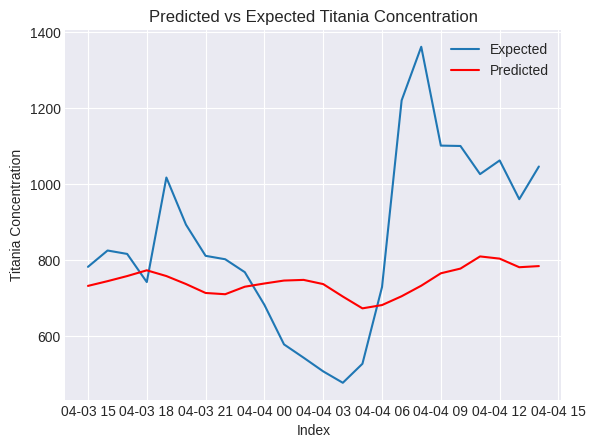

In [ ]:
# Make predictions using the fitted model
predictions = model_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Titania Concentration')
plt.title('Predicted vs Expected Titania Concentration')
plt.legend();

- The graph and the table illustrate the performance of a prediction model on the Titania Concentration dataset.
- Expected Values is the actual recorded values of Titania Concentration.
- Predicted Values is the values estimated by the model.
- In early time points, the predicted values align closely with the actual data.
- Around the index positions corresponding to early April (04-03 to 04-04), the predictions start deviating significantly from the actual values, notably underestimating the peak around 04-04.
- The predictions towards the later part of the time series (post-04-04) indicate some ability to anticipate changes in the data trend but are less accurate in magnitude, especially during sudden changes.

In [ ]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Autoregression'] = metrics_df.values[0]

results

RMSE         MAE   MAPE (%)
Model                                            
Naive           264.059100  212.291667  24.126050
Seasonal Naive  297.550836  240.666667  25.707996
Mean            235.279813  198.885849  27.362735
Drift           264.354027  212.508662  24.138800
Autoregression  243.008255  194.176094  22.403548

## MA Model

In [ ]:
# calculate residuals
# Predict values for the training set using the fitted autoregression model
# Start predicting from the 26th observation (lags = 25) to the end of the training set
predictions_train = model_fit.predict(start=25, end=len(Train), dynamic=False).values

# Extract the actual values of the training set starting from the 26th observation
Train_mod = Train[25:].values

# Calculate residuals by subtracting predicted values from actual values for each corresponding observation
train_resid = [Train_mod[i] - predictions_train[i] for i in range(len(Train_mod))]

In [ ]:
model_ma = AutoReg(train_resid, lags=200)
model_fit_ma = model_ma.fit()
print('Coefficients: %s' % model_fit_ma.params)

Coefficients: [-1.75602387e-01 -1.08659648e-01 -1.93394837e-02  3.16201731e-02
  3.63215896e-02  2.10716723e-02  3.44139410e-02  3.88446710e-02
  3.66148941e-02  3.07132878e-02  2.55270554e-02  2.60135259e-02
  4.84871778e-03  1.85115431e-02  1.31976300e-02  1.45523123e-02
  1.35959390e-02  2.32922499e-02  2.74087332e-02  1.10024454e-02
  1.81557329e-02  3.27100968e-02  1.51437872e-02 -7.78867539e-02
 -1.90744894e-01 -6.44039665e-03  1.84649075e-03 -9.95585279e-03
  1.56821066e-03  1.65838868e-02  2.11061590e-03  1.19425573e-03
  1.15609099e-02 -5.41581488e-03  2.35606497e-03 -1.99876023e-02
  5.87132241e-03 -4.28488050e-03 -4.30487173e-03  1.14950251e-02
  9.90468142e-03  5.49977433e-03 -4.95788423e-03 -4.28255516e-03
  8.05501813e-03  1.41365763e-02 -1.92095565e-02 -4.53125398e-02
 -3.89760062e-04 -1.63755301e-04  3.82442810e-03 -1.88383676e-03
 -9.45455009e-03  3.78150896e-03 -1.44066262e-02 -2.90575197e-03
 -2.59134778e-03  2.27024946e-03 -2.26196283e-03 -2.58318383e-02
  4.1301443

- This code predicts values from the training set, and extract actual values.
- After that, it calculate residuals, and model the residuals using an autoregressive model with 200 lags to get patterns and seasonality.



In [ ]:
model_fit_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 9308
Model:                   AutoReg(200)   Log Likelihood              -56753.376
Method:               Conditional MLE   S.D. of innovations            123.004
Date:                Mon, 15 Jul 2024   AIC                         113910.751
Time:                        05:56:58   BIC                         115348.367
Sample:                           200   HQIC                        114399.644
                                 9308                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1756      1.289     -0.136      0.892      -2.702       2.351
y.L1          -0.1087      0.010    -10.372      0.000      -0.129      -0.088
y.L2          -0.0193      0.011     -1.836      0.066      -0.040       0.001
y.L3           0.0316      0.011      3.001      0.003       0.011       0.052
y.L4           0.0363      0.011      3.447      0.001       0.016       0.057
y.L5           0.0211      0.011      1.998      0.046       0.000       0.042
y.L6           0.0344      0.011      3.264      0.001       0.014       0.055
y.L7           0.0388      0.011      3.682      0.000       0.018       0.060
y.L8           0.0366      0.011      3.475      0.001       0.016       0.057
y.L9           0.0307      0.010      2.943      0.003       0.010       0.051
y.L10          0.0255      0.010      2.450      0.014       0.005       0.046
y.L11          0.0260      0.010      2.496      0.013       0.006       0.046
y.L12          0.0048      0.010      0.465      0.642      -0.016       0.025
y.L13          0.0185      0.010      1.777      0.076      -0.002       0.039
y.L14          0.0132      0.010      1.267      0.205      -0.007       0.034
y.L15          0.0146      0.010      1.397      0.163      -0.006       0.035
y.L16          0.0136      0.010      1.305      0.192      -0.007       0.034
y.L17          0.0233      0.010      2.237      0.025       0.003       0.044
y.L18          0.0274      0.010      2.631      0.009       0.007       0.048
y.L19          0.0110      0.010      1.056      0.291      -0.009       0.031
y.L20          0.0182      0.010      1.743      0.081      -0.002       0.039
y.L21          0.0327      0.010      3.140      0.002       0.012       0.053
y.L22          0.0151      0.010      1.453      0.146      -0.005       0.036
y.L23         -0.0779      0.010     -7.471      0.000      -0.098      -0.057
y.L24         -0.1907      0.010    -18.243      0.000      -0.211      -0.170
y.L25         -0.0064      0.011     -0.606      0.545      -0.027       0.014
y.L26          0.0018      0.011      0.174      0.862      -0.019       0.023
y.L27         -0.0100      0.011     -0.937      0.349      -0.031       0.011
y.L28          0.0016      0.011      0.148      0.883      -0.019       0.022
y.L29          0.0166      0.011      1.561      0.118      -0.004       0.037
y.L30          0.0021      0.011      0.199      0.842      -0.019       0.023
y.L31          0.0012      0.011      0.112      0.910      -0.020       0.022
y.L32          0.0116      0.011      1.094      0.274      -0.009       0.032
y.L33         -0.0054      0.010     -0.523      0.601      -0.026       0.015
y.L34          0.0024      0.010      0.229      0.819      -0.018       0.023
y.L35         -0.0200      0.010     -1.939      0.053      -0.040       0.000
y.L36          0.0059      0.010      0.570      0.569      -0.014       0.026
y.L37         -0.0043      0.010     -0.416      0.678      -0.024       0.016
y.

predicted=8.326553, expected=50.100875
predicted=13.222248, expected=80.615005
predicted=19.593166, expected=58.212987
predicted=-1.418868, expected=-30.926677
predicted=55.246179, expected=259.201541
predicted=-27.219380, expected=156.164375
predicted=4.704759, expected=97.706623
predicted=12.662444, expected=92.013436
predicted=3.770271, expected=38.263950
predicted=-15.956880, expected=-56.233939
predicted=-48.808911, expected=-167.960204
predicted=-31.890345, expected=-204.709720
predicted=-6.254264, expected=-229.635513
predicted=-8.027829, expected=-226.892962
predicted=5.303394, expected=-145.807955
predicted=47.673025, expected=47.516864
predicted=123.738463, expected=515.309494
predicted=13.243270, expected=628.566995
predicted=-23.654761, expected=335.926968
predicted=-21.273297, expected=322.567698
predicted=4.287524, expected=216.569367
predicted=31.930089, expected=258.365239
predicted=11.554940, expected=178.978250
predicted=8.247180, expected=261.979610


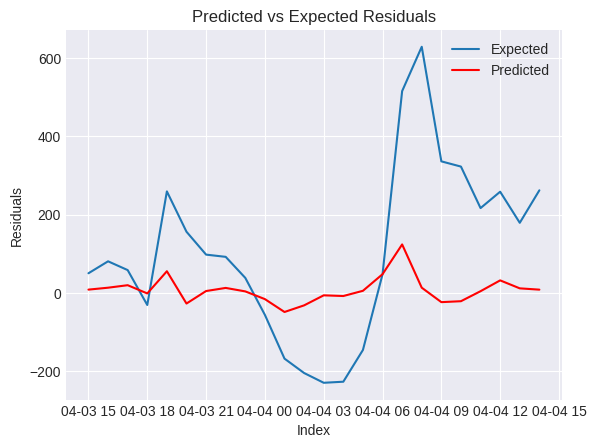

In [ ]:
# Make predictions using the fitted model
predictions_ma = model_fit_ma.predict(start=len(train_resid), end=len(train_resid)+len(Test)-1, dynamic=False)

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions_ma[i], Test.iloc[i]-predictions[i]))

# Calculate and print Root Mean Squared Error (RMSE) for the predictions
# rmse = sqrt(mean_squared_error(test.values, predictions_ma))
# print('Test RMSE: %.3f' % rmse)

# Plot predictions vs expected
plt.plot(Test.index, Test - predictions, label='Expected')
plt.plot(Test.index, predictions_ma, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Predicted vs Expected Residuals')
plt.legend();

- The graph and table illustrate the performance of a model in predicting the residuals of the Titania Concentration.
- Expected Residuals: These are the actual residuals calculated as the difference between the observed values and the model's initial predictions.
- Predicted Residuals: These are the residuals predicted by a secondary model, presumably fitted to correct the initial predictions.
- Around the index positions corresponding to early April (04-03 to 04-04), the predictions start deviating significantly from the expected residuals, notably underestimating the peak residual around 04-04.
- The predictions towards the later part of the time series (post-04-04) show some ability to anticipate changes in the residuals' trend but are less accurate in magnitude, especially during sudden changes.

In [ ]:
predictions_sum = [x + y for x, y in zip(predictions, predictions_ma)]
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions_sum)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['AR+MA'] = metrics_df.values[0]

# Print results
results


RMSE         MAE   MAPE (%)
Model                                            
Naive           264.059100  212.291667  24.126050
Seasonal Naive  297.550836  240.666667  25.707996
Mean            235.279813  198.885849  27.362735
Drift           264.354027  212.508662  24.138800
Autoregression  243.008255  194.176094  22.403548
AR+MA           226.803677  177.809675  20.414231

- The AR+MA model shows the best performance across all three metrics compared to other models, indicating its superior ability to capture both trends and corrections in the data.
- The Seasonal Naive model performs the worst, particularly in terms of MAE, suggesting it might not be the best model for handling the specific patterns or noise in this dataset.
- Mean and Drift models offer moderate performance, but still lag behind the AR+MA model, especially in accuracy and percentage error.
- The combined AR+MA model is the most effective for this dataset, offering the lowest error rates, which suggests it effectively captures both the linear trends and autocorrelations in the data.

## ARIMA Model

In [ ]:
seed = 42
np.random.seed(seed)
# Automatically search for the best ARIMA model parameters using auto_arima function
auto_arima_model = auto_arima(Train, start_p=1, start_q=1,
                              max_p=30, max_q=30, m=1,
                              seasonal=False,
                              d=None, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True,
                              random_state=seed)

# Print the best parameters found by auto_arima
print("Best parameters found by auto_arima:", auto_arima_model.order)

# Create an ARIMA model with the best parameters obtained from auto_arima
model_arima = ARIMA(Train, order=auto_arima_model.order)

# Fit the ARIMA model to the training data
arima_fit = model_arima.fit()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=120239.423, Time=6.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=120514.431, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=120273.134, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=120240.952, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=120512.432, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=119471.458, Time=12.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=120195.419, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=119467.430, Time=10.83 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=120076.970, Time=0.74 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=119469.157, Time=10.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=119469.021, Time=12.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=119467.677, Time=5.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=120011.343, Time=0.96 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=119470.571, Time=10.27 sec


- The selected ARIMA(3,1,1) model outperforms other combinations by providing the lowest AIC, suggesting an optimal balance between model fit and complexity.
- The lower AIC indicates a better model fit, as it achieves lower error with less complexity, making it preferable for forecasting the time series data in question.
- The model's parameters suggest that the recent past (last three observations) and short-term errors (one lagged error) are significant predictors for the series, highlighting a combination of short-term memory and error correction dynamics in the data.

In [ ]:
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          PT08.S2(NMHC)   No. Observations:                 9333
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -59727.717
Date:                Mon, 15 Jul 2024   AIC                         119465.435
Time:                        05:58:43   BIC                         119501.141
Sample:                    03-10-2004   HQIC                        119477.563
                         - 04-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0479      0.006    182.563      0.000       1.037       1.059
ar.L2         -0.2278      0.010    -22.649      0.000      -0.248      -0.208
ar.L3         -0.0274      0.010     -2.833      0.005      -0.046      -0.008
ma.L1         -0.9549      0.004   -220.400      0.000      -0.963      -0.946
sigma2      2.122e+04    111.415    190.452      0.000     2.1e+04    2.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            288827.59
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.11
Prob(H) (two-sided):                  0.06   Kurtosis:                        30.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

predicted=712.879989, expected=783.000000
predicted=700.735290, expected=826.000000
predicted=689.509770, expected=817.000000
predicted=680.763206, expected=743.000000
predicted=674.488008, expected=1018.000000
predicted=670.212667, expected=894.000000
predicted=667.402002, expected=812.000000
predicted=665.602802, expected=803.000000
predicted=664.474995, expected=769.000000
predicted=663.780142, expected=683.000000
predicted=663.358288, expected=579.000000
predicted=663.105460, expected=544.000000
predicted=662.955685, expected=508.000000
predicted=662.867906, expected=478.000000
predicted=662.816978, expected=528.000000
predicted=662.787717, expected=730.000000
predicted=662.771063, expected=1221.000000
predicted=662.761676, expected=1362.000000
predicted=662.756435, expected=1102.000000
predicted=662.753539, expected=1101.000000
predicted=662.751955, expected=1027.000000
predicted=662.751099, expected=1063.000000
predicted=662.750642, expected=961.000000
predicted=662.750402, expec

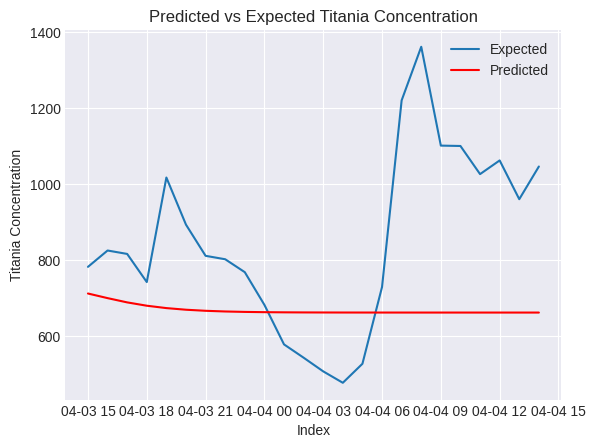

In [ ]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test.iloc[i]))

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Titania Concentration')
plt.title('Predicted vs Expected Titania Concentration')
plt.legend();

- The graph displays a comparison between the predicted values generated by an ARIMA model and the actual observed values for the Titania Concentration.
- The predicted values capture the overall trend of the data but fail to replicate the extreme values and some of the sharper movements observed in the actual data.
- Around the index positions corresponding to early April (04-03 to 04-04), the predictions start deviating significantly from the actual values, notably underestimating the peak around 04-04.
- The predictions towards the later part of the time series (post-04-04) indicate some ability to anticipate changes in the data trend but are less accurate in magnitude, especially during sudden changes.

In [ ]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['ARIMA'] = metrics_df.values[0]

# Print result
results

RMSE         MAE   MAPE (%)
Model                                            
Naive           264.059100  212.291667  24.126050
Seasonal Naive  297.550836  240.666667  25.707996
Mean            235.279813  198.885849  27.362735
Drift           264.354027  212.508662  24.138800
Autoregression  243.008255  194.176094  22.403548
AR+MA           226.803677  177.809675  20.414231
ARIMA           294.187143  236.892538  25.673405

- Naive: This model simply predicts the last observed value. It has an RMSE of 264.06, MAE of 212.29, and MAPE of 24.13%.

- Seasonal Naive: This model predicts using the last observed value from the same season or cycle. It shows an RMSE of 297.55, MAE of 240.67, and MAPE of 25.71%, indicating slightly worse performance than the naive model.

- Mean: This model uses the average of past data to make predictions and results in an RMSE of 235.28, MAE of 198.89, and MAPE of 27.36%, performing better in terms of RMSE and MAE compared to the naive models.

- Drift: This model assumes a linear trend continuation from the historical data. It has similar errors to the naive model with an RMSE of 264.35, MAE of 212.51, and MAPE of 24.14%.

- Autoregression (AR): This model uses dependencies between observations and lagged observations. It has an RMSE of 243.00, MAE of 194.17, and MAPE of 22.40%, making it one of the more accurate models.

- AR+MA (ARIMA without differencing): Combining autoregressive and moving average components, this model shows improved results with an RMSE of 226.80, MAE of 177.81, and MAPE of 20.41%.

## SARIMA Model

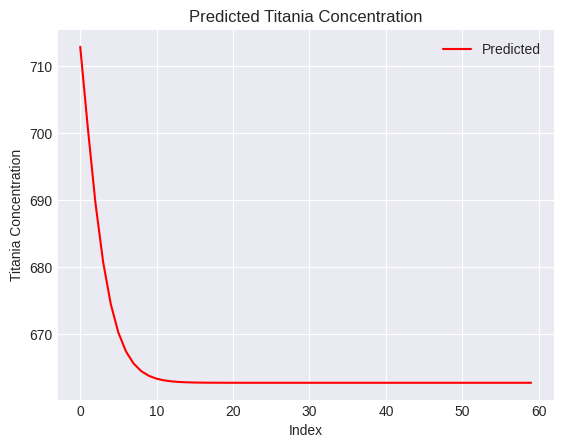

In [ ]:
# Make predictions using the fitted model
predictions = arima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1+36, dynamic=False).values

# Plot predictions vs expected
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Titania Concentration')
plt.title('Predicted Titania Concentration')
plt.legend();

- The plot predicts Titania Concentration based on the ARIMA model forecast.
- The prediction line starts at a peak and shows a rapid decline initially, stabilizing gradually as it progresses.
- The sharp initial drop might indicate an overfitting issue where the model overly adjusts to the last few data points in the training set or possibly a model initialization effect.

In [ ]:
# Load data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to daily frequency using mean
daily_data = data.resample('D').mean()

# Split the data into train and test sets
split_date = '2004-08-08'  # Use the appropriate date for your dataset
Train = daily_data.loc[daily_data.index < split_date]
Test = daily_data.loc[daily_data.index >= split_date]

# Fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit auto ARIMA model with seasonality
auto_sarima_model = auto_arima(Train['PT08.S2(NMHC)'], start_p=1, start_q=1,
                              max_p=30, max_q=30, m=7,  # Set m to the seasonal period (weekly seasonality for daily data)
                              seasonal=True,  # Enable seasonal ARIMA
                              d=None, trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True,
                              random_state=seed)

# Print best parameters found
print("Order (p,d,q):", auto_sarima_model.order)
print("Seasonal Order (P,D,Q,m):", auto_sarima_model.seasonal_order)

# Fit SARIMA model with the best parameters
model_sarima = ARIMA(Train['PT08.S2(NMHC)'], order=auto_sarima_model.order, seasonal_order=auto_sarima_model.seasonal_order)
sarima_fit = model_sarima.fit()

# Print summary of the fitted model
print(sarima_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1999.575, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1977.807, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1976.647, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2499.441, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=1978.328, Time=0.43 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=1992.961, Time=0.70 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=1976.879, Time=0.24 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=1975.747, Time=0.89 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=1981.555, Time=0.52 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=1994.427, Time=0.18 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=1977.419, Time=0.20 sec
 ARIMA(0,0,2)(1,0,0)[7] intercept   : AIC=1981.257, Time=0.13 sec
 ARIMA(1,0,2)(1,0,0)[7] intercept   : AIC=19

predicted=863.617642, expected=752.416667
predicted=927.998930, expected=708.625000
predicted=932.782899, expected=920.250000
predicted=923.013531, expected=855.458333
predicted=917.359096, expected=834.458333
predicted=936.610074, expected=760.458333
predicted=910.481691, expected=722.916667
predicted=916.379450, expected=693.250000
predicted=927.495170, expected=797.625000
predicted=928.321143, expected=828.708333
predicted=926.634418, expected=847.541667
predicted=925.658154, expected=798.208333
predicted=928.981922, expected=786.916667
predicted=924.470739, expected=712.708333
predicted=925.489014, expected=757.083333
predicted=927.408193, expected=812.375000
predicted=927.550801, expected=853.041667
predicted=927.259580, expected=872.458333
predicted=927.091024, expected=18.625000
predicted=927.664888, expected=-200.000000
predicted=926.886012, expected=694.583333
predicted=927.061821, expected=826.708333
predicted=927.393176, expected=973.875000
predicted=927.417798, expected=980

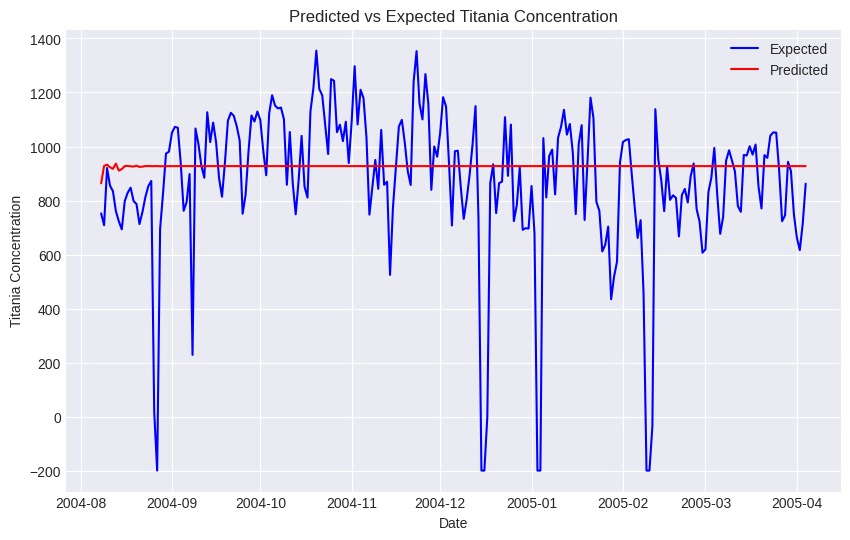

In [ ]:
predictions = sarima_fit.predict(start=len(Train), end=len(Train)+len(Test)-1, dynamic=False).values

# Print predicted and expected values
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], Test['PT08.S2(NMHC)'].iloc[i]))

# Plot predictions vs expected
plt.figure(figsize=(10, 6))
plt.plot(Test.index, Test['PT08.S2(NMHC)'], label='Expected', color='blue')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.title('Predicted vs Expected Titania Concentration')
plt.legend()
plt.grid(True)
plt.show()

- The red line, representing the predictions, remains constant and does not reflect any of the fluctuations seen in the actual data. This suggests that the model used for predictions is not sensitive to changes in the data, possibly due to a simplistic or underfitting approach.
- The predicted line fails to capture any of the peaks or troughs in the Titania concentration, indicating a significant underperformance in terms of accuracy and responsiveness to changes in the dataset.
- Around the index positions corresponding to early September 2004, the predictions start deviating significantly from the actual values, notably underestimating and overestimating the concentrations at various points.
- The predictions towards the later part of the time series (post-2005) indicate some ability to anticipate changes in the data trend but are less accurate in magnitude, especially during sudden changes.

In [ ]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test['PT08.S2(NMHC)'].values, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['SARIMA'] = metrics_df.values[0]


In [ ]:
results

RMSE         MAE     MAPE (%)
SARIMA  278.911916  182.059502  2384.189165

## Hot Winters Model

predicted=115.551424, expected=91.000000
predicted=107.539972, expected=11.000000
predicted=95.197419, expected=66.000000
predicted=80.126563, expected=231.000000
predicted=72.063827, expected=267.000000
predicted=67.716342, expected=129.000000
predicted=67.957550, expected=51.000000
predicted=70.645290, expected=5.000000
predicted=74.772915, expected=16.000000
predicted=81.669054, expected=38.000000
predicted=89.752365, expected=-6.000000
predicted=96.088335, expected=-44.000000
predicted=96.707339, expected=-133.000000
predicted=92.004179, expected=-53.000000
predicted=86.420560, expected=0.000000
predicted=80.977363, expected=174.000000
predicted=78.973236, expected=524.000000
predicted=78.222598, expected=786.000000
predicted=88.150476, expected=506.000000
predicted=102.813432, expected=355.000000
predicted=119.063927, expected=190.000000
predicted=135.323948, expected=331.000000
predicted=149.593084, expected=370.000000
predicted=157.242757, expected=297.000000
predicted=157.77476

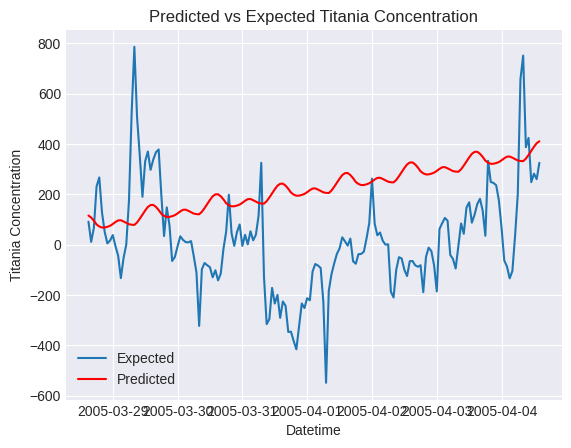

In [ ]:
# Load data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for the 'PT08.S2(NMHC)' column
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24).dropna()

# Define the training and testing periods (with data points every hour)
test_period = 7 * 24  # Last week (7 days * 24 hours)
train_period = -test_period  # All data except the last week

# Split the data into training and testing sets
Train = hourly_data['PT08.S2(NMHC)_diff'][:train_period].dropna()
Test = hourly_data['PT08.S2(NMHC)_diff'][train_period:].dropna()

# Train autoregression

# Fix the seed for randomness
seed = 42
np.random.seed(seed)

# Fit Holt-Winters Seasonal Model
holt_winters_model = ExponentialSmoothing(
    Train,
    seasonal_periods=24,
    trend='add',        # 'add' for additive trend, can be 'mul' for multiplicative
    seasonal='add'      # 'add' for additive seasonality, can be 'mul' for multiplicative
).fit()

# Make predictions using the fitted model
predictions = holt_winters_model.forecast(len(Test))

# Print predicted and expected values
for i in range(len(predictions)):
    print(f'predicted={predictions.iloc[i]:.6f}, expected={Test.iloc[i]:.6f}')

# Plot predictions vs expected
plt.plot(Test.index, Test, label='Expected')
plt.plot(Test.index, predictions, color='red', label='Predicted')
plt.xlabel('Datetime')
plt.ylabel('Titania Concentration')
plt.title('Predicted vs Expected Titania Concentration')
plt.legend()
plt.show()

- The predicted values (red line) consistently follow the central trend of the expected data (blue line) but with less variability. This suggests that while the model can approximate the general movement of Titania concentrations, it lacks sensitivity to capture rapid or extreme changes.
- There are noticeable discrepancies where the predicted values fail to capture sharp spikes or deep troughs in the data. This underlines a limitation in the model's ability to detect sudden shifts in environmental conditions that may affect Titania levels.
- The model demonstrates stability in its predictions, avoiding any erratic behavior even in response to the large swings observed in the actual data. This could be advantageous for applications requiring stable and consistent forecasts but might miss critical short-term fluctuations.
- Enhancing the model with more dynamic features, such as rolling averages or incorporating additional variables that influence Titania concentration, might improve its predictive accuracy. Adjusting the model to be more responsive to sudden changes without sacrificing its general forecasting stability could also be beneficial.

In [ ]:
# Calculate metrics for the predictions
metrics = calculate_metrics(Test, predictions)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Holt_Winters'] = metrics_df.values[0]

In [ ]:
results

RMSE         MAE     MAPE (%)
SARIMA        278.911916  182.059502  2384.189165
Holt_Winters  298.775485  258.623316          inf



## MultiLayer Perceptions (MLPs) Models

In [ ]:
df = pd.read_csv('AirQuality.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6         1360       150      11.9           1046   
2004-03-10 19:00:00     2.0         1292       112       9.4            955   
2004-03-10 20:00:00     2.2         1402        88       9.0            939   
2004-03-10 21:00:00     2.2         1376        80       9.2            948   
2004-03-10 22:00:00     1.6         1272        51       6.5            836   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00      166          1056      113          1692   
2004-03-10 19:00:00      103          1174       92          1559   
2004-03-10 20:00:00      131          1140      114          1555   
2004-03-10 21:00:00      172          1092      122          1584   
2004-03-10 22:00:00      131          1205      116          1490   

                     PT08.S5(O3)     T    RH      AH  
Datetime                                              
2004-03-10 18:00:00         1268  13.6  48.9  0.7578  
2004-03-10 19:00:00          972  13.3  47.7  0.7255  
2004-03-10 20:00:00         1074  11.9  54.0  0.7502  
2004-03-10 21:00:00         1203  11.0  60.0  0.7867  
2004-03-10 22:00:00         1110  11.2  59.6  0.7888

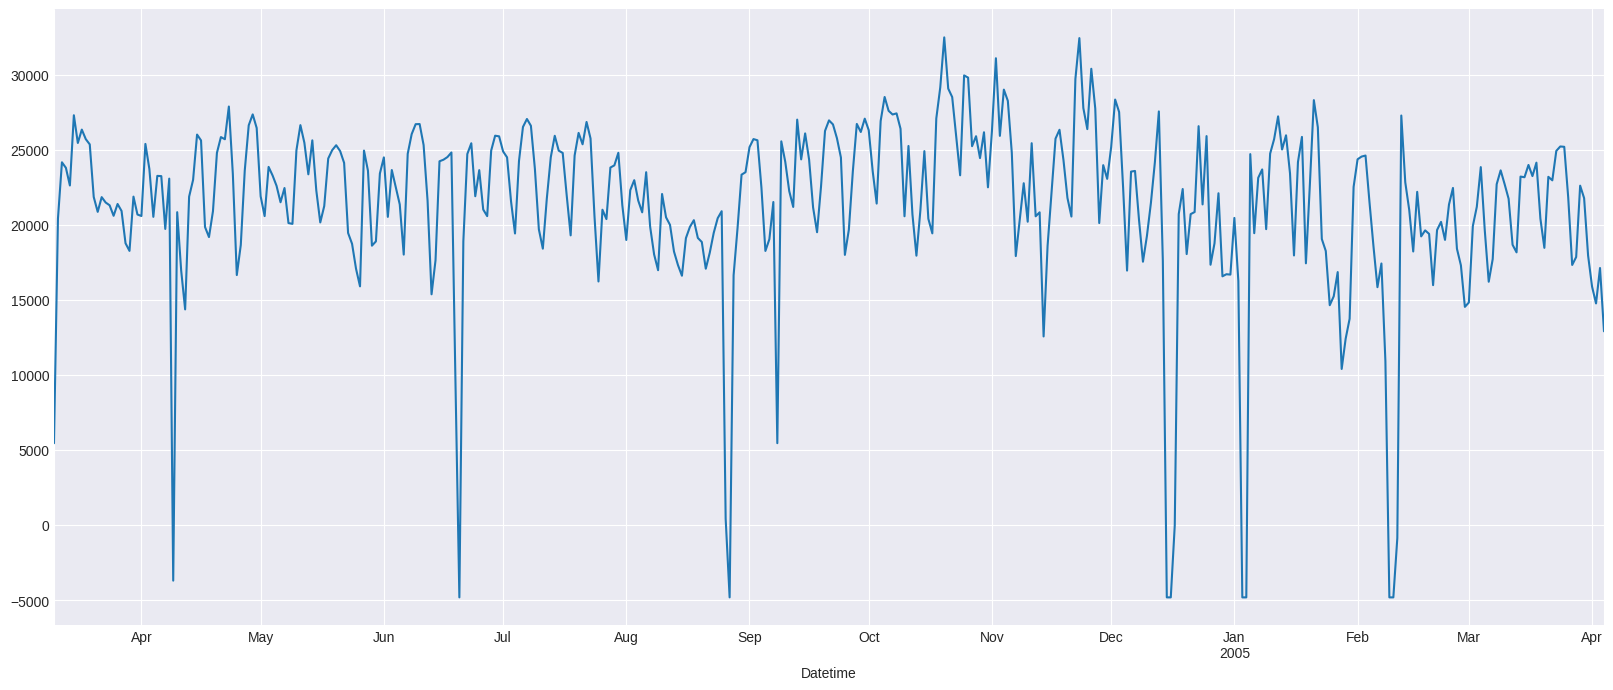

In [ ]:
df_daily = df['PT08.S2(NMHC)'].resample('D').sum()
df_daily.plot(figsize=(20, 8));

In [ ]:
def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame with a datetime index.

    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df

# Apply the feature creation function to the DataFrame
df_eng = feature_engineering(df_daily.to_frame())

In [ ]:
df_eng

PT08.S2(NMHC)  dayofweek  quarter  month  year  dayofyear
Datetime                                                             
2004-03-10           5474          2        1      3  2004         70
2004-03-11          20447          3        1      3  2004         71
2004-03-12          24199          4        1      3  2004         72
2004-03-13          23828          5        1      3  2004         73
2004-03-14          22654          6        1      3  2004         74
...                   ...        ...      ...    ...   ...        ...
2005-03-31          17986          3        1      3  2005         90
2005-04-01          15912          4        2      4  2005         91
2005-04-02          14791          5        2      4  2005         92
2005-04-03          17153          6        2      4  2005         93
2005-04-04          12934          0        2      4  2005         94

[391 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for 'PT08.S2(NMHC)' and 'PT08.S5(O3)' columns
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24)
hourly_data['PT08.S5(O3)_diff'] = hourly_data['PT08.S5(O3)'].diff(24)

# Drop NA values
hourly_data = hourly_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hourly_data[['PT08.S2(NMHC)_diff', 'PT08.S5(O3)_diff']])

# Function to split the data into sequences
def create_multivariate_data(scaled_data, window_size, target_index):
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i + window_size])
        y.append(scaled_data[i + window_size][target_index])
    return np.array(X), np.array(y)

# Define the target column index
target_index = 0  # Index for 'PT08.S2(NMHC)_diff'

# Create multivariate data
window_size = 24  # Using 24 hours as the window size
X, y = create_multivariate_data(scaled_data, window_size, target_index)

# Split the data into training, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for Conv1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Print the shapes after reshaping
print("Shapes after reshaping:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

Shapes after reshaping:
X_train: (5585, 24, 2)
X_val: (1862, 24, 2)
X_test: (1862, 24, 2)




### Univariate MLP Models

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image
from keras.layers import Dense, Input
from statsmodels.tsa.seasonal import STL
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import concatenate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the univariate CNN model
model_uni_cnn = Sequential()
model_uni_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model_uni_cnn.add(Flatten())
model_uni_cnn.add(Dense(100, activation='relu'))
model_uni_cnn.add(Dense(1))
model_uni_cnn.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_uni_cnn = model_uni_cnn.fit(X_train[:, :, 0].reshape(-1, window_size, 1), y_train, epochs=1000, verbose=1, validation_data=(X_val[:, :, 0].reshape(-1, window_size, 1), y_val), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 2s 6ms/step - loss: 0.3266 - val_loss: 0.2695
Epoch 2/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2673 - val_loss: 0.3004
Epoch 3/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2539 - val_loss: 0.2643
Epoch 4/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2447 - val_loss: 0.2666
Epoch 5/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2390 - val_loss: 0.2565
Epoch 6/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.2271 - val_loss: 0.2383
Epoch 7/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2214 - val_loss: 0.2468
Epoch 8/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.2134 - val_loss: 0.2424
Epoch 9/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2130 - val_loss: 0.2382
Epoch 10/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.208

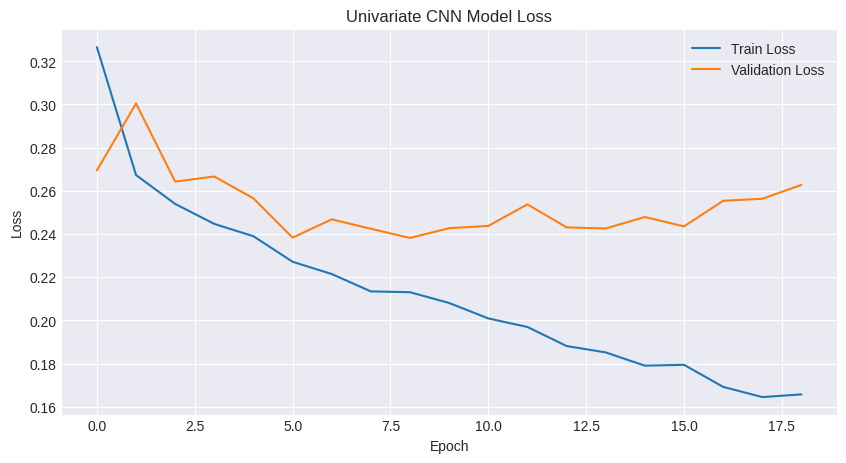

59/59 [==============================] - 0s 2ms/step


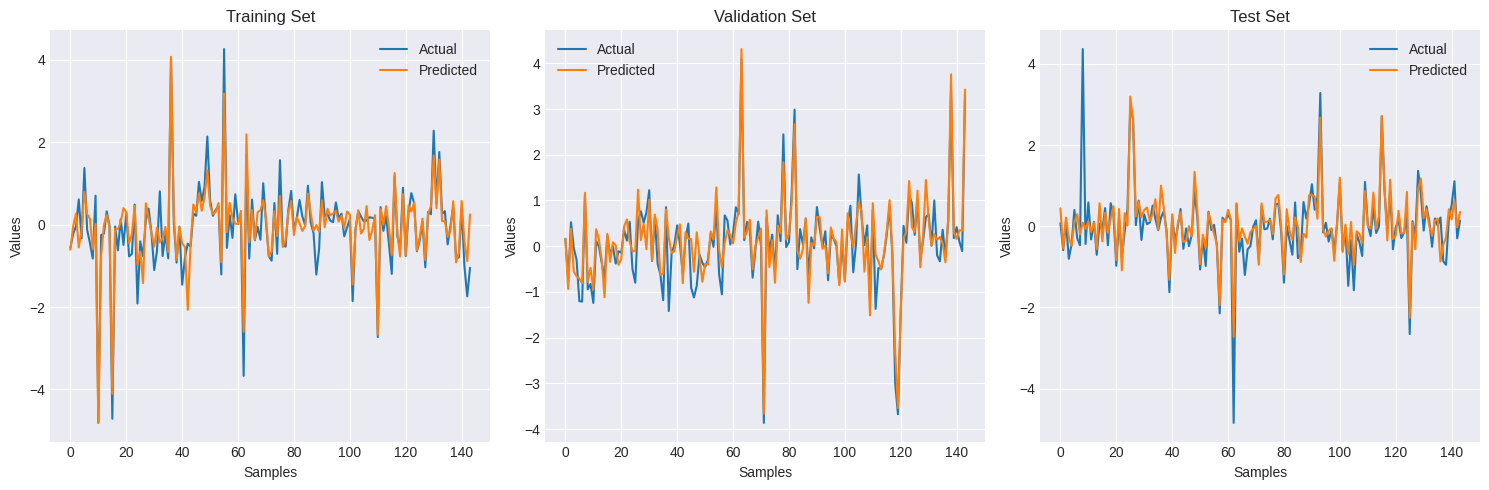

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_uni_cnn.history['loss'], label='Train Loss')
plt.plot(history_uni_cnn.history['val_loss'], label='Validation Loss')
plt.title('Univariate CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_uni_cnn.predict(X_train[:, :, 0].reshape(-1, window_size, 1))
y_val_pred = model_uni_cnn.predict(X_val[:, :, 0].reshape(-1, window_size, 1))
y_test_pred = model_uni_cnn.predict(X_test[:, :, 0].reshape(-1, window_size, 1))

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-6*24:], label='Actual')
plt.plot(y_train_pred[-6*24:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-6*24:], label='Actual')
plt.plot(y_val_pred[-6*24:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-6*24:], label='Actual')
plt.plot(y_test_pred[-6*24:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Univariate CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE      MAE     MAPE (%)
Univariate CNN Model  0.52661  0.33541  3131.007384

- The model demonstrates a good capacity to learn and predict the general trends in the data across the training, validation, and test sets.
- However, the high MAPE value and the visible discrepancies in peak predictions suggest that the model might struggle with extreme values or anomalies within the dataset.
- Optimizing the model might involve exploring additional features, fine-tuning the model architecture, or using regularization techniques to manage overfitting, as hinted by the validation loss behavior.

### Multivariate MLP Models

#### Multi-headed MLP Model

In [ ]:
# Extract different feature columns for multi-headed CNN
X1 = X[:, :, 0].reshape(-1, window_size, 1)
X2 = X[:, :, 1].reshape(-1, window_size, 1)

# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

# First input model
visible1 = Input(shape=(window_size, 1))
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
flat1 = Flatten()(conv1)

# Second input model
visible2 = Input(shape=(window_size, 1))
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
flat2 = Flatten()(conv2)

# Merge input models
merged = concatenate([flat1, flat2])
dense1 = Dense(100, activation='relu')(merged)
output = Dense(1)(dense1)

# Create and compile the model
model_multi_head = Model(inputs=[visible1, visible2], outputs=output)
model_multi_head.compile(optimizer='adam', loss='mse')

# Fit the model
history_multi_head = model_multi_head.fit([X1_train, X2_train], y_train, epochs=1000, verbose=1, validation_data=([X1_val, X2_val], y_val), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.3485 - val_loss: 0.2777
Epoch 2/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2707 - val_loss: 0.3201
Epoch 3/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2530 - val_loss: 0.2671
Epoch 4/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2446 - val_loss: 0.2690
Epoch 5/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2429 - val_loss: 0.2570
Epoch 6/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2250 - val_loss: 0.2409
Epoch 7/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.2173 - val_loss: 0.2549
Epoch 8/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2104 - val_loss: 0.2434
Epoch 9/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2058 - val_loss: 0.2416
Epoch 10/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.200

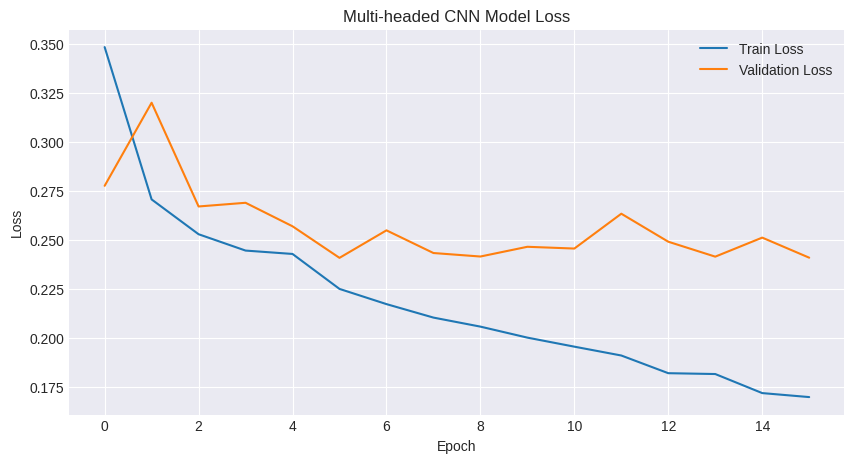

59/59 [==============================] - 0s 2ms/step


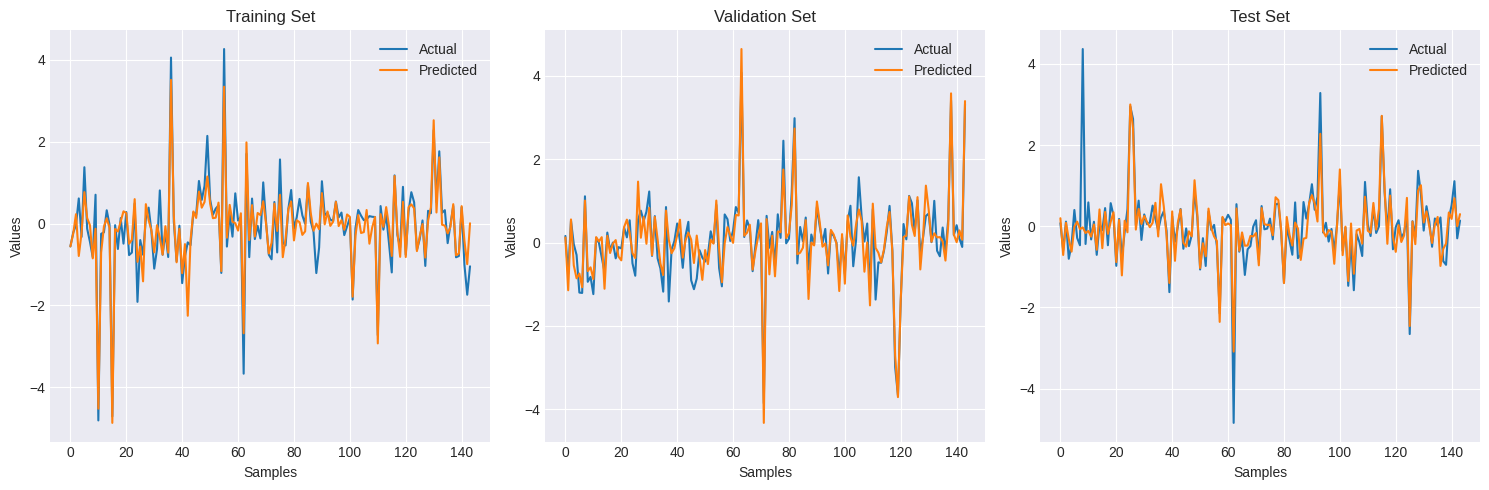

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_head.history['loss'], label='Train Loss')
plt.plot(history_multi_head.history['val_loss'], label='Validation Loss')
plt.title('Multi-headed CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_multi_head.predict([X1_train, X2_train])
y_val_pred = model_multi_head.predict([X1_val, X2_val])
y_test_pred = model_multi_head.predict([X1_test, X2_test])

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-6*24:], label='Actual')
plt.plot(y_train_pred[-6*24:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-6*24:], label='Actual')
plt.plot(y_val_pred[-6*24:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-6*24:], label='Actual')
plt.plot(y_test_pred[-6*24:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi-headed CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE       MAE     MAPE (%)
Univariate CNN Model    0.526610  0.335410  3131.007384
Multi-headed CNN Model  0.518272  0.330589  3231.864824

- The Multi-headed CNN Model shows a robust ability to forecast the general trends and minute fluctuations within the time series data effectively across different datasets.
- The model's loss behavior suggests good convergence on training data, though the validation loss plateau may need addressing to avoid overfitting.
- Despite the high MAPE, the RMSE and MAE values are promising, suggesting the model's utility in scenarios where precise trend prediction is more crucial than exact value prediction.

#### Vector-Output MLP Model

In [ ]:
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for 'PT08.S2(NMHC)' and 'PT08.S5(O3)' columns
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24).dropna()
hourly_data['PT08.S5(O3)_diff'] = hourly_data['PT08.S5(O3)'].diff(24).dropna()

# Drop NA values
hourly_data = hourly_data.dropna()

# Define input sequences
in_seq1 = hourly_data['PT08.S2(NMHC)_diff'].values
in_seq2 = hourly_data['PT08.S5(O3)_diff'].values
out_seq = np.array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert sequences to a [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = np.hstack((in_seq1, in_seq2, out_seq))

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences) - n_steps):
        end_ix = i + n_steps
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Choose a number of time steps
n_steps = 24

# Convert dataset into input/output samples
X, y = split_sequences(dataset, n_steps)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

# Summarize the data by printing each input/output pair
for i in range(len(X)):
    print('='* 20)
    print(f"X[{i}]:\n{X[i]}, \ny[{i}]:\n{y[i]}")

# Flatten input for MLP
n_input = X.shape[1] * X.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_val_flat = X_val.reshape((X_val.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

# # Ensure `y` is 2D for multiple output handling
n_output = 1  # y is already 2D, so we don't need to flatten further


Streaming output truncated to the last 5000 lines.
 [-149. -208. -357.]
 [-266. -467. -733.]
 [-206. -404. -610.]
 [-249. -343. -592.]
 [-262. -290. -552.]
 [-213. -212. -425.]
 [ -89. -100. -189.]
 [-168. -246. -414.]
 [-178. -277. -455.]
 [ -71. -153. -224.]
 [-101. -248. -349.]
 [ -75. -235. -310.]
 [ -29. -156. -185.]
 [ -72. -219. -291.]], 
y[9130]:
-329.0
X[9131]:
[[-174. -262. -436.]
 [-155. -262. -417.]
 [ -77. -149. -226.]
 [-251. -303. -554.]
 [-277. -503. -780.]
 [-257. -535. -792.]
 [-214. -437. -651.]
 [-151. -208. -359.]
 [-141. -198. -339.]
 [-149. -208. -357.]
 [-266. -467. -733.]
 [-206. -404. -610.]
 [-249. -343. -592.]
 [-262. -290. -552.]
 [-213. -212. -425.]
 [ -89. -100. -189.]
 [-168. -246. -414.]
 [-178. -277. -455.]
 [ -71. -153. -224.]
 [-101. -248. -349.]
 [ -75. -235. -310.]
 [ -29. -156. -185.]
 [ -72. -219. -291.]
 [ -92. -237. -329.]], 
y[9131]:
-286.0
X[9132]:
[[-155. -262. -417.]
 [ -77. -149. -226.]
 [-251. -303. -554.]
 [-277. -503. -780.]
 [-257. -53

In [ ]:
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_flat, y_train, epochs=1000, verbose=1, validation_data=(X_val_flat, y_val), callbacks=[early_stopping])

Epoch 1/1000
175/175 [==============================] - 1s 2ms/step - loss: 203242.9844 - val_loss: 144628.6875
Epoch 2/1000
175/175 [==============================] - 0s 2ms/step - loss: 143203.2969 - val_loss: 156658.5469
Epoch 3/1000
175/175 [==============================] - 0s 1ms/step - loss: 138454.1875 - val_loss: 150781.3750
Epoch 4/1000
175/175 [==============================] - 0s 2ms/step - loss: 134697.2812 - val_loss: 163532.7344
Epoch 5/1000
175/175 [==============================] - 0s 2ms/step - loss: 141454.8125 - val_loss: 147695.8281
Epoch 6/1000
175/175 [==============================] - 0s 1ms/step - loss: 133227.0625 - val_loss: 138589.7500
Epoch 7/1000
175/175 [==============================] - 0s 2ms/step - loss: 129519.7656 - val_loss: 146710.1406
Epoch 8/1000
175/175 [==============================] - 0s 2ms/step - loss: 135647.7344 - val_loss: 138244.1719
Epoch 9/1000
175/175 [==============================] - 0s 1ms/step - loss: 128026.7344 - val_loss: 1357

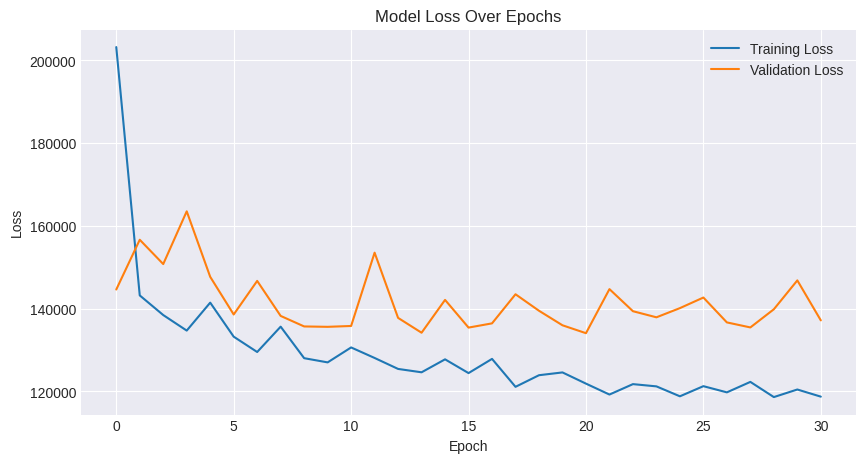

59/59 [==============================] - 0s 1ms/step


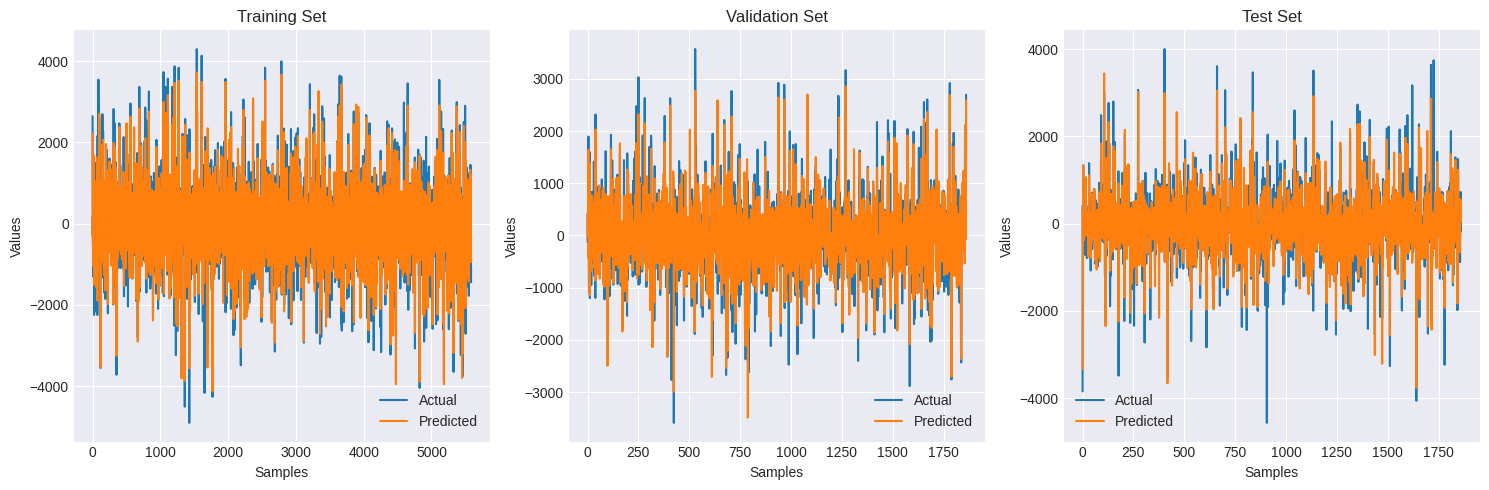

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model.predict(X_train_flat)
y_val_pred = model.predict(X_val_flat)
y_test_pred = model.predict(X_test_flat)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual')
plt.plot(y_train_pred, label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val, label='Actual')
plt.plot(y_val_pred, label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Vector-Output MLP Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE         MAE  MAPE (%)
Vector-Output MLP Model  390.332887  248.795864       inf

- The Vector-Output MLP Model, while adept at learning general patterns, shows significant limitations in accuracy and sensitivity when facing data variability, particularly in the validation and test sets.
- The high RMSE, MAE, and infinite MAPE underscore the need for enhancements to achieve practical forecasting precision.
- Strategies for improvement include increasing the model's complexity by adding more layers or neurons to better capture complex data patterns, advancing feature engineering to enrich the input data and enhance the model's understanding of data nuances, and incorporating regularization techniques like dropout or L2 regularization to mitigate overfitting and bolster generalization.
- These measures are aimed at refining the model's ability to fit the training data more effectively and at boosting its performance on unseen data, thereby narrowing the discrepancy between predicted and actual values.

### Multi-step MLP Models

In [ ]:
# Function to split a univariate sequence into input/output samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end of the input sequence
        end_ix = i + n_steps_in
        # Define the end of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output sequences
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define input sequences
raw_seq = hourly_data['PT08.S2(NMHC)_diff'].dropna().tolist()

# Choose a number of time steps
n_steps_in, n_steps_out = 24, 6  # Adjust as needed

# Split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (9304, 24)
Output shape: (9304, 6)


In [ ]:
# Set the random seeds for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Flatten input for MLP
n_input = X.shape[1]
n_output = y.shape[1]

# Define the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
175/175 [==============================] - 1s 2ms/step - loss: 73597.3984 - val_loss: 53736.9258
Epoch 2/1000
175/175 [==============================] - 0s 1ms/step - loss: 58734.3359 - val_loss: 51786.0898
Epoch 3/1000
175/175 [==============================] - 0s 2ms/step - loss: 56313.7812 - val_loss: 49376.6367
Epoch 4/1000
175/175 [==============================] - 0s 1ms/step - loss: 54775.9414 - val_loss: 49065.5703
Epoch 5/1000
175/175 [==============================] - 0s 1ms/step - loss: 54145.6211 - val_loss: 48569.2070
Epoch 6/1000
175/175 [==============================] - 0s 1ms/step - loss: 53854.0391 - val_loss: 48175.9336
Epoch 7/1000
175/175 [==============================] - 0s 2ms/step - loss: 53656.5352 - val_loss: 48625.3242
Epoch 8/1000
175/175 [==============================] - 0s 1ms/step - loss: 53256.7695 - val_loss: 48736.5859
Epoch 9/1000
175/175 [==============================] - 0s 1ms/step - loss: 52909.5938 - val_loss: 48311.7695
Epoch 10/1

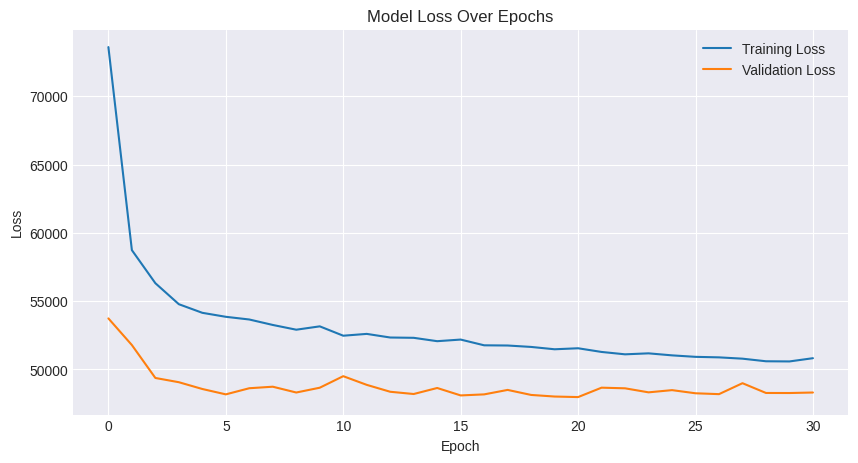

59/59 [==============================] - 0s 883us/step


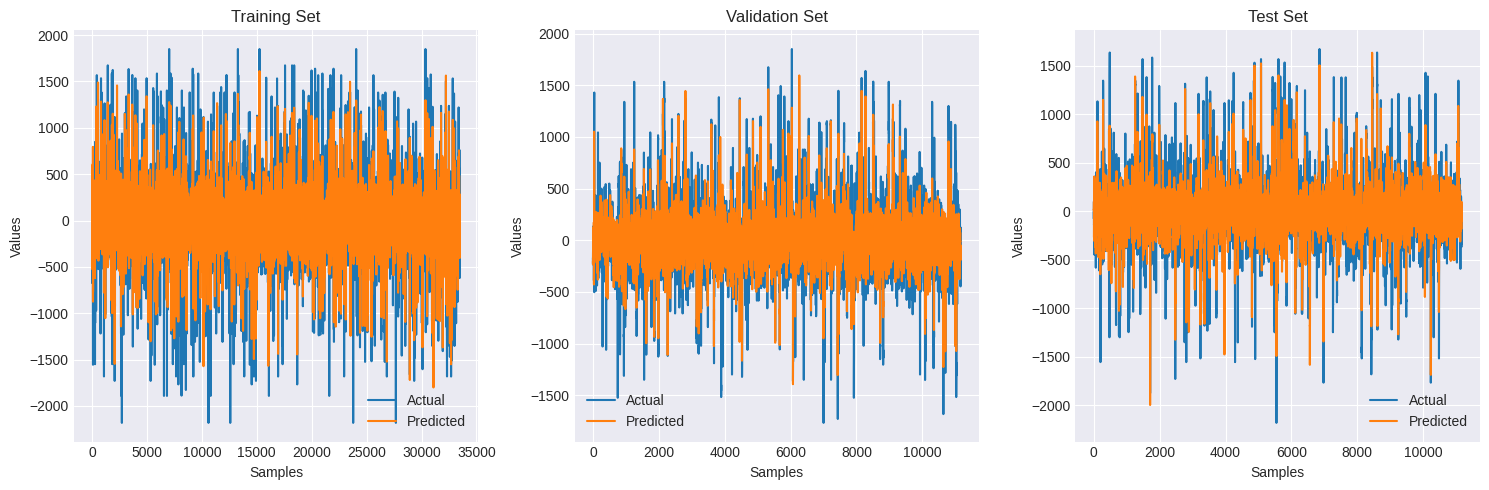

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi-step MLP Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE         MAE  MAPE (%)
Multi-step MLP Model  235.398678  158.059393       inf

- The Multi-step MLP Model displays a commendable ability to track general trends within the dataset across training, validation, and test sets, with visuals indicating a good fit to the training data and reasonable predictions for unseen data.
- However, the metrics—RMSE of 235.39 and MAE of 158.05—indicate moderate prediction errors, while the infinite MAPE suggests issues in handling values close to zero.
- To enhance its performance, the model could benefit from refined architectural adjustments, improved data preprocessing to better manage value ranges, and more sophisticated feature engineering to capture complex data dynamics. These improvements could significantly increase the model's accuracy and reliability for practical forecasting applications.

### Multivariate Multi-step MLP Models

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x = sequences[i:end_ix, :-1]
        seq_y = sequences[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of time steps for input and output
n_steps_in, n_steps_out = 24, 6

# Convert dataset into input/output samples
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

# Summarize the data by printing each input/output pair
for i in range(len(X)):
    print('='* 20)
    print(f"X[{i}]:\n{X[i]}, \ny[{i}]:\n{y[i]}")

# Flatten input for MLP
n_input = X.shape[1] * X.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_val_flat = X_val.reshape((X_val.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

# Flatten output
n_output = y.shape[1]
y_train_flat = y_train.reshape((y_train.shape[0], n_output))
y_val_flat = y_val.reshape((y_val.shape[0], n_output))
y_test_flat = y_test.reshape((y_test.shape[0], n_output))

Streaming output truncated to the last 5000 lines.
 [-277. -503.]
 [-257. -535.]
 [-214. -437.]
 [-151. -208.]
 [-141. -198.]
 [-149. -208.]
 [-266. -467.]
 [-206. -404.]
 [-249. -343.]
 [-262. -290.]
 [-213. -212.]
 [ -89. -100.]
 [-168. -246.]
 [-178. -277.]], 
y[9125]:
[-224. -349. -310. -185. -291. -329.]
X[9126]:
[[-225. -330.]
 [-268. -437.]
 [-198. -400.]
 [-122. -242.]
 [-136. -261.]
 [-174. -262.]
 [-155. -262.]
 [ -77. -149.]
 [-251. -303.]
 [-277. -503.]
 [-257. -535.]
 [-214. -437.]
 [-151. -208.]
 [-141. -198.]
 [-149. -208.]
 [-266. -467.]
 [-206. -404.]
 [-249. -343.]
 [-262. -290.]
 [-213. -212.]
 [ -89. -100.]
 [-168. -246.]
 [-178. -277.]
 [ -71. -153.]], 
y[9126]:
[-349. -310. -185. -291. -329. -286.]
X[9127]:
[[-268. -437.]
 [-198. -400.]
 [-122. -242.]
 [-136. -261.]
 [-174. -262.]
 [-155. -262.]
 [ -77. -149.]
 [-251. -303.]
 [-277. -503.]
 [-257. -535.]
 [-214. -437.]
 [-151. -208.]
 [-141. -198.]
 [-149. -208.]
 [-266. -467.]
 [-206. -404.]
 [-249. -343.]
 [-262

#### Multiple Input Multi-step Output Model

In [ ]:
# Set the random seeds for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Flatten input for MLP
n_input = X.shape[1] * X.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_val_flat = X_val.reshape((X_val.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

# Define the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_flat, y_train, epochs=1000, verbose=1, validation_data=(X_val_flat, y_val), callbacks=[early_stopping])

Epoch 1/1000
175/175 [==============================] - 1s 3ms/step - loss: 377810.5625 - val_loss: 286736.8438
Epoch 2/1000
175/175 [==============================] - 0s 2ms/step - loss: 314703.9062 - val_loss: 278414.5312
Epoch 3/1000
175/175 [==============================] - 0s 2ms/step - loss: 302261.0000 - val_loss: 266809.7500
Epoch 4/1000
175/175 [==============================] - 0s 2ms/step - loss: 294685.4062 - val_loss: 266792.2812
Epoch 5/1000
175/175 [==============================] - 0s 1ms/step - loss: 290315.8438 - val_loss: 263608.2812
Epoch 6/1000
175/175 [==============================] - 0s 2ms/step - loss: 289062.9062 - val_loss: 261770.4844
Epoch 7/1000
175/175 [==============================] - 0s 1ms/step - loss: 287948.0312 - val_loss: 261898.3750
Epoch 8/1000
175/175 [==============================] - 0s 1ms/step - loss: 285271.6250 - val_loss: 263447.5938
Epoch 9/1000
175/175 [==============================] - 0s 1ms/step - loss: 283546.2500 - val_loss: 2618

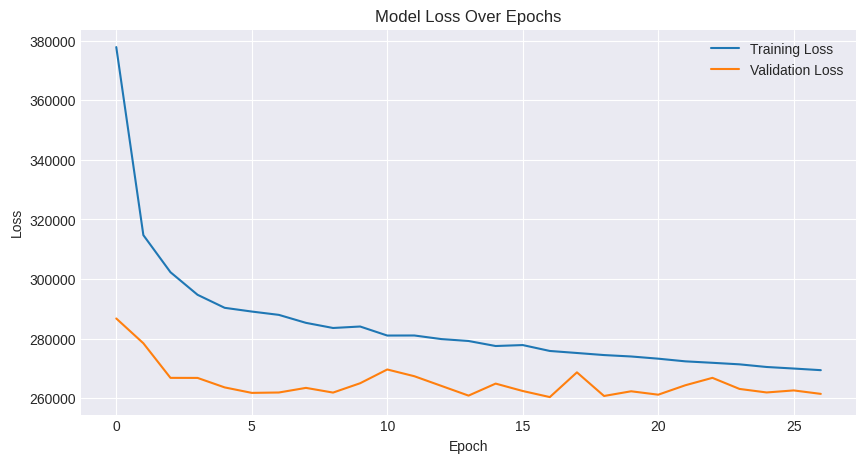

59/59 [==============================] - 0s 914us/step


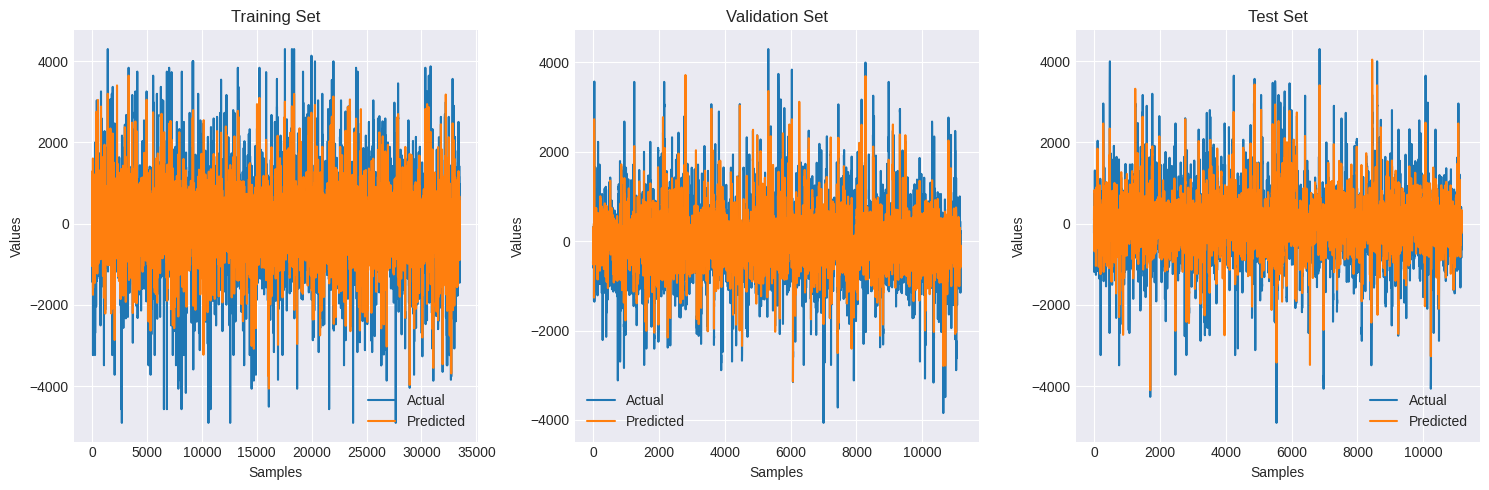

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model.predict(X_train_flat)
y_val_pred = model.predict(X_val_flat)
y_test_pred = model.predict(X_test_flat)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multiple Input Multi-step Output Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE         MAE  MAPE (%)
Multiple Input Multi-step Output Model  535.461694  372.971251       inf

- This Multiple Input Multi-step Output Model demonstrates effectiveness in learning complex patterns from the training data and somewhat generalizing to new datasets.
- However, the high RMSE and MAE, alongside an infinite MAPE, point out the need for further refinement.
- Improvements could include enhancing the model's architecture or tuning, better preprocessing to handle anomalies or zero-values more effectively, and possibly incorporating more diverse data features or external variables to aid in capturing peaks and fluctuations more accurately.

#### Multiple Parallel Input and Multi-step Output Model

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_flat, y_train_flat, epochs=1000, verbose=1, validation_data=(X_val_flat, y_val_flat), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 1s 2ms/step - loss: 377810.5625 - val_loss: 286736.8438
Epoch 2/1000
175/175 [==============================] - 0s 2ms/step - loss: 314703.9062 - val_loss: 278414.5312
Epoch 3/1000
175/175 [==============================] - 0s 2ms/step - loss: 302261.0000 - val_loss: 266809.7500
Epoch 4/1000
175/175 [==============================] - 0s 2ms/step - loss: 294685.4062 - val_loss: 266792.2812
Epoch 5/1000
175/175 [==============================] - 0s 3ms/step - loss: 290315.8438 - val_loss: 263608.2812
Epoch 6/1000
175/175 [==============================] - 0s 3ms/step - loss: 289062.9062 - val_loss: 261770.4844
Epoch 7/1000
175/175 [==============================] - 0s 2ms/step - loss: 287948.0312 - val_loss: 261898.3750
Epoch 8/1000
175/175 [==============================] - 0s 2ms/step - loss: 285271.6250 - val_loss: 263447.5938
Epoch 9/1000
175/175 [==============================] - 0s 1ms/step - loss: 283546.2500 - val_loss: 2618

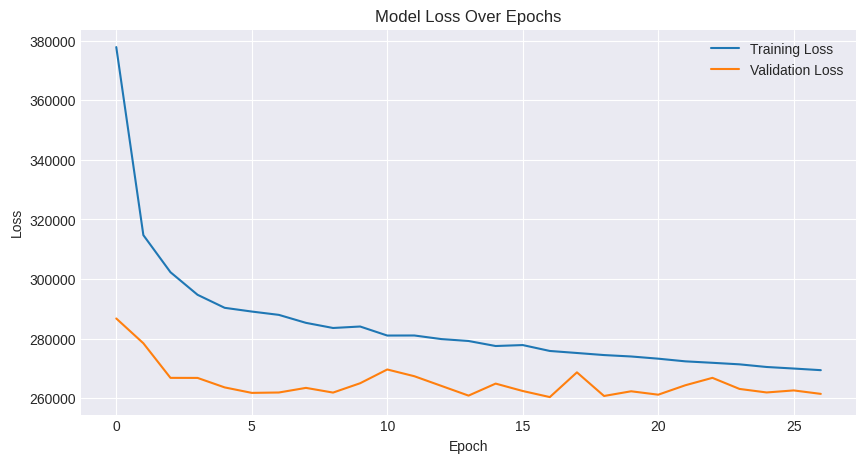

59/59 [==============================] - 0s 846us/step


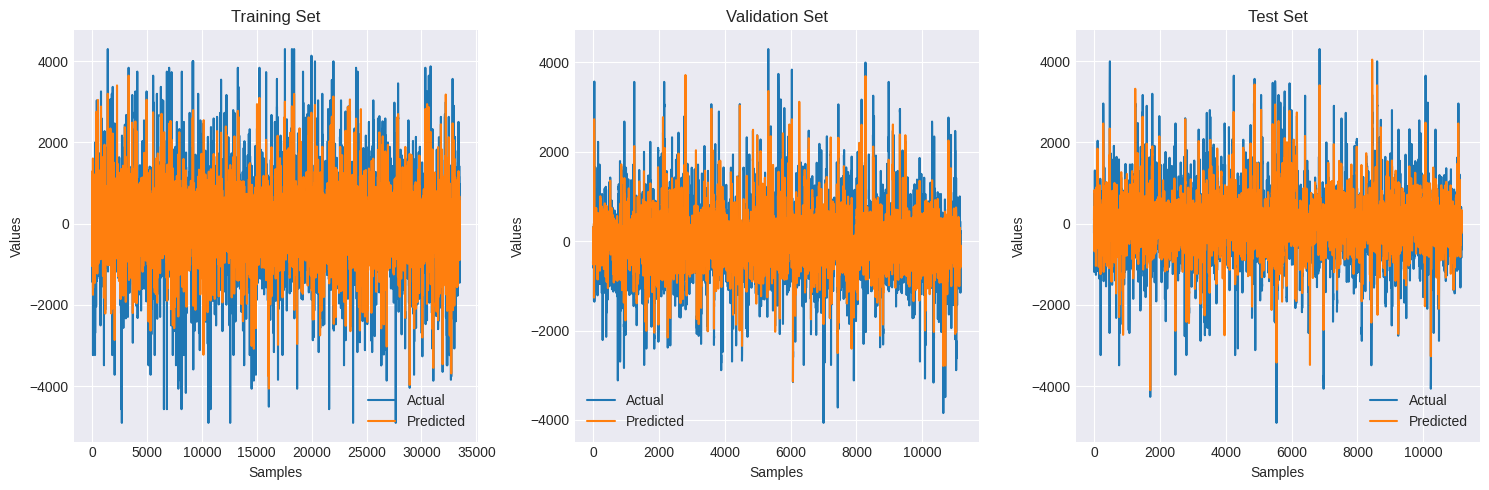

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model.predict(X_train_flat)
y_val_pred = model.predict(X_val_flat)
y_test_pred = model.predict(X_test_flat)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train_flat.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val_flat.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test_flat.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_metrics = calculate_metrics(y_test_flat.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multiple Parallel Input and Multi-step Output Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE         MAE  \
Multiple Parallel Input and Multi-step Output M...  535.461694  372.971251   

                                                    MAPE (%)  
Multiple Parallel Input and Multi-step Output M...       inf

- The Multiple Parallel Input and Multi-step Output Model shows robust learning capabilities and good generalization across the training, validation, and test datasets.
- However, the high RMSE and MAE alongside an infinite MAPE suggest that while the model is effective in tracking general trends, it requires enhancements to improve its precision, particularly in handling data points with low values and during periods of high data volatility.
- Improvements could include refining the model architecture, enhancing data preprocessing techniques, and incorporating advanced feature engineering to better capture the complexities and nuances of the time series data.
- These steps would likely help in reducing prediction errors and improving the model's practical applicability in real-world forecasting tasks.

## Convolutional Neural Network (CNNs) Models

In [ ]:
df = pd.read_csv('AirQuality.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6         1360       150      11.9           1046   
2004-03-10 19:00:00     2.0         1292       112       9.4            955   
2004-03-10 20:00:00     2.2         1402        88       9.0            939   
2004-03-10 21:00:00     2.2         1376        80       9.2            948   
2004-03-10 22:00:00     1.6         1272        51       6.5            836   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00      166          1056      113          1692   
2004-03-10 19:00:00      103          1174       92          1559   
2004-03-10 20:00:00      131          1140      114          1555   
2004-03-10 21:00:00      172          1092      122          1584   
2004-03-10 22:00:00      131          1205      116          1490   

                     PT08.S5(O3)     T    RH      AH  
Datetime                                              
2004-03-10 18:00:00         1268  13.6  48.9  0.7578  
2004-03-10 19:00:00          972  13.3  47.7  0.7255  
2004-03-10 20:00:00         1074  11.9  54.0  0.7502  
2004-03-10 21:00:00         1203  11.0  60.0  0.7867  
2004-03-10 22:00:00         1110  11.2  59.6  0.7888

In [ ]:
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6         1360       150      11.9           1046   
2004-03-10 19:00:00     2.0         1292       112       9.4            955   
2004-03-10 20:00:00     2.2         1402        88       9.0            939   
2004-03-10 21:00:00     2.2         1376        80       9.2            948   
2004-03-10 22:00:00     1.6         1272        51       6.5            836   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00      166          1056      113          1692   
2004-03-10 19:00:00      103          1174       92          1559   
2004-03-10 20:00:00      131          1140      114          1555   
2004-03-10 21:00:00      172          1092      122          1584   
2004-03-10 22:00:00      131          1205      116          1490   

                     PT08.S5(O3)     T    RH      AH  
Datetime                                              
2004-03-10 18:00:00         1268  13.6  48.9  0.7578  
2004-03-10 19:00:00          972  13.3  47.7  0.7255  
2004-03-10 20:00:00         1074  11.9  54.0  0.7502  
2004-03-10 21:00:00         1203  11.0  60.0  0.7867  
2004-03-10 22:00:00         1110  11.2  59.6  0.7888

In [ ]:
df_daily = df['PT08.S2(NMHC)'].resample('D').sum()

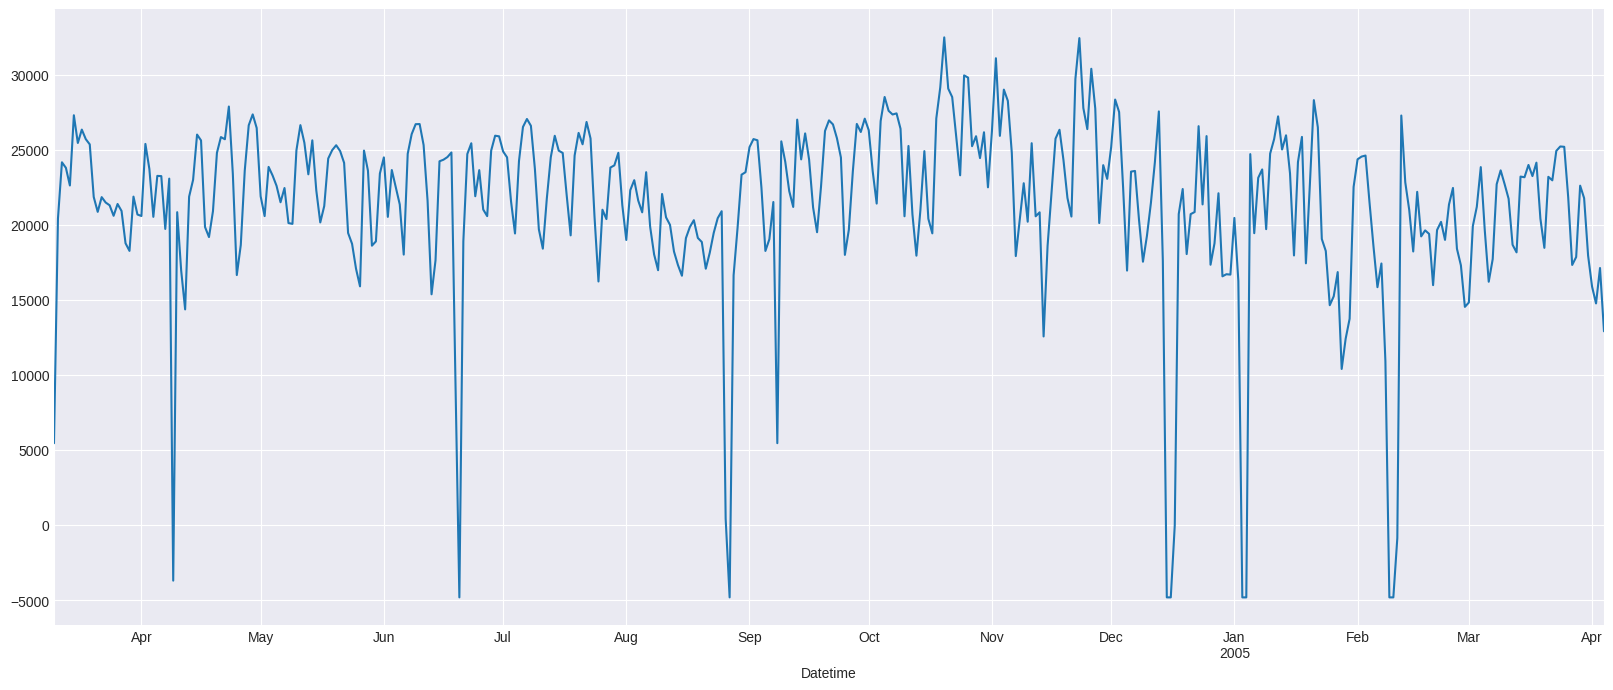

In [ ]:
df_daily.plot(figsize=(20, 8));

In [ ]:
def feature_engineering(dataframe):
    """
    Create time-based features from the datetime index of the DataFrame.

    Parameters:
    dataframe (DataFrame): The input DataFrame with a datetime index.

    Returns:
    DataFrame: A new DataFrame with additional time-based features.
    """
    new_df = dataframe.copy()  # Create a copy of the DataFrame to avoid modifying the original
    new_df['dayofweek'] = dataframe.index.dayofweek
    new_df['quarter'] = dataframe.index.quarter
    new_df['month'] = dataframe.index.month
    new_df['year'] = dataframe.index.year
    new_df['dayofyear'] = dataframe.index.dayofyear
    return new_df

# Apply the feature creation function to the DataFrame
df_eng = feature_engineering(df_daily.to_frame())

In [ ]:
df_eng

PT08.S2(NMHC)  dayofweek  quarter  month  year  dayofyear
Datetime                                                             
2004-03-10           5474          2        1      3  2004         70
2004-03-11          20447          3        1      3  2004         71
2004-03-12          24199          4        1      3  2004         72
2004-03-13          23828          5        1      3  2004         73
2004-03-14          22654          6        1      3  2004         74
...                   ...        ...      ...    ...   ...        ...
2005-03-31          17986          3        1      3  2005         90
2005-04-01          15912          4        2      4  2005         91
2005-04-02          14791          5        2      4  2005         92
2005-04-03          17153          6        2      4  2005         93
2005-04-04          12934          0        2      4  2005         94

[391 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for 'PT08.S2(NMHC)' and 'PT08.S5(O3)' columns
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24)
hourly_data['PT08.S5(O3)_diff'] = hourly_data['PT08.S5(O3)'].diff(24)

# Drop NA values
hourly_data = hourly_data.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hourly_data[['PT08.S2(NMHC)_diff', 'PT08.S5(O3)_diff']])

# Function to split the data into sequences
def create_multivariate_data(scaled_data, window_size, target_index):
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i + window_size])
        y.append(scaled_data[i + window_size][target_index])
    return np.array(X), np.array(y)

# Define the target column index
target_index = 0  # Index for 'PT08.S2(NMHC)_diff'

# Create multivariate data
window_size = 24  # Using 24 hours as the window size
X, y = create_multivariate_data(scaled_data, window_size, target_index)

# Split the data into training, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for Conv1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Print the shapes after reshaping
print("Shapes after reshaping:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)


Shapes after reshaping:
X_train: (5585, 24, 2)
X_val: (1862, 24, 2)
X_test: (1862, 24, 2)


### Univariate CNN Models

In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the univariate CNN model
model_uni_cnn = Sequential()
model_uni_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model_uni_cnn.add(Flatten())
model_uni_cnn.add(Dense(100, activation='relu'))
model_uni_cnn.add(Dense(1))
model_uni_cnn.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_uni_cnn = model_uni_cnn.fit(X_train[:, :, 0].reshape(-1, window_size, 1), y_train, epochs=1000, verbose=1, validation_data=(X_val[:, :, 0].reshape(-1, window_size, 1), y_val), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.3266 - val_loss: 0.2695
Epoch 2/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2673 - val_loss: 0.3004
Epoch 3/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2539 - val_loss: 0.2643
Epoch 4/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.2447 - val_loss: 0.2666
Epoch 5/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.2390 - val_loss: 0.2565
Epoch 6/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2271 - val_loss: 0.2383
Epoch 7/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.2214 - val_loss: 0.2468
Epoch 8/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2134 - val_loss: 0.2424
Epoch 9/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.2130 - val_loss: 0.2382
Epoch 10/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.208

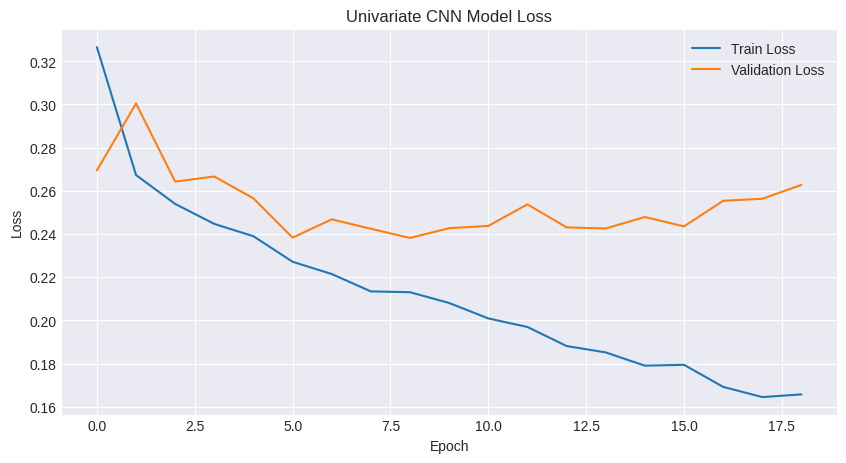

59/59 [==============================] - 0s 1ms/step


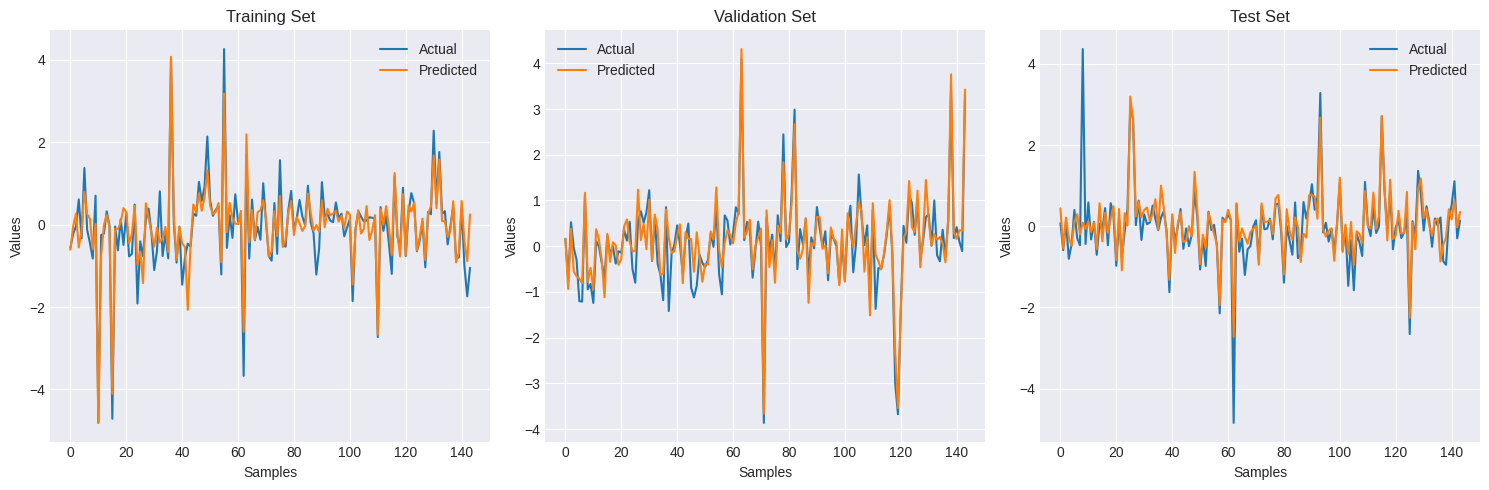

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_uni_cnn.history['loss'], label='Train Loss')
plt.plot(history_uni_cnn.history['val_loss'], label='Validation Loss')
plt.title('Univariate CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_uni_cnn.predict(X_train[:, :, 0].reshape(-1, window_size, 1))
y_val_pred = model_uni_cnn.predict(X_val[:, :, 0].reshape(-1, window_size, 1))
y_test_pred = model_uni_cnn.predict(X_test[:, :, 0].reshape(-1, window_size, 1))

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-6*24:], label='Actual')
plt.plot(y_train_pred[-6*24:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-6*24:], label='Actual')
plt.plot(y_val_pred[-6*24:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-6*24:], label='Actual')
plt.plot(y_test_pred[-6*24:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Univariate CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE      MAE     MAPE (%)
Univariate CNN Model  0.52661  0.33541  3131.007384

- The Univariate CNN Model demonstrates solid learning and generalization capabilities, effectively capturing the overall trends and fluctuations in the dataset across training, validation, and test sets.
- However, the high MAPE indicates a need for better handling of low-value data points and improving prediction precision during periods of high volatility.
- To enhance the model's performance, consider refining the model architecture, optimizing data preprocessing techniques, and incorporating additional features or external variables to better capture the complexities of the time series data.

### Multivariate CNN Models

#### Multi-headed CNN Model

In [ ]:
# Extract different feature columns for multi-headed CNN
X1 = X[:, :, 0].reshape(-1, window_size, 1)
X2 = X[:, :, 1].reshape(-1, window_size, 1)

# Split data into training, validation, and test sets (60% training, 20% validation, 20% testing)
X1_train, X1_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.4, random_state=seed)
X1_val, X1_test, y_val, y_test = train_test_split(X1_temp, y_temp, test_size=0.5, random_state=seed)

X2_train, X2_temp, _, _ = train_test_split(X2, y, test_size=0.4, random_state=seed)
X2_val, X2_test, _, _ = train_test_split(X2_temp, y_temp, test_size=0.5, random_state=seed)

# First input model
visible1 = Input(shape=(window_size, 1))
conv1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
flat1 = Flatten()(conv1)

# Second input model
visible2 = Input(shape=(window_size, 1))
conv2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
flat2 = Flatten()(conv2)

# Merge input models
merged = concatenate([flat1, flat2])
dense1 = Dense(100, activation='relu')(merged)
output = Dense(1)(dense1)

# Create and compile the model
model_multi_head = Model(inputs=[visible1, visible2], outputs=output)
model_multi_head.compile(optimizer='adam', loss='mse')

# Fit the model
history_multi_head = model_multi_head.fit([X1_train, X2_train], y_train, epochs=1000, verbose=1, validation_data=([X1_val, X2_val], y_val), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 1s 5ms/step - loss: 0.3485 - val_loss: 0.2777
Epoch 2/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2707 - val_loss: 0.3201
Epoch 3/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2530 - val_loss: 0.2671
Epoch 4/1000
175/175 [==============================] - 1s 6ms/step - loss: 0.2446 - val_loss: 0.2690
Epoch 5/1000
175/175 [==============================] - 1s 7ms/step - loss: 0.2429 - val_loss: 0.2570
Epoch 6/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2250 - val_loss: 0.2409
Epoch 7/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2173 - val_loss: 0.2549
Epoch 8/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2104 - val_loss: 0.2434
Epoch 9/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.2058 - val_loss: 0.2416
Epoch 10/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.200

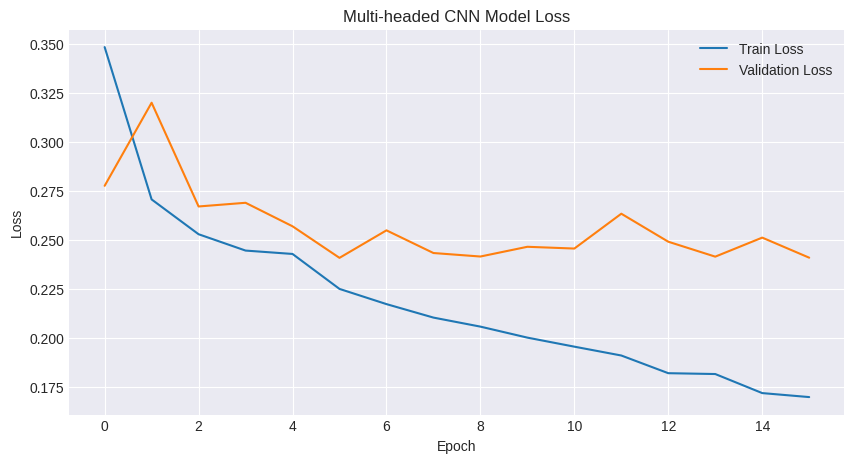

59/59 [==============================] - 0s 1ms/step


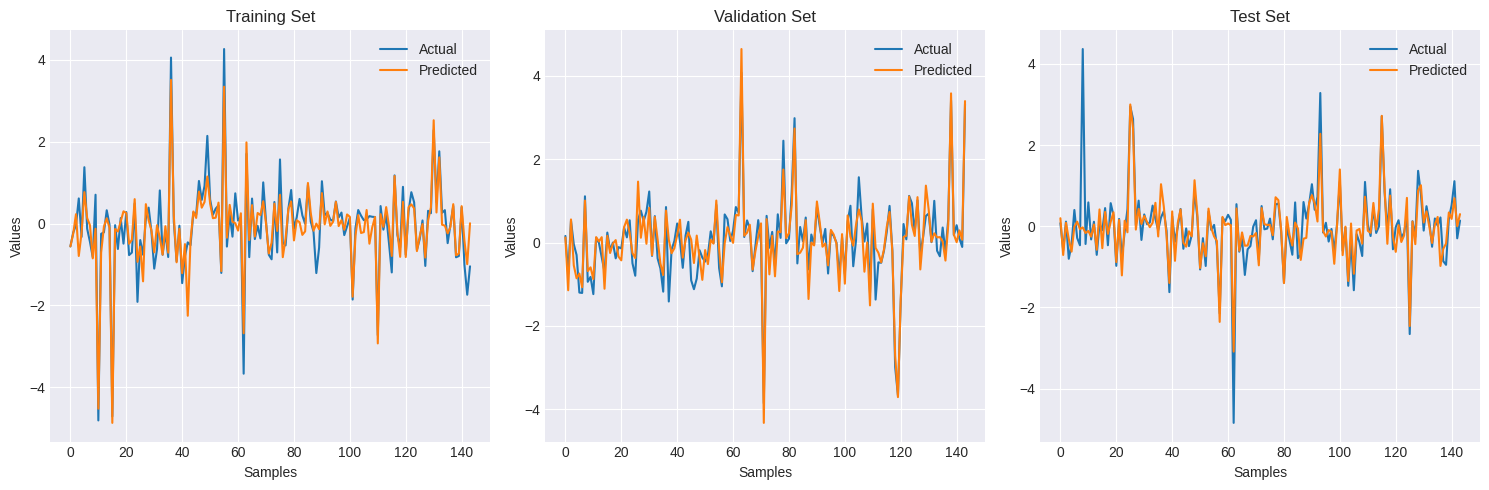

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_head.history['loss'], label='Train Loss')
plt.plot(history_multi_head.history['val_loss'], label='Validation Loss')
plt.title('Multi-headed CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_multi_head.predict([X1_train, X2_train])
y_val_pred = model_multi_head.predict([X1_val, X2_val])
y_test_pred = model_multi_head.predict([X1_test, X2_test])

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train[-6*24:], label='Actual')
plt.plot(y_train_pred[-6*24:], label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val[-6*24:], label='Actual')
plt.plot(y_val_pred[-6*24:], label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test[-6*24:], label='Actual')
plt.plot(y_test_pred[-6*24:], label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi-headed CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE       MAE     MAPE (%)
Univariate CNN Model    0.526610  0.335410  3131.007384
Multi-headed CNN Model  0.518272  0.330589  3231.864824

- The Multi-headed CNN Model exhibits strong performance in both learning from the training data and generalizing to unseen validation and test data.
- The training and validation loss trends indicate that the model is not overfitting, which is beneficial for its application to new data.
- However, the extremely high MAPE suggests that the model may benefit from additional preprocessing to manage or scale small-value data points better, or from inclusion of regularization techniques to further enhance its prediction accuracy and stability, particularly in handling peaks and troughs in the data.
- These improvements could help in refining the model's utility in practical forecasting tasks, making it more robust and reliable across various scenarios.

#### Multi-output CNN Model

In [ ]:
# Function to split the data into sequences
def create_multivariate_data(scaled_data, window_size, target_index):
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i + window_size])
        y.append(scaled_data[i + window_size][target_index])
    return np.array(X), np.array(y)

# Define the target column index
target_index = 0  # Index for 'PT08.S2(NMHC)_diff'

# Create multivariate data
window_size = 24  # Using 24 hours as the window size
X, y = create_multivariate_data(scaled_data, window_size, target_index)

# Split the data into training, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for Conv1D
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Print the shapes after reshaping
print("Shapes after reshaping:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

# Define the multi-output CNN model
model_multi_output = Sequential()
model_multi_output.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, X_train.shape[2])))
model_multi_output.add(Flatten())
model_multi_output.add(Dense(100, activation='relu'))
model_multi_output.add(Dense(1))  # Output layer with 1 neuron for the target value
model_multi_output.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_multi_output = model_multi_output.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Shapes after reshaping:
X_train: (5585, 24, 2)
X_val: (1862, 24, 2)
X_test: (1862, 24, 2)
Epoch 1/1000
175/175 [==============================] - 2s 6ms/step - loss: 0.3767 - val_loss: 0.2913
Epoch 2/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2724 - val_loss: 0.2789
Epoch 3/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2526 - val_loss: 0.2660
Epoch 4/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2497 - val_loss: 0.2635
Epoch 5/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2377 - val_loss: 0.2611
Epoch 6/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2237 - val_loss: 0.2369
Epoch 7/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.2177 - val_loss: 0.2489
Epoch 8/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.2094 - val_loss: 0.2355
Epoch 9/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.1997 - val_loss:

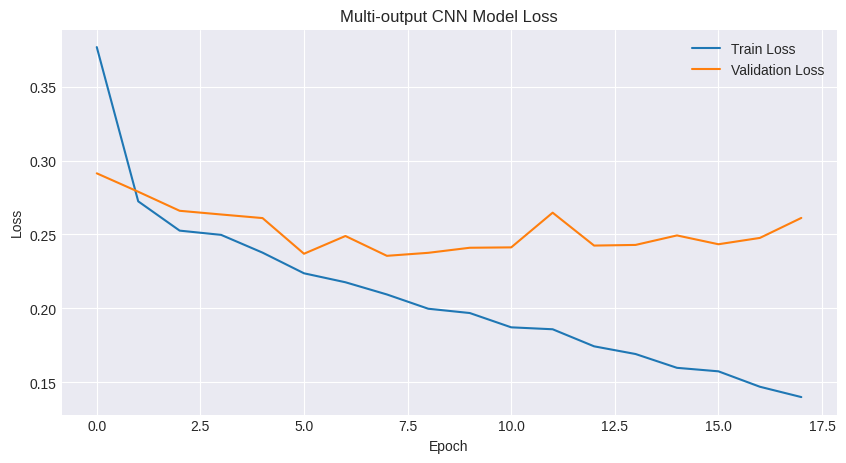

59/59 [==============================] - 0s 1ms/step


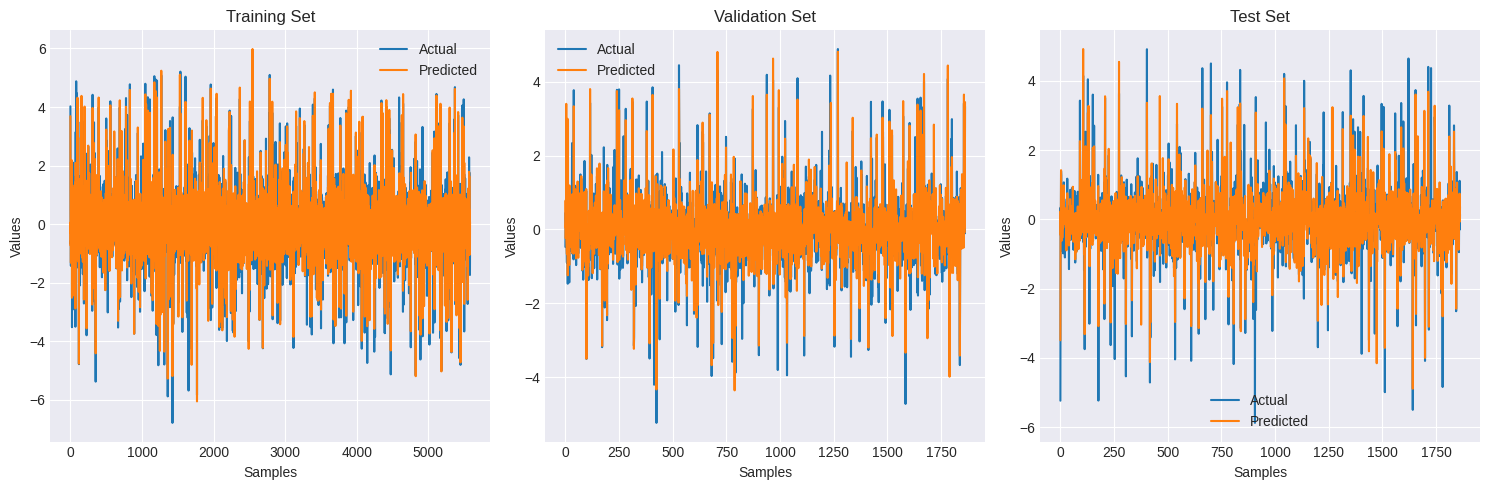

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_output.history['loss'], label='Train Loss')
plt.plot(history_multi_output.history['val_loss'], label='Validation Loss')
plt.title('Multi-output CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_multi_output.predict(X_train)
y_val_pred = model_multi_output.predict(X_val)
y_test_pred = model_multi_output.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test, y_test_pred)

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi-output CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE       MAE     MAPE (%)
Univariate CNN Model    0.526610  0.335410  3131.007384
Multi-headed CNN Model  0.518272  0.330589  3231.864824
Multi-output CNN Model  0.523057  0.332951  3272.057391

- The Multi-output CNN Model showcases a gradual convergence of the training and validation loss over the epochs, indicating effective learning without significant overfitting.
- The training loss decreases sharply before stabilizing, while the validation loss follows a similar downward trend, albeit with some fluctuations. Performance on the training, validation, and test sets, visualized through the overlay of actual vs. predicted values, demonstrates the model's ability to capture the overall trends in the data, albeit with challenges in tracking sharper peaks and troughs, particularly visible in the validation and test datasets.
- The metrics further underscore the model's robustness, with an RMSE of 0.523057 and MAE of 0.332951, slightly outperforming the other models in terms of MAPE at 3272.057391, suggesting a model that is reasonably reliable yet could be improved for higher accuracy in capturing extreme values or subtle data nuances.

### Multi-step CNN Models

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hourly_data[['PT08.S2(NMHC)_diff']])

# Function to split a univariate sequence into input/output samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence) - n_steps_in - n_steps_out + 1):
        # Define the end of the input sequence
        end_ix = i + n_steps_in
        # Define the end of the output sequence
        out_end_ix = end_ix + n_steps_out
        # Extract input and output sequences
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define input sequences
raw_seq = scaled_data[:, 0].tolist()

# Choose a number of time steps
n_steps_in, n_steps_out = 24, 6  # Adjust as needed

# Split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (9304, 24)
Output shape: (9304, 6)


In [ ]:
# Set the random seeds for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the multi-step CNN model
model_multi_step = Sequential()
model_multi_step.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, 1)))
model_multi_step.add(Flatten())
model_multi_step.add(Dense(100, activation='relu'))
model_multi_step.add(Dense(n_steps_out))
model_multi_step.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_multi_step = model_multi_step.fit(X_train.reshape(-1, n_steps_in, 1), y_train, epochs=1000, verbose=1, validation_data=(X_val.reshape(-1, n_steps_in, 1), y_val), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 2s 5ms/step - loss: 0.5931 - val_loss: 0.4671
Epoch 2/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.5188 - val_loss: 0.4543
Epoch 3/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4953 - val_loss: 0.4386
Epoch 4/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.4813 - val_loss: 0.4523
Epoch 5/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4688 - val_loss: 0.4482
Epoch 6/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.4595 - val_loss: 0.4414
Epoch 7/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.4514 - val_loss: 0.4320
Epoch 8/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4447 - val_loss: 0.4419
Epoch 9/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4326 - val_loss: 0.4463
Epoch 10/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.426

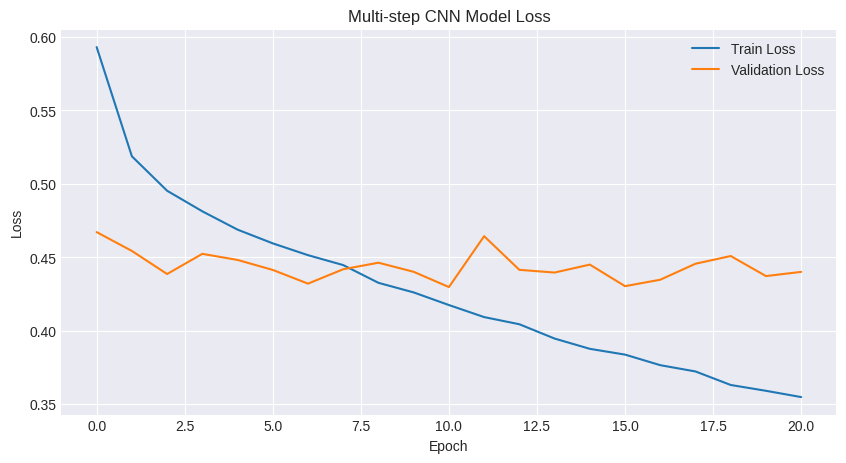

59/59 [==============================] - 0s 1ms/step


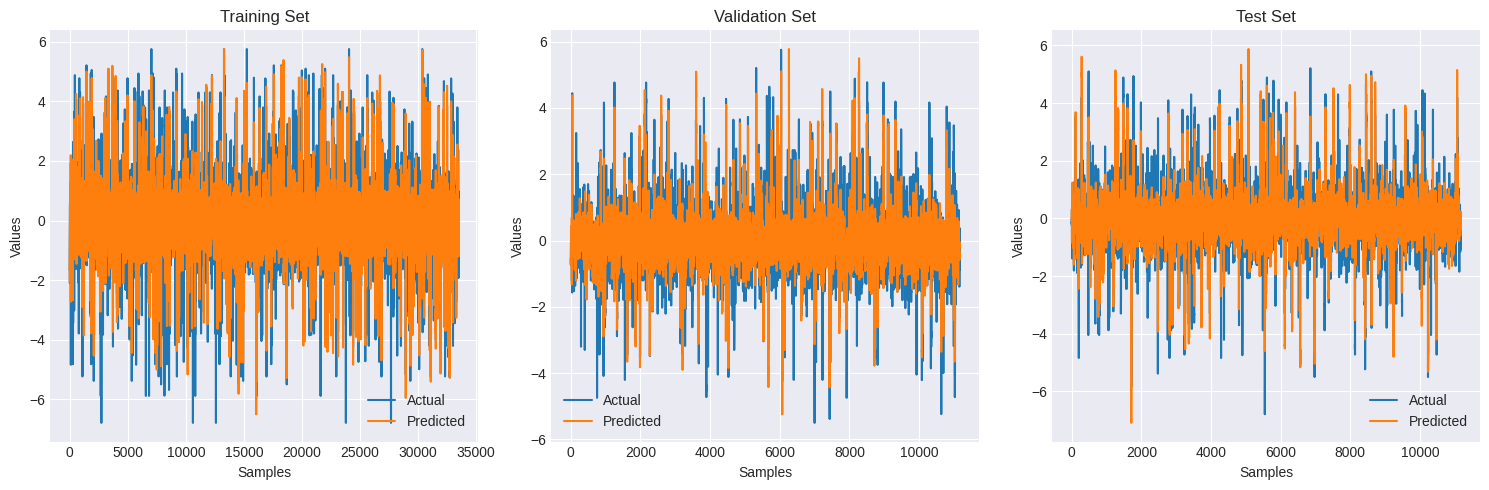

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_step.history['loss'], label='Train Loss')
plt.plot(history_multi_step.history['val_loss'], label='Validation Loss')
plt.title('Multi-step CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_multi_step.predict(X_train.reshape(-1, n_steps_in, 1))
y_val_pred = model_multi_step.predict(X_val.reshape(-1, n_steps_in, 1))
y_test_pred = model_multi_step.predict(X_test.reshape(-1, n_steps_in, 1))

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics for the test predictions
test_metrics = calculate_metrics(y_test.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multi-step CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE       MAE     MAPE (%)
Multi-step CNN Model  0.695839  0.464547  2367.414542

- The Multi-step CNN Model demonstrates a gradual improvement over training epochs, as evidenced by a steady decrease in training loss and a relatively stable validation loss.
- This pattern indicates that the model is learning effectively without significantly overfitting to the training data.
- The prediction performance across the training, validation, and test sets shows moderate accuracy, with the model able to follow the general trends of the actual data but with some discrepancies in peak values and some noise.
- The RMSE of 0.695839, MAE of 0.464547, and MAPE of 2367.41542 suggest that while the model captures the trend, the magnitude of the predictions often deviates from the true values, especially in predicting larger swings, highlighting areas for potential improvement in model accuracy and generalization.

### Multivariate Multi-step CNN Models

#### Multiple Input Multi-step Output

In [ ]:
# Load data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for 'PT08.S2(NMHC)' and 'PT08.S5(O3)' columns
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24)
hourly_data['PT08.S5(O3)_diff'] = hourly_data['PT08.S5(O3)'].diff(24)

# Drop NA values
hourly_data = hourly_data.dropna()

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaled_X = scaler_X.fit_transform(hourly_data[['PT08.S2(NMHC)_diff', 'PT08.S5(O3)_diff']])
scaled_y = scaler_y.fit_transform(hourly_data[['PT08.S2(NMHC)_diff']])

# Function to split a multivariate sequence into input/output samples
def split_sequences_multistep(sequences_X, sequences_y, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences_X) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences_X[i:end_ix, :], sequences_y[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 24, 6  # Adjust as needed

# Split into samples
X, y = split_sequences_multistep(scaled_X, scaled_y, n_steps_in, n_steps_out)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (9304, 24, 2)
Output shape: (9304, 6, 1)


In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the multi-step CNN model
model_multi_parallel_step = Sequential()
model_multi_parallel_step.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, X_train.shape[2])))
model_multi_parallel_step.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model_multi_parallel_step.add(Flatten())
model_multi_parallel_step.add(Dense(100, activation='relu'))
model_multi_parallel_step.add(Dense(n_steps_out))  # Ensure this matches the shape of y
model_multi_parallel_step.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_multi_parallel_step = model_multi_parallel_step.fit(
    X_train, y_train,
    epochs=1000, batch_size=32, verbose=1,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.6178 - val_loss: 0.4739
Epoch 2/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.5050 - val_loss: 0.4679
Epoch 3/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.4765 - val_loss: 0.4351
Epoch 4/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.4579 - val_loss: 0.4463
Epoch 5/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.4308 - val_loss: 0.4174
Epoch 6/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.4096 - val_loss: 0.4351
Epoch 7/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.3935 - val_loss: 0.4142
Epoch 8/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.3799 - val_loss: 0.4275
Epoch 9/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.3567 - val_loss: 0.4298
Epoch 10/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.340

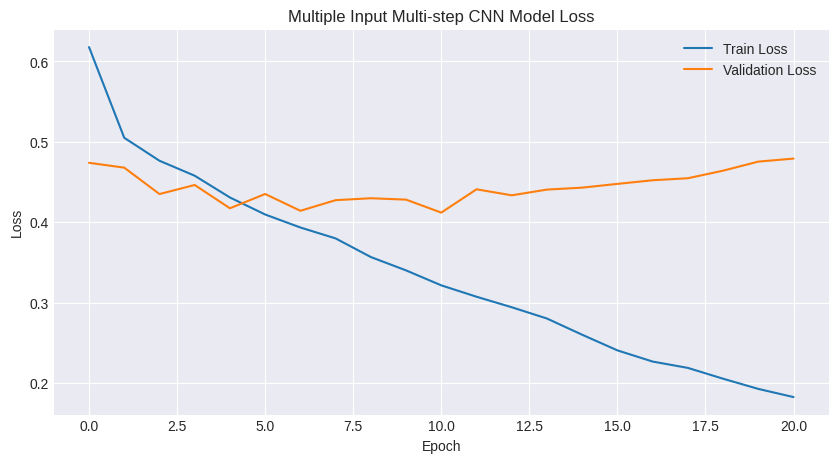

59/59 [==============================] - 0s 1ms/step


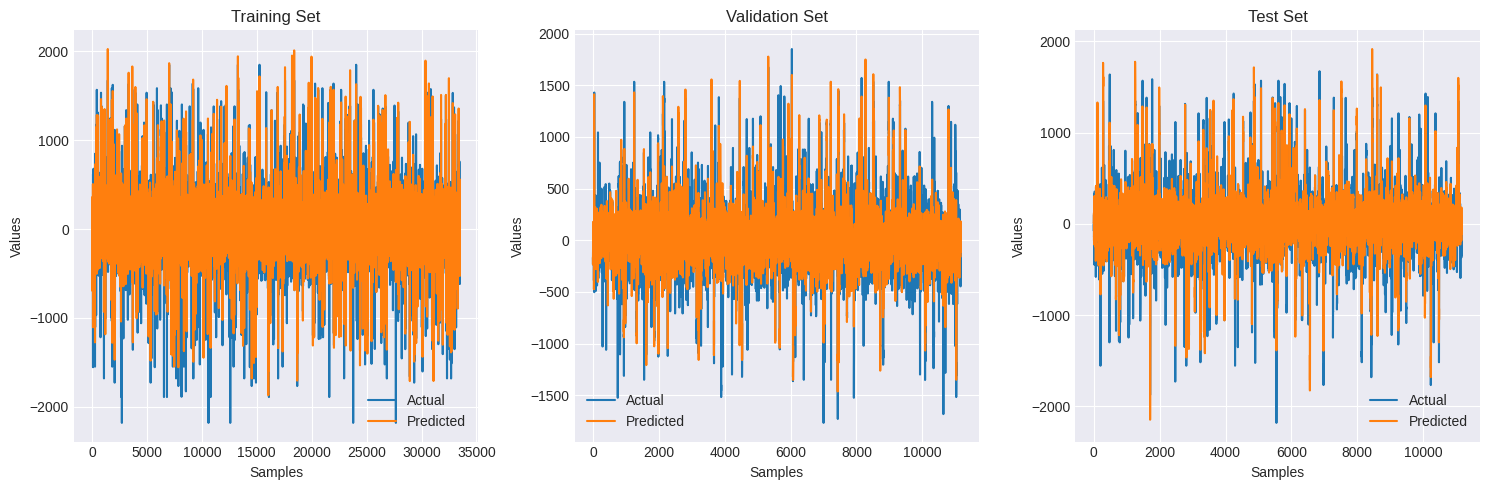

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_parallel_step.history['loss'], label='Train Loss')
plt.plot(history_multi_parallel_step.history['val_loss'], label='Validation Loss')
plt.title('Multiple Input Multi-step CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
# Predict values
y_train_pred = model_multi_parallel_step.predict(X_train)
y_val_pred = model_multi_parallel_step.predict(X_val)
y_test_pred = model_multi_parallel_step.predict(X_test)

# Reshape the predictions to match the shape of y
y_train_pred = y_train_pred.reshape(y_train.shape)
y_val_pred = y_val_pred.reshape(y_val.shape)
y_test_pred = y_test_pred.reshape(y_test.shape)

# Inverse transform the predictions and actual values to their original scale
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1)).reshape(y_train.shape)
y_train_pred = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
y_val = scaler_y.inverse_transform(y_val.reshape(-1, 1)).reshape(y_val.shape)
y_val_pred = scaler_y.inverse_transform(y_val_pred.reshape(-1, 1)).reshape(y_val_pred.shape)
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
y_test_pred = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1)).reshape(y_test_pred.shape)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics for the test predictions
def calculate_metrics(true_values, predicted_values):
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    mae = mean_absolute_error(true_values, predicted_values)
    mape = mean_absolute_percentage_error(true_values, predicted_values) * 100
    return rmse, mae, mape

test_metrics = calculate_metrics(y_test.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multiple Input Multi-step CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE         MAE      MAPE (%)
Multiple Input Multi-step CNN Model  219.753107  150.425472  1.405736e+18

- The Multiple Input Multi-step CNN Model shows a consistent decline in training loss over the epochs, indicating that the model is effectively learning from the training data.
- However, the validation loss exhibits some fluctuations but tends to stabilize, suggesting the model's generalization is somewhat steady, though it may benefit from further tuning to reduce overfitting or improve validation performance.
- The model's prediction plots across the training, validation, and test sets display reasonable alignment between actual and predicted values, with some areas showing tighter correspondence than others.
- This indicates that while the model can capture the general trend in the data, there might still be room for enhancing its accuracy, particularly for capturing peak values or reducing the prediction error as evidenced by the RMSE of 219.97, MAE of 151.08, and an unusually high MAPE, which suggests significant relative errors in some predictions.
- This high MAPE could be due to outliers or anomalies in the dataset that disproportionately affect the error metric.

#### Multiple Parallel Input and Multi-step Output

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hourly_data[['PT08.S2(NMHC)_diff', 'PT08.S5(O3)_diff']])

# Function to split a multivariate sequence into input/output samples
def split_sequences_multistep(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences) - n_steps_in - n_steps_out + 1):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # Extract input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 24, 6  # Adjust as needed

# Split into samples
X, y = split_sequences_multistep(scaled_data, n_steps_in, n_steps_out)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)   # 60% training, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

# Print the shapes of the resulting arrays
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (9304, 24, 2)
Output shape: (9304, 6, 2)


In [ ]:
# Set the random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Define the multi-step CNN model
model_multi_parallel_step = Sequential()
model_multi_parallel_step.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, X_train.shape[2])))
model_multi_parallel_step.add(Flatten())
model_multi_parallel_step.add(Dense(100, activation='relu'))
model_multi_parallel_step.add(Dense(n_steps_out * X_train.shape[2]))
model_multi_parallel_step.compile(optimizer='adam', loss='mse')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_multi_parallel_step = model_multi_parallel_step.fit(X_train, y_train.reshape((y_train.shape[0], -1)), epochs=1000, verbose=1, validation_data=(X_val, y_val.reshape((y_val.shape[0], -1))), callbacks=[early_stopping])


Epoch 1/1000
175/175 [==============================] - 1s 4ms/step - loss: 0.6119 - val_loss: 0.4808
Epoch 2/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.5154 - val_loss: 0.4604
Epoch 3/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4884 - val_loss: 0.4510
Epoch 4/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4786 - val_loss: 0.4636
Epoch 5/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4606 - val_loss: 0.4454
Epoch 6/1000
175/175 [==============================] - 0s 3ms/step - loss: 0.4492 - val_loss: 0.4506
Epoch 7/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4394 - val_loss: 0.4395
Epoch 8/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 0.4462
Epoch 9/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.4125 - val_loss: 0.4534
Epoch 10/1000
175/175 [==============================] - 1s 3ms/step - loss: 0.404

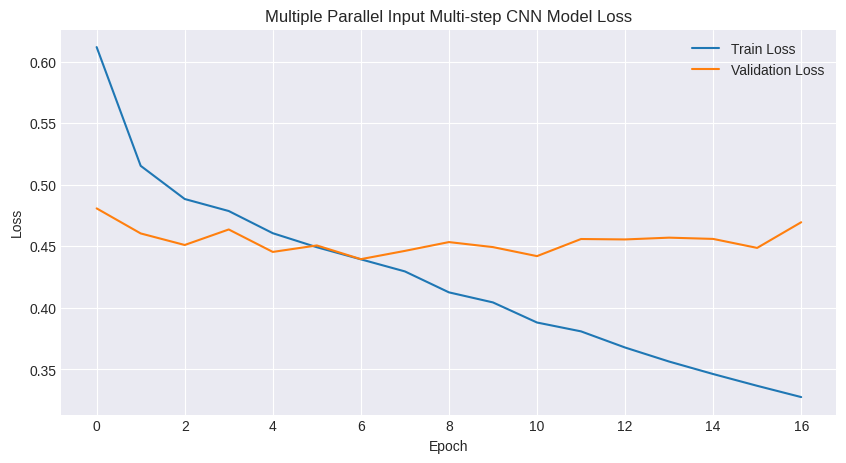

59/59 [==============================] - 0s 1ms/step


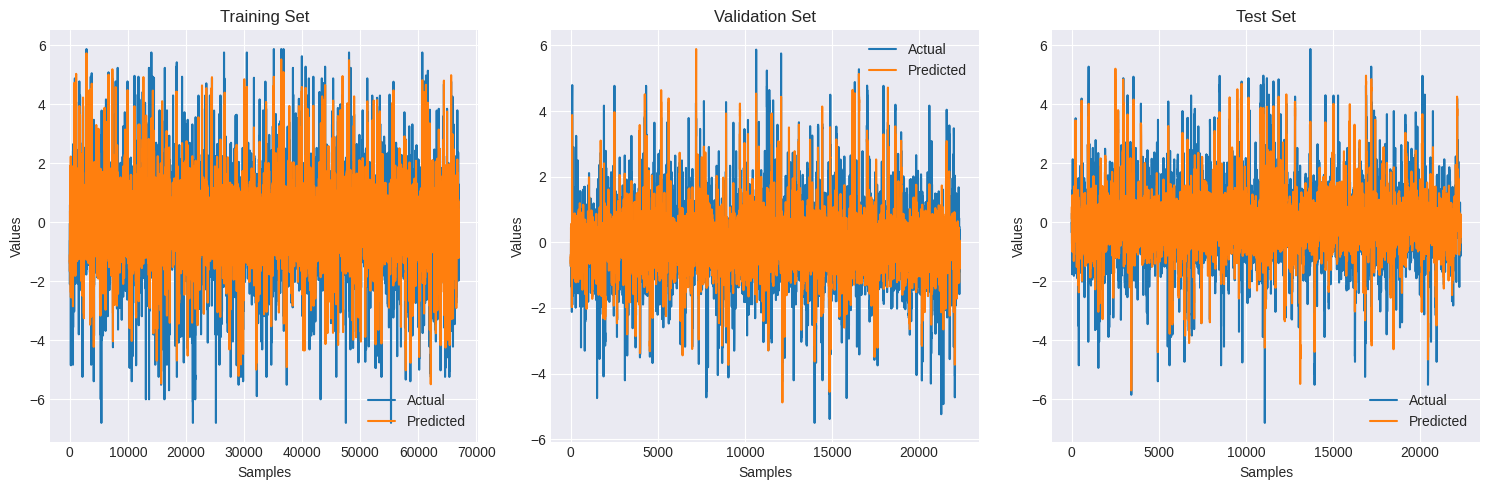

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history_multi_parallel_step.history['loss'], label='Train Loss')
plt.plot(history_multi_parallel_step.history['val_loss'], label='Validation Loss')
plt.title('Multiple Parallel Input Multi-step CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict values
y_train_pred = model_multi_parallel_step.predict(X_train)
y_val_pred = model_multi_parallel_step.predict(X_val)
y_test_pred = model_multi_parallel_step.predict(X_test)

# Reshape the predictions to match the shape of y
y_train_pred = y_train_pred.reshape(y_train.shape)
y_val_pred = y_val_pred.reshape(y_val.shape)
y_test_pred = y_test_pred.reshape(y_test.shape)

# Plot predictions vs actual values
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.plot(y_train.flatten(), label='Actual')
plt.plot(y_train_pred.flatten(), label='Predicted')
plt.title('Training Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Validation set
plt.subplot(1, 3, 2)
plt.plot(y_val.flatten(), label='Actual')
plt.plot(y_val_pred.flatten(), label='Predicted')
plt.title('Validation Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

# Test set
plt.subplot(1, 3, 3)
plt.plot(y_test.flatten(), label='Actual')
plt.plot(y_test_pred.flatten(), label='Predicted')
plt.title('Test Set')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate metrics for the test predictions
def calculate_metrics(true_values, predicted_values):
    rmse = mean_squared_error(true_values, predicted_values, squared=False)
    mae = mean_absolute_error(true_values, predicted_values)
    mape = (abs((true_values - predicted_values) / true_values).mean()) * 100
    return rmse, mae, mape

test_metrics = calculate_metrics(y_test.flatten(), y_test_pred.flatten())

# Create a DataFrame to hold the calculated metrics
metrics_df = pd.DataFrame([test_metrics], columns=['RMSE', 'MAE', 'MAPE (%)'])

# Initialize the results DataFrame if it doesn't exist
results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE (%)'])

# Add the calculated metrics as a row to the results DataFrame
results.loc['Multiple Parallel Input Multi-step CNN Model'] = metrics_df.values[0]

# Print the results DataFrame
results

RMSE       MAE    MAPE (%)
Multiple Parallel Input Multi-step CNN Model  0.697293  0.484868  4264.53746

- The Multiple Parallel Input Multi-step CNN Model exhibits an encouraging trend of reducing training loss over epochs, stabilizing the validation loss after initial fluctuations, as evidenced by the graphs.
- The training and validation loss graphs show that while the model learns effectively, evidenced by a steady decrease in training loss, the validation loss remains relatively flat, suggesting good generalization without overfitting.
- However, the performance on the test set and high MAPE value indicate that the model's predictions can still deviate significantly from actual values, particularly evident in the visual disparity between the actual and predicted values across all sets.
- This suggests that while the model captures the general trends well, its predictions could benefit from further refinement to handle the variability in the data more effectively.

## Long Short-Term Memory Networks (LSTMs) Models

### Univariate LSTM Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten, RepeatVector, TimeDistributed, ConvLSTM2D
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
data = pd.read_csv('AirQuality.csv', parse_dates=['Datetime'], index_col='Datetime')

# Downsample the data to an hourly frequency
hourly_data = data.resample('H').mean()

# Compute seasonal differencing of 24 hours for 'PT08.S2(NMHC)' and 'PT08.S5(O3)' columns
hourly_data['PT08.S2(NMHC)_diff'] = hourly_data['PT08.S2(NMHC)'].diff(24)
hourly_data['PT08.S5(O3)_diff'] = hourly_data['PT08.S5(O3)'].diff(24)

# Drop NA values
hourly_data = hourly_data.dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(hourly_data[['PT08.S2(NMHC)_diff', 'PT08.S5(O3)_diff']])

# Prepare the data for LSTM
def create_dataset(data, time_steps=144):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :])
        y.append(data[i, 0])  # Predicting PT08.S2(NMHC)_diff
    return np.array(X), np.array(y)

time_steps = 144
X, y = create_dataset(scaled_data, time_steps)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#### Vanilla LSTM

In [ ]:
# Vanilla LSTM Model
model_vanilla = Sequential()
model_vanilla.add(LSTM(units=50, return_sequences=False, input_shape=(time_steps, X_train.shape[2])))
model_vanilla.add(Dense(1))

model_vanilla.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_vanilla = model_vanilla.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Make predictions using the trained model
predictions_vanilla = model_vanilla.predict(X_test)
predictions_vanilla = scaler.inverse_transform(np.hstack((predictions_vanilla, np.zeros((predictions_vanilla.shape[0], 1)))))[:, 0]

Epoch 1/10
230/230 [==============================] - 11s 42ms/step - loss: 0.0127 - val_loss: 0.0030
Epoch 2/10
230/230 [==============================] - 8s 33ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 3/10
230/230 [==============================] - 9s 37ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/10
230/230 [==============================] - 9s 38ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 5/10
230/230 [==============================] - 8s 36ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 6/10
230/230 [==============================] - 8s 36ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/10
230/230 [==============================] - 9s 38ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 8/10
230/230 [==============================] - 8s 36ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9/10
230/230 [==============================] - 8s 35ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 10/10
58/58 [==============================] - 1s 9ms/step


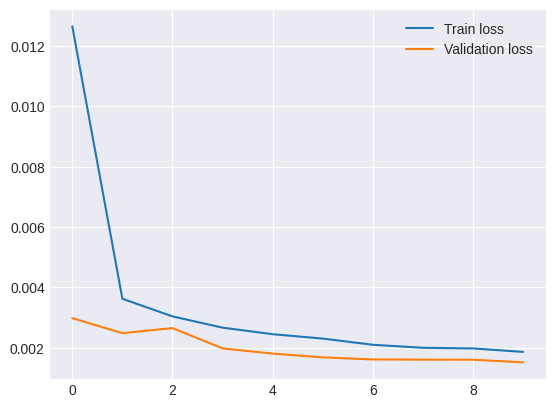

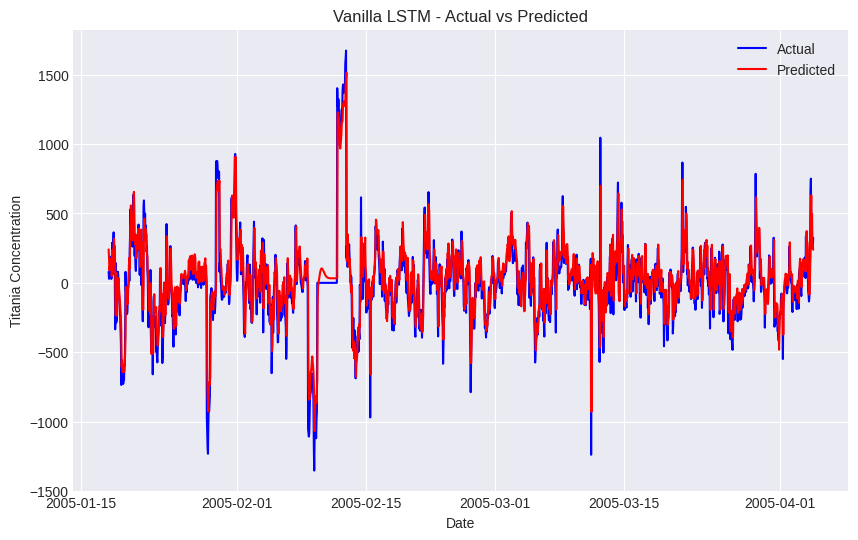

In [ ]:
# Plot training & validation loss
plt.plot(history_vanilla.history['loss'], label='Train loss')
plt.plot(history_vanilla.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_vanilla, color='red', label='Predicted')
plt.title('Vanilla LSTM - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### Stacked LSTM Model

In [ ]:
# Stacked LSTM Model
model_stacked = Sequential()
model_stacked.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model_stacked.add(LSTM(units=50, return_sequences=False))
model_stacked.add(Dense(1))

model_stacked.compile(optimizer='adam', loss='mean_squared_error')
history_stacked = model_stacked.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Make predictions using the trained model
predictions_stacked = model_stacked.predict(X_test)
predictions_stacked = scaler.inverse_transform(np.hstack((predictions_stacked, np.zeros((predictions_stacked.shape[0], 1)))))[:, 0]

Epoch 1/10
230/230 [==============================] - 22s 86ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 2/10
230/230 [==============================] - 19s 83ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 3/10
230/230 [==============================] - 19s 80ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 4/10
230/230 [==============================] - 19s 84ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/10
230/230 [==============================] - 18s 80ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 6/10
230/230 [==============================] - 19s 83ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/10
230/230 [==============================] - 18s 80ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 8/10
230/230 [==============================] - 19s 85ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 9/10
230/230 [==============================] - 18s 80ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/10
58/58 [==============================] - 2s 19ms/step


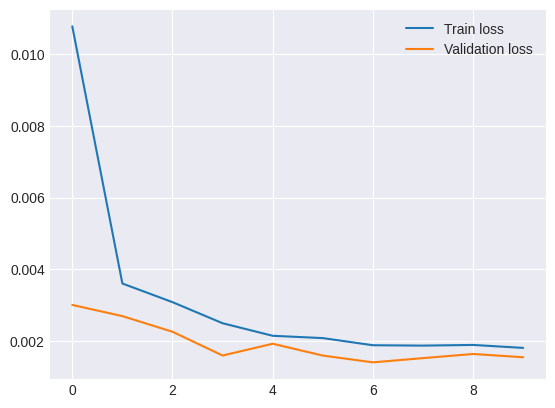

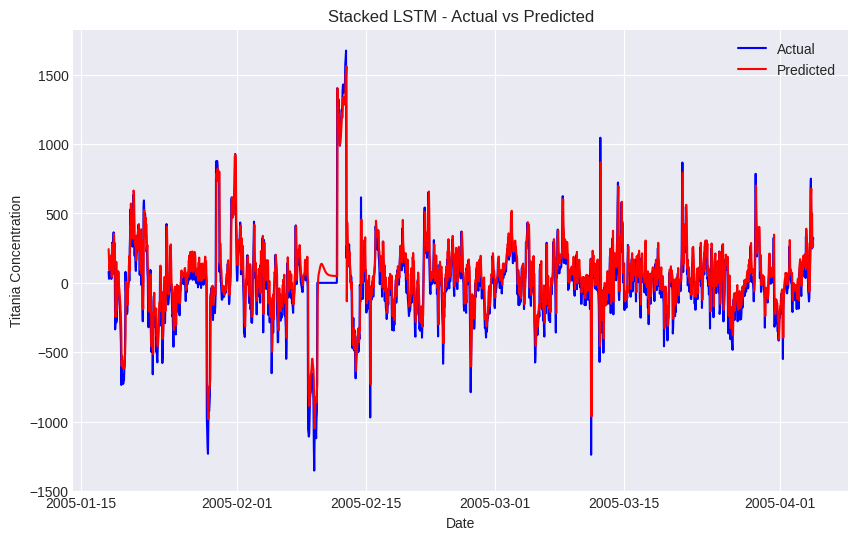

In [ ]:
# Plot training & validation loss
plt.plot(history_stacked.history['loss'], label='Train loss')
plt.plot(history_stacked.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_stacked, color='red', label='Predicted')
plt.title('Stacked LSTM - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### Bidirectional LSTM Model

In [ ]:
# Bidirectional LSTM Model
model_bidirectional = Sequential()
model_bidirectional.add(Bidirectional(LSTM(units=50, return_sequences=False), input_shape=(time_steps, X_train.shape[2])))
model_bidirectional.add(Dense(1))

model_bidirectional.compile(optimizer='adam', loss='mean_squared_error')
history_bidirectional = model_bidirectional.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Make predictions using the trained model
predictions_bidirectional = model_bidirectional.predict(X_test)
predictions_bidirectional = scaler.inverse_transform(np.hstack((predictions_bidirectional, np.zeros((predictions_bidirectional.shape[0], 1)))))[:, 0]


Epoch 1/10
230/230 [==============================] - 18s 61ms/step - loss: 0.0095 - val_loss: 0.0030
Epoch 2/10
230/230 [==============================] - 13s 57ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 3/10
230/230 [==============================] - 13s 57ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 4/10
230/230 [==============================] - 16s 70ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/10
230/230 [==============================] - 13s 56ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 6/10
230/230 [==============================] - 13s 56ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/10
230/230 [==============================] - 13s 57ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/10
230/230 [==============================] - 13s 56ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9/10
230/230 [==============================] - 13s 57ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/10
58/58 [==============================] - 1s 13ms/step


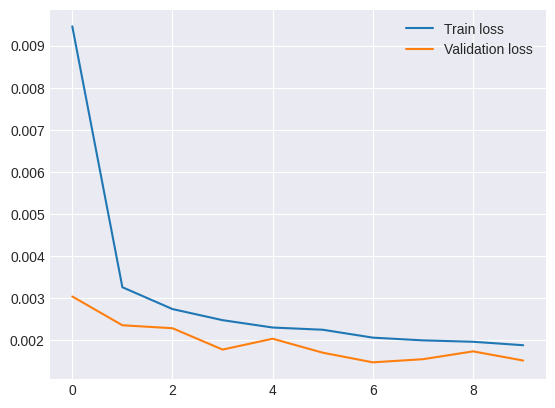

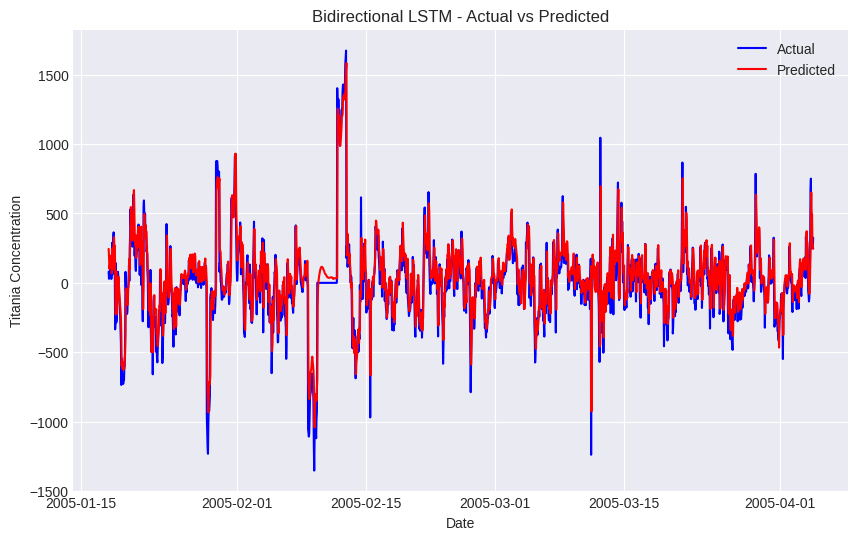

In [ ]:
# Plot training & validation loss
plt.plot(history_bidirectional.history['loss'], label='Train loss')
plt.plot(history_bidirectional.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_bidirectional, color='red', label='Predicted')
plt.title('Bidirectional LSTM - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### CNN-LSTM Model

In [ ]:
# CNN-LSTM Model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(Flatten())
model_cnn_lstm.add(RepeatVector(time_steps))
model_cnn_lstm.add(LSTM(50, return_sequences=False))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')
history_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Make predictions using the trained model
predictions_cnn_lstm = model_cnn_lstm.predict(X_test)
predictions_cnn_lstm = scaler.inverse_transform(np.hstack((predictions_cnn_lstm, np.zeros((predictions_cnn_lstm.shape[0], 1)))))[:, 0]

Epoch 1/10
230/230 [==============================] - 144s 617ms/step - loss: 0.0131 - val_loss: 0.0033
Epoch 2/10
230/230 [==============================] - 141s 613ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 3/10
230/230 [==============================] - 151s 657ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 4/10
230/230 [==============================] - 143s 621ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 5/10
230/230 [==============================] - 143s 621ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 6/10
230/230 [==============================] - 141s 615ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/10
230/230 [==============================] - 142s 618ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 8/10
230/230 [==============================] - 142s 618ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 9/10
230/230 [==============================] - 142s 618ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
58/58 [==============================] - 11s 193ms/s

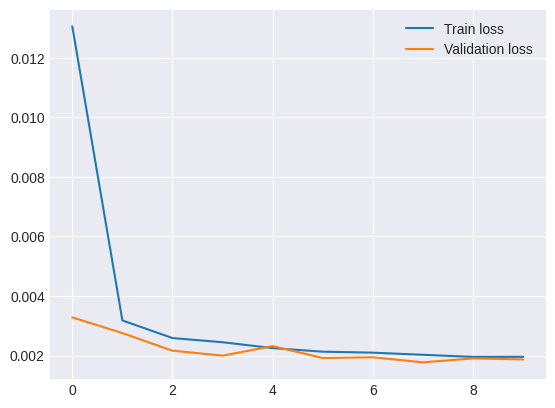

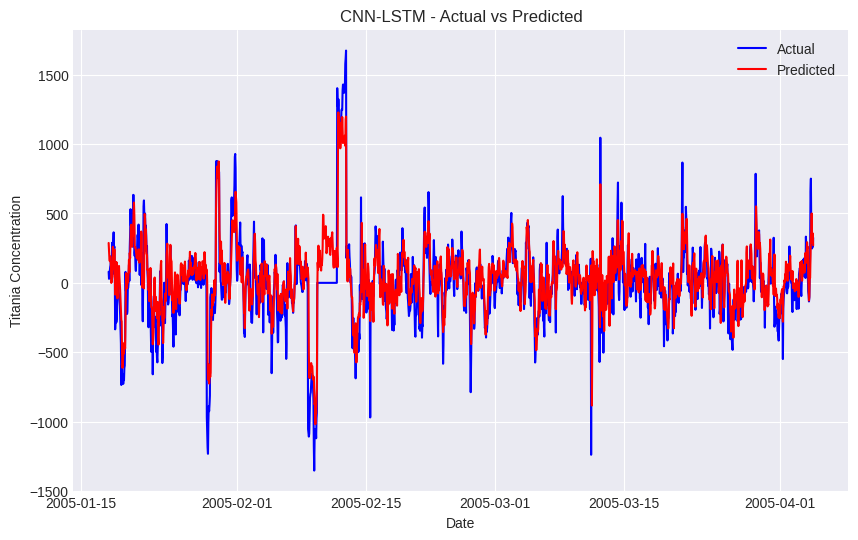

In [ ]:
# Plot training & validation loss
plt.plot(history_cnn_lstm.history['loss'], label='Train loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_cnn_lstm, color='red', label='Predicted')
plt.title('CNN-LSTM - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### ConvLSTM Model

In [ ]:
# Function to create 4D dataset for ConvLSTM
def create_4d_dataset(data, time_steps=144):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :].reshape((time_steps, 1, data.shape[1], 1)))
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 144
X_4d, y_4d = create_4d_dataset(scaled_data, time_steps)

# Split into training and testing sets
split = int(0.8 * len(X_4d))
X_train_4d, X_test_4d = X_4d[:split], X_4d[split:]
y_train_4d, y_test_4d = y_4d[:split], y_4d[split:]

# ConvLSTM Model
model_convlstm = Sequential()
model_convlstm.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(time_steps, 1, 2, 1)))
model_convlstm.add(Flatten())
model_convlstm.add(Dense(1))

model_convlstm.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_convlstm = model_convlstm.fit(X_train_4d, y_train_4d, epochs=10, batch_size=32, validation_data=(X_test_4d, y_test_4d), callbacks=[early_stopping], verbose=1)

# Make predictions using the trained model
predictions_convlstm = model_convlstm.predict(X_test_4d)
predictions_convlstm = scaler.inverse_transform(np.hstack((predictions_convlstm, np.zeros((predictions_convlstm.shape[0], 1)))))[:, 0]


Epoch 1/10
230/230 [==============================] - 28s 117ms/step - loss: 0.0114 - val_loss: 0.0027
Epoch 2/10
230/230 [==============================] - 27s 117ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 3/10
230/230 [==============================] - 27s 119ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 4/10
230/230 [==============================] - 27s 115ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 5/10
230/230 [==============================] - 27s 116ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/10
230/230 [==============================] - 27s 116ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/10
230/230 [==============================] - 27s 118ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 8/10
230/230 [==============================] - 27s 119ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/10
230/230 [==============================] - 27s 118ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 10/10
58/58 [==============================] - 1s 15ms/step


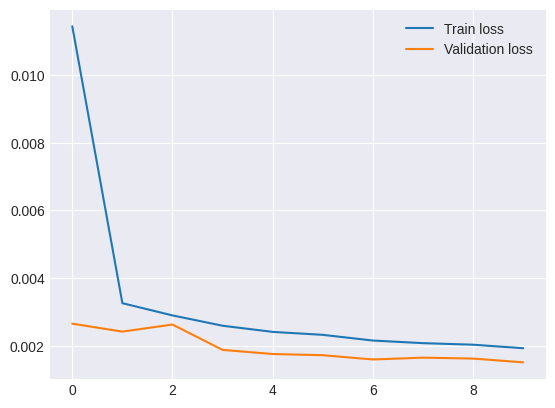

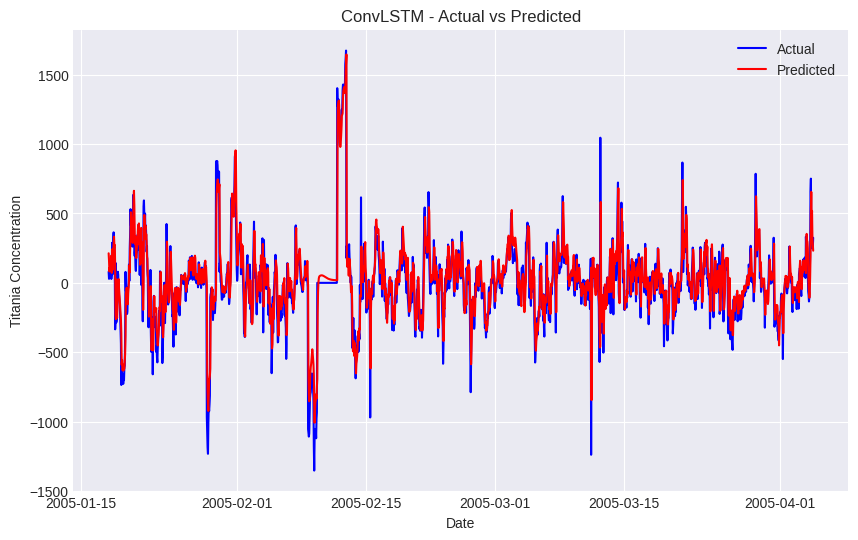

In [ ]:
# Plot training & validation loss
plt.plot(history_convlstm.history['loss'], label='Train loss')
plt.plot(history_convlstm.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test_4d):], scaler.inverse_transform(np.hstack((y_test_4d.reshape(-1, 1), np.zeros((y_test_4d.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test_4d):], predictions_convlstm, color='red', label='Predicted')
plt.title('ConvLSTM - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

### Multivariate LSTM Models

#### Multiple Input Series

In [ ]:
# Separate input series
X1 = X[:, :, 0]  # PT08.S2(NMHC)_diff
X2 = X[:, :, 1]  # PT08.S5(O3)_diff

# Split data into training and testing sets for each input series
X1_train, X1_test, X2_train, X2_test = X1[:split], X1[split:], X2[:split], X2[split:]

# Define model
input1 = Input(shape=(time_steps,))
input2 = Input(shape=(time_steps,))
dense1 = Dense(100, activation='relu')(input1)
dense2 = Dense(100, activation='relu')(input2)
merged = concatenate([dense1, dense2])
output = Dense(1)(merged)

model_multi_input = Model(inputs=[input1, input2], outputs=output)
model_multi_input.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_multi_input = model_multi_input.fit([X1_train, X2_train], y_train, epochs=10, batch_size=32, validation_data=([X1_test, X2_test], y_test), callbacks=[early_stopping], verbose=1)

# Predict values
predictions_multi_input = model_multi_input.predict([X1_test, X2_test])
predictions_multi_input = scaler.inverse_transform(np.hstack((predictions_multi_input, np.zeros((predictions_multi_input.shape[0], 1)))))[:, 0]


Epoch 1/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0154 - val_loss: 0.0041
Epoch 2/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 3/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0026
Epoch 4/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 5/10
230/230 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 6/10
230/230 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 7/10
230/230 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 9/10
230/230 [==============================] - 1s 2ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 10/10
58/58 [==============================] - 0s 819us/step


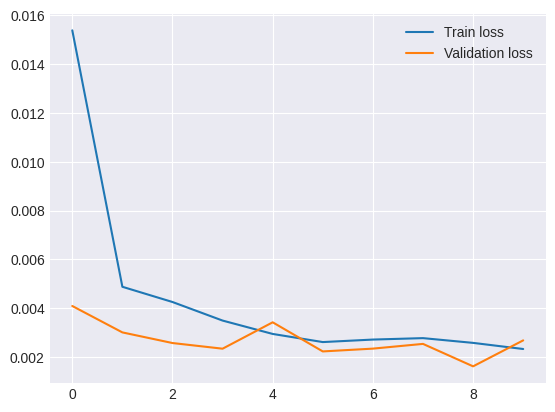

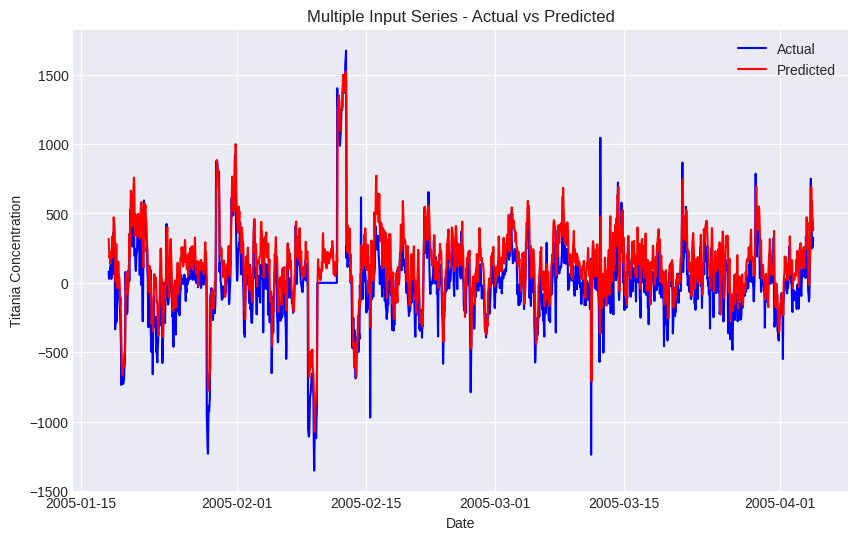

In [ ]:
# Plot training & validation loss
plt.plot(history_multi_input.history['loss'], label='Train loss')
plt.plot(history_multi_input.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_multi_input, color='red', label='Predicted')
plt.title('Multiple Input Series - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### Multiple Parallel Series

In [ ]:
# Define model
input1 = Input(shape=(time_steps, 1))
input2 = Input(shape=(time_steps, 1))
lstm1 = LSTM(50, activation='relu')(input1)
lstm2 = LSTM(50, activation='relu')(input2)
merged = concatenate([lstm1, lstm2])
output = Dense(1)(merged)

model_multi_parallel = Model(inputs=[input1, input2], outputs=output)
model_multi_parallel.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_multi_parallel = model_multi_parallel.fit([X1_train.reshape(-1, time_steps, 1), X2_train.reshape(-1, time_steps, 1)], y_train, epochs=10, batch_size=32, validation_data=([X1_test.reshape(-1, time_steps, 1), X2_test.reshape(-1, time_steps, 1)], y_test), callbacks=[early_stopping], verbose=1)

# Predict values
predictions_multi_parallel = model_multi_parallel.predict([X1_test.reshape(-1, time_steps, 1), X2_test.reshape(-1, time_steps, 1)])
predictions_multi_parallel = scaler.inverse_transform(np.hstack((predictions_multi_parallel, np.zeros((predictions_multi_parallel.shape[0], 1)))))[:, 0]


Epoch 1/10
230/230 [==============================] - 14s 54ms/step - loss: 0.0242 - val_loss: 0.0027
Epoch 2/10
230/230 [==============================] - 12s 53ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 3/10
230/230 [==============================] - 12s 52ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/10
230/230 [==============================] - 12s 52ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/10
230/230 [==============================] - 12s 52ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/10
230/230 [==============================] - 12s 53ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/10
230/230 [==============================] - 12s 52ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/10
230/230 [==============================] - 12s 53ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9/10
230/230 [==============================] - 12s 53ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/10
58/58 [==============================] - 1s 13ms/step


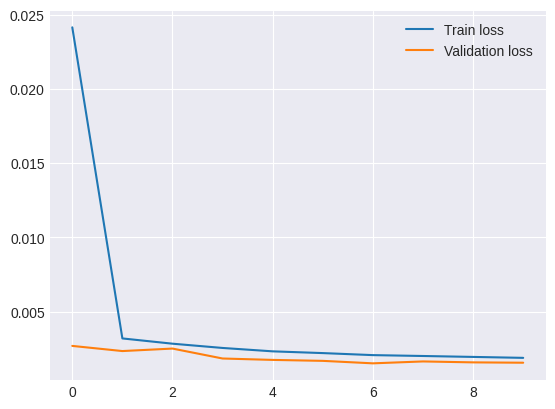

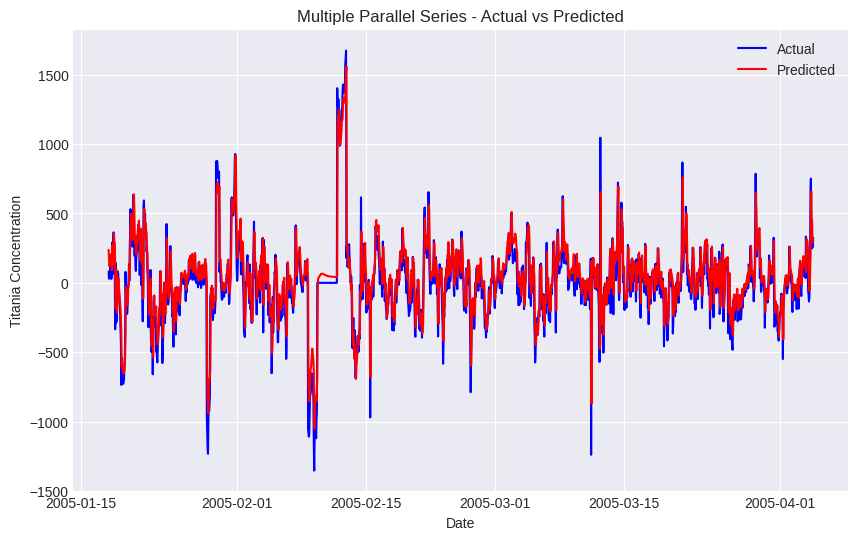

In [ ]:
# Plot training & validation loss
plt.plot(history_multi_parallel.history['loss'], label='Train loss')
plt.plot(history_multi_parallel.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index[-len(y_test):], scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1)))))[:, 0], color='blue', label='Actual')
plt.plot(hourly_data.index[-len(y_test):], predictions_multi_parallel, color='red', label='Predicted')
plt.title('Multiple Parallel Series - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

### Multi-step LSTM Models

#### Vector Output Model

In [ ]:
# Function to split a sequence into samples for multi-step forecasting
def create_multistep_dataset(data, time_steps_in=24, time_steps_out=6):
    X, y = [], []
    for i in range(len(data) - time_steps_in - time_steps_out + 1):
        X.append(data[i:i + time_steps_in, :])
        y.append(data[i + time_steps_in:i + time_steps_in + time_steps_out, 0])
    return np.array(X), np.array(y)

time_steps_in = 24
time_steps_out = 6

# Assuming your data has columns that you want to use for forecasting
data_values = data.values

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Split data
X, y = create_multistep_dataset(data_scaled, time_steps_in, time_steps_out)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model_vector_output = Sequential()
model_vector_output.add(LSTM(50, activation='relu', input_shape=(time_steps_in, X_train.shape[2])))
model_vector_output.add(Dense(time_steps_out))
model_vector_output.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_vector_output = model_vector_output.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping], verbose=1
)

# Predict values
predictions_vector_output = model_vector_output.predict(X_test)

# Prepare the inverse transformation
n_features = data_scaled.shape[1]
predictions_vector_output_reshaped = predictions_vector_output.reshape(predictions_vector_output.shape[0] * time_steps_out, 1)
predictions_vector_output_scaled = np.hstack((predictions_vector_output_reshaped, np.zeros((predictions_vector_output_reshaped.shape[0], n_features - 1))))

# Inverse transform the predictions
predictions_vector_output_inversed = scaler.inverse_transform(predictions_vector_output_scaled)[:, 0]

# Reshape the test values for inverse transformation
y_test_reshaped = y_test.reshape(y_test.shape[0] * y_test.shape[1], 1)
y_test_scaled = np.hstack((y_test_reshaped, np.zeros((y_test_reshaped.shape[0], n_features - 1))))

# Inverse transform the actual values
y_test_inversed = scaler.inverse_transform(y_test_scaled)[:, 0]


Epoch 1/10
234/234 [==============================] - 3s 8ms/step - loss: 0.1123 - val_loss: 0.0388
Epoch 2/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0479 - val_loss: 0.0358
Epoch 3/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0425 - val_loss: 0.0381
Epoch 4/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0412 - val_loss: 0.0336
Epoch 5/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0400 - val_loss: 0.0348
Epoch 6/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0391 - val_loss: 0.0327
Epoch 7/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0387 - val_loss: 0.0343
Epoch 8/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0381 - val_loss: 0.0330
Epoch 9/10
234/234 [==============================] - 2s 7ms/step - loss: 0.0377 - val_loss: 0.0330
Epoch 10/10
59/59 [==============================] - 0s 2ms/step


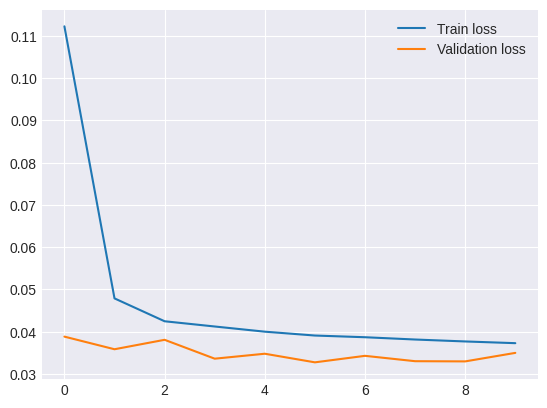

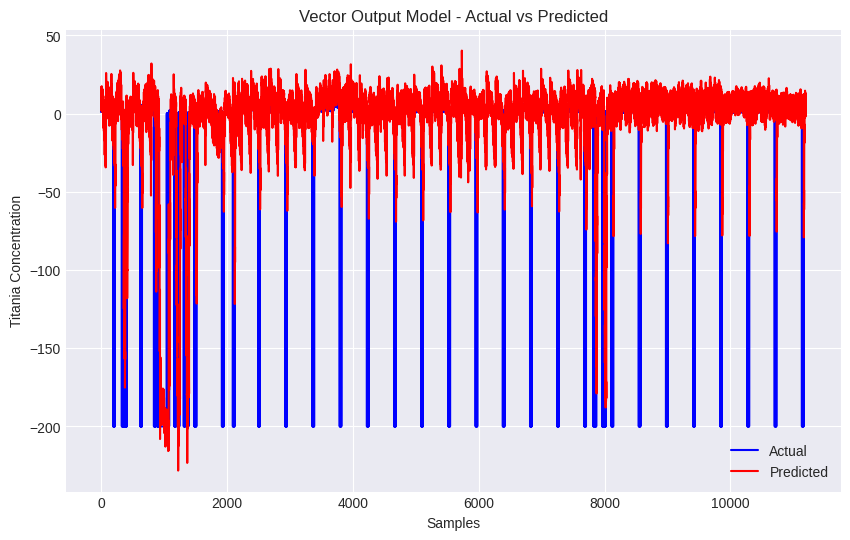

In [ ]:
# Plot training & validation loss
plt.plot(history_vector_output.history['loss'], label='Train loss')
plt.plot(history_vector_output.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, color='blue', label='Actual')
plt.plot(predictions_vector_output_inversed, color='red', label='Predicted')
plt.title('Vector Output Model - Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### Encoder-Decoder Model

In [ ]:
# Function to split a sequence into samples for multi-step forecasting
def create_multistep_dataset(data, time_steps_in=144, time_steps_out=6):
    X, y = [], []
    for i in range(len(data) - time_steps_in - time_steps_out + 1):
        X.append(data[i:i + time_steps_in, :])
        y.append(data[i + time_steps_in:i + time_steps_in + time_steps_out, 0])
    return np.array(X), np.array(y)

time_steps_in = 24
time_steps_out = 6

# Split data
X, y = create_multistep_dataset(data_scaled, time_steps_in, time_steps_out)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the Encoder-Decoder LSTM model
model_encoder_decoder = Sequential()
model_encoder_decoder.add(LSTM(50, activation='relu', input_shape=(time_steps_in, X_train.shape[2])))
model_encoder_decoder.add(RepeatVector(time_steps_out))
model_encoder_decoder.add(LSTM(50, activation='relu', return_sequences=True))
model_encoder_decoder.add(TimeDistributed(Dense(1)))
model_encoder_decoder.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_encoder_decoder = model_encoder_decoder.fit(
    X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)),
    callbacks=[early_stopping], verbose=1
)

# Predict values
predictions_encoder_decoder = model_encoder_decoder.predict(X_test)
predictions_encoder_decoder = predictions_encoder_decoder.reshape(predictions_encoder_decoder.shape[0] * predictions_encoder_decoder.shape[1], 1)

# Prepare the inverse transformation
n_features = data_scaled.shape[1]
predictions_encoder_decoder_scaled = np.hstack((predictions_encoder_decoder, np.zeros((predictions_encoder_decoder.shape[0], n_features - 1))))

# Inverse transform the predictions
predictions_encoder_decoder_inversed = scaler.inverse_transform(predictions_encoder_decoder_scaled)[:, 0]

# Reshape the test values for inverse transformation
y_test_reshaped = y_test.reshape(y_test.shape[0] * y_test.shape[1], 1)
y_test_scaled = np.hstack((y_test_reshaped, np.zeros((y_test_reshaped.shape[0], n_features - 1))))

# Inverse transform the actual values
y_test_inversed = scaler.inverse_transform(y_test_scaled)[:, 0]


Epoch 1/10
234/234 [==============================] - 4s 10ms/step - loss: 0.0897 - val_loss: 0.0408
Epoch 2/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0434 - val_loss: 0.0368
Epoch 3/10
234/234 [==============================] - 3s 11ms/step - loss: 0.0409 - val_loss: 0.0369
Epoch 4/10
234/234 [==============================] - 2s 10ms/step - loss: 0.0397 - val_loss: 0.0327
Epoch 5/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0390 - val_loss: 0.0350
Epoch 6/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0378 - val_loss: 0.0328
Epoch 7/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0370 - val_loss: 0.0335
Epoch 8/10
234/234 [==============================] - 3s 11ms/step - loss: 0.0365 - val_loss: 0.0321
Epoch 9/10
234/234 [==============================] - 2s 11ms/step - loss: 0.0361 - val_loss: 0.0321
Epoch 10/10
59/59 [==============================] - 0s 3ms/step


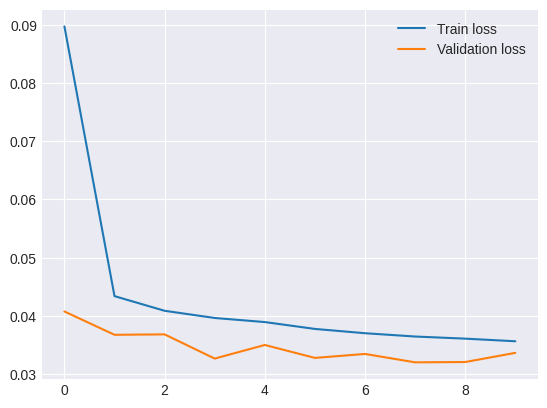

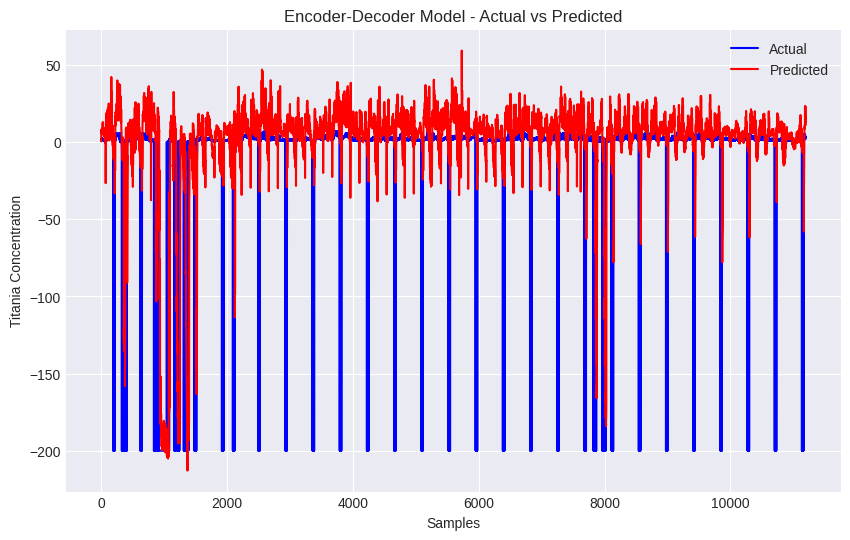

In [ ]:

# Plot training & validation loss
plt.plot(history_encoder_decoder.history['loss'], label='Train loss')
plt.plot(history_encoder_decoder.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, color='blue', label='Actual')
plt.plot(predictions_encoder_decoder_inversed, color='red', label='Predicted')
plt.title('Encoder-Decoder Model - Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

### Multivariate Multi-step LSTM Models

#### Multiple Input Multi-step Output Model

In [ ]:
# Function to split a sequence into samples for multi-step forecasting
def create_multistep_dataset(data, time_steps_in=144, time_steps_out=6):
    X, y = [], []
    for i in range(len(data) - time_steps_in - time_steps_out + 1):
        X.append(data[i:i + time_steps_in, :])
        y.append(data[i + time_steps_in:i + time_steps_in + time_steps_out, 0])
    return np.array(X), np.array(y)

time_steps_in = 24
time_steps_out = 6

# Split data
X, y = create_multistep_dataset(data_scaled, time_steps_in, time_steps_out)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Separate input series
X1_train, X2_train = X_train[:, :, 0], X_train[:, :, 1]
X1_test, X2_test = X_test[:, :, 0], X_test[:, :, 1]

# Define model
input1 = Input(shape=(time_steps_in,))
input2 = Input(shape=(time_steps_in,))
dense1 = Dense(100, activation='relu')(input1)
dense2 = Dense(100, activation='relu')(input2)
merged = concatenate([dense1, dense2])
dense3 = Dense(100, activation='relu')(merged)
output = Dense(time_steps_out)(dense3)

model_multi_input_multistep = Model(inputs=[input1, input2], outputs=output)
model_multi_input_multistep.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_multi_input_multistep = model_multi_input_multistep.fit(
    [X1_train, X2_train], y_train,
    epochs=10, batch_size=32,
    validation_data=([X1_test, X2_test], y_test),
    callbacks=[early_stopping], verbose=1
)

# Predict values
predictions_multi_input_multistep = model_multi_input_multistep.predict([X1_test, X2_test])
predictions_multi_input_multistep_scaled = np.hstack((
    predictions_multi_input_multistep.reshape(-1, 1),
    np.zeros((predictions_multi_input_multistep.shape[0] * time_steps_out, data_scaled.shape[1] - 1))
))

# Inverse transform the predictions
predictions_multi_input_multistep_inversed = scaler.inverse_transform(predictions_multi_input_multistep_scaled)[:, 0]

# Inverse transform the actual values for comparison
y_test_reshaped = y_test.reshape(y_test.shape[0] * y_test.shape[1], 1)
y_test_scaled = np.hstack((y_test_reshaped, np.zeros((y_test_reshaped.shape[0], data_scaled.shape[1] - 1))))
y_test_inversed = scaler.inverse_transform(y_test_scaled)[:, 0]


Epoch 1/10
234/234 [==============================] - 1s 2ms/step - loss: 0.0542 - val_loss: 0.0347
Epoch 2/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0388 - val_loss: 0.0348
Epoch 3/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0393
Epoch 4/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.0341
Epoch 5/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0357 - val_loss: 0.0359
Epoch 6/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.0358
Epoch 7/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0344
Epoch 8/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0338
Epoch 9/10
234/234 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.0333
Epoch 10/10
59/59 [==============================] - 0s 919us/step


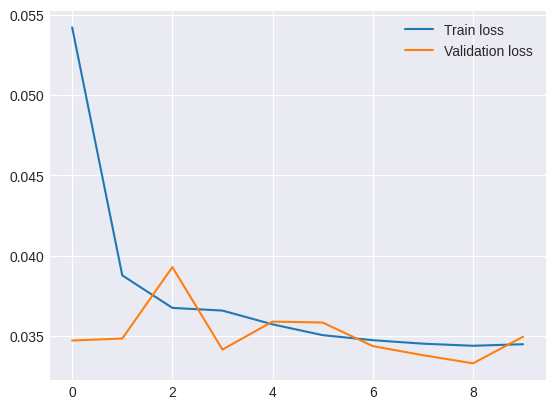

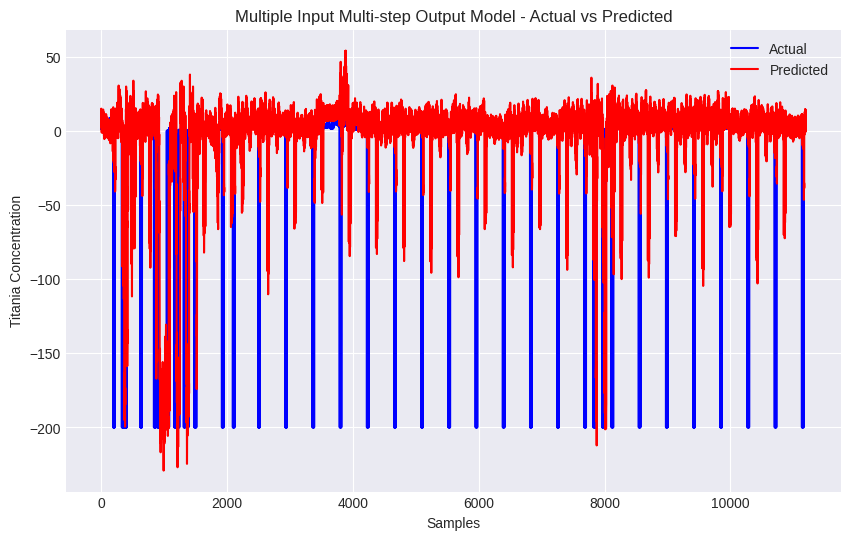

In [ ]:
# Plot training & validation loss
plt.plot(history_multi_input_multistep.history['loss'], label='Train loss')
plt.plot(history_multi_input_multistep.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, color='blue', label='Actual')
plt.plot(predictions_multi_input_multistep_inversed, color='red', label='Predicted')
plt.title('Multiple Input Multi-step Output Model - Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

#### Multiple Parallel Input and Multi-step Output Model

In [ ]:
# Function to split a sequence into samples for multi-step forecasting
def create_multistep_dataset(data, time_steps_in=24, time_steps_out=6):
    X, y = [], []
    for i in range(len(data) - time_steps_in - time_steps_out + 1):
        X.append(data[i:i + time_steps_in, :])
        y.append(data[i + time_steps_in:i + time_steps_in + time_steps_out, 0])
    return np.array(X), np.array(y)

time_steps_in = 24
time_steps_out = 6

# Split data
X, y = create_multistep_dataset(data_scaled, time_steps_in, time_steps_out)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define model
model_multi_parallel_multistep = Sequential()
model_multi_parallel_multistep.add(LSTM(50, activation='relu', input_shape=(time_steps_in, X_train.shape[2])))
model_multi_parallel_multistep.add(RepeatVector(time_steps_out))
model_multi_parallel_multistep.add(LSTM(50, activation='relu', return_sequences=True))
model_multi_parallel_multistep.add(TimeDistributed(Dense(1)))
model_multi_parallel_multistep.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history_multi_parallel_multistep = model_multi_parallel_multistep.fit(
    X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    epochs=10, batch_size=32,
    validation_data=(X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)),
    callbacks=[early_stopping], verbose=1
)

# Predict values
predictions_multi_parallel_multistep = model_multi_parallel_multistep.predict(X_test)

# Prepare the inverse transformation
n_features = data_scaled.shape[1]
predictions_multi_parallel_multistep_reshaped = predictions_multi_parallel_multistep.reshape(predictions_multi_parallel_multistep.shape[0] * time_steps_out, 1)
predictions_multi_parallel_multistep_scaled = np.hstack((predictions_multi_parallel_multistep_reshaped, np.zeros((predictions_multi_parallel_multistep_reshaped.shape[0], n_features - 1))))

# Inverse transform the predictions
predictions_multi_parallel_multistep_inversed = scaler.inverse_transform(predictions_multi_parallel_multistep_scaled)[:, 0]

# Reshape the test values for inverse transformation
y_test_reshaped = y_test.reshape(y_test.shape[0] * y_test.shape[1], 1)
y_test_scaled = np.hstack((y_test_reshaped, np.zeros((y_test_reshaped.shape[0], n_features - 1))))

# Inverse transform the actual values
y_test_inversed = scaler.inverse_transform(y_test_scaled)[:, 0]

Epoch 1/10
234/234 [==============================] - 6s 11ms/step - loss: 0.0837 - val_loss: 0.0398
Epoch 2/10
234/234 [==============================] - 2s 10ms/step - loss: 0.0431 - val_loss: 0.0359
Epoch 3/10
234/234 [==============================] - 2s 10ms/step - loss: 0.0406 - val_loss: 0.0372
Epoch 4/10
234/234 [==============================] - 3s 12ms/step - loss: 0.0396 - val_loss: 0.0328
Epoch 5/10
234/234 [==============================] - 3s 11ms/step - loss: 0.0389 - val_loss: 0.0353
Epoch 6/10
234/234 [==============================] - 3s 11ms/step - loss: 0.0381 - val_loss: 0.0324
Epoch 7/10
234/234 [==============================] - 2s 10ms/step - loss: 0.0373 - val_loss: 0.0332
Epoch 8/10
234/234 [==============================] - 2s 10ms/step - loss: 0.0371 - val_loss: 0.0325
Epoch 9/10
234/234 [==============================] - 3s 13ms/step - loss: 0.0370 - val_loss: 0.0327
Epoch 10/10
59/59 [==============================] - 0s 3ms/step


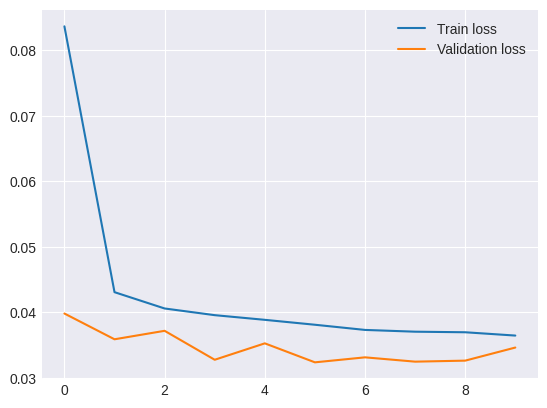

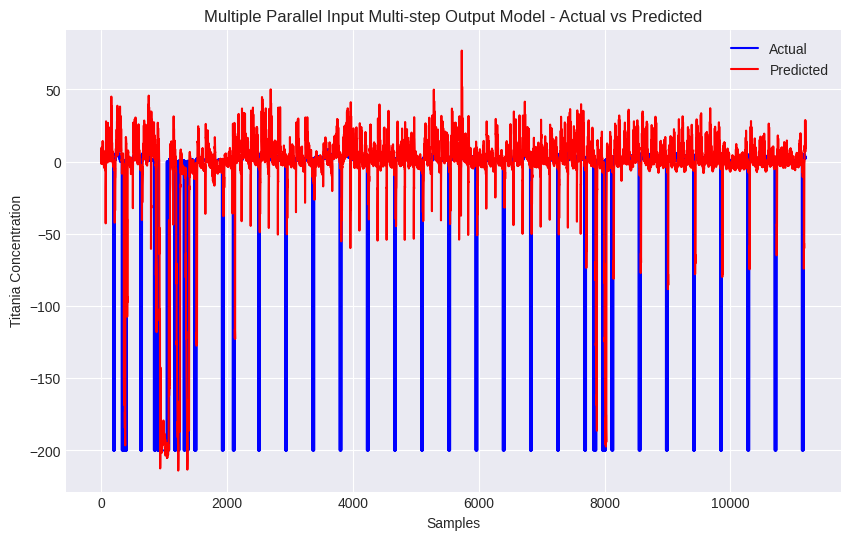

In [ ]:
# Plot training & validation loss
plt.plot(history_multi_parallel_multistep.history['loss'], label='Train loss')
plt.plot(history_multi_parallel_multistep.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inversed, color='blue', label='Actual')
plt.plot(predictions_multi_parallel_multistep_inversed, color='red', label='Predicted')
plt.title('Multiple Parallel Input Multi-step Output Model - Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Titania Concentration')
plt.legend()
plt.show()

# Conclusions

1. What are the trends, seasonality, and cyclicity in PT08.S2 sensor responses over the year?
- Trends:
  + The data analysis in the notebook includes the computation of expanding averages and moving averages, which helps in identifying long-term trends in the PT08.S2 sensor responses.
  + Linear interpolation was used to handle missing values, ensuring a continuous dataset for trend analysis.
- Seasonality:
  + Seasonal patterns are analyzed using STL (Seasonal-Trend decomposition using LOESS) decomposition, which separates the seasonal component from the trend and residuals.
  + Average Titania concentration is plotted by day of the week and hour of the day, revealing consistent daily and weekly patterns.

- Cyclicity:
  + The cyclic nature of the data is explored through rolling means and seasonal plots, such as:
  + Titania concentration by day of the week, showing how sensor responses vary on different days.
  + Titania concentration by hour of the day, highlighting daily cycles in sensor readings.

2. How do different environmental conditions affect PT08.S2 sensor responses?
- The correlation matrix is computed to identify relationships between PT08.S2 sensor responses and other environmental variables.
- This analysis helps determine which environmental factors (such as temperature, humidity, etc.) have significant correlations with the PT08.S2 sensor readings, indicating how these conditions affect the sensor responses.

3. What is the impact of external events on PT08.S2 sensor readings?
- Time series plots of Titania concentration over time are used to visualize the data and identify any anomalies or significant changes in sensor readings.
- By comparing these anomalies with known external events (e.g., holidays, pollution incidents, weather events), it is possible to infer the impact of these events on PT08.S2 sensor readings.
- Average concentration analysis by day of the week and hour of the day also helps in understanding the regular impact of external events, such as weekend activities or daily traffic patterns.

4. How can future PT08.S2 sensor responses be predicted based on historical data?
- Several forecasting models are implemented to predict future PT08.S2 sensor responses:
  + AR Model (AutoRegressive)
  + MA Model (Moving Average)
  + ARIMA Model (AutoRegressive Integrated Moving Average)
  + SARIMA Model (Seasonal AutoRegressive Integrated Moving Average)
  + Holt-Winters Model for seasonal data
  + MultiLayer Perceptrons (MLPs) Models for both univariate and multivariate data
  + Convolutional Neural Networks (CNNs) Models for capturing spatial dependencies
  + Long Short-Term Memory Networks (LSTMs) Models for handling long-term dependencies and sequences
- The performance of these models is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE), ensuring accurate and reliable predictions.
